PROJECT UTS SISTEM KECERDASAN BISNI - A

1. Roja' Putri Cintani - 4520210046
2. Febrianti Adhania - 4520210093
3. Zulfa Aenaeni - 4520210015
4. Syahrani Adrianty - 4520210034
5. Adila Apriliani - 4520210067


Catatan: harus instal semuanya dulu, restart.. Baru jalanin mulai dari Data sampai akhir

# **Installing**

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip -q install sastrawi

In [ ]:
!pip3 install numpy scipy patsy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import version
version()

'3.0.0.rc6'

In [ ]:
#!pip3 install -U matplotlib

In [ ]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Mount, Library**

In [ ]:
# mount Google Drive

from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Mengimport library pandas

import pandas as pd
pd.set_option('display.max_columns', None)
import datetime
import time
import string
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go


# importing the required module
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import nltk
import re
import cv2
import random
import statsmodels
import statsmodels.formula.api as smf
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment
from pycaret.time_series import *

# **Data**

In [ ]:
#Menginput data set item dan review

data_item = pd.read_csv("/content/gdrive/MyDrive/Final Project/20191002-items.csv")
data_review = pd.read_csv("/content/gdrive/MyDrive/Final Project/20191002-reviews.csv")

## **Merge Two Data Sets**

In [ ]:
# Menggabungkan data set secara horizontal
df = data_item.merge(data_review, on ="itemId",how="outer").drop_duplicates()
df

itemId               category_x  \
0       100002528  beli-harddisk-eksternal   
1       100002528  beli-harddisk-eksternal   
2       100002528  beli-harddisk-eksternal   
3       100002528  beli-harddisk-eksternal   
4       100002528  beli-harddisk-eksternal   
...           ...                      ...   
626273    9973500        jual-flash-drives   
626274    9973500        jual-flash-drives   
626276    9973500        jual-flash-drives   
626277    9973500        jual-flash-drives   
626278    9973500        jual-flash-drives   

                                                   name_x     brandName  \
0       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
1       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
2       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
3       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
4       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
...                                                   ...           ...   
626273             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626274             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626276             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626277             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626278             Transformer Ravage USB 2.0 Flash Drive  Transformers   

                                                      url    price  \
0       https://www.lazada.co.id/products/toshiba-smar...  2499000   
1       https://www.lazada.co.id/products/toshiba-smar...  2499000   
2       https://www.lazada.co.id/products/toshiba-smar...  2499000   
3       https://www.lazada.co.id/products/toshiba-smar...  2499000   
4       https://www.lazada.co.id/products/toshiba-smar...  2499000   
...                                                   ...      ...   
626273  https://www.lazada.co.id/products/transformer-...   180000   
626274  https://www.lazada.co.id/products/transformer-...   180000   
626276  https://www.lazada.co.id/products/transformer-...   180000   
626277  https://www.lazada.co.id/products/transformer-...   180000   
626278  https://www.lazada.co.id/products/transformer-...   180000   

        averageRating  totalReviews retrievedDate_x               category_y  \
0                   4             8      2019-10-02  beli-harddisk-eksternal   
1                   4             8      2019-10-02  beli-harddisk-eksternal   
2                   4             8      2019-10-02  beli-harddisk-eksternal   
3                   4             8      2019-10-02  beli-harddisk-eksternal   
4                   4             8      2019-10-02  beli-harddisk-eksternal   
...               ...           ...             ...                      ...   
626273              3             4      2019-10-02  beli-harddisk-eksternal   
626274              3             4      2019-10-02  beli-harddisk-eksternal   
626276              3             4      2019-10-02        jual-flash-drives   
626277              3             4      2019-10-02        jual-flash-drives   
626278              3             4      2019-10-02        jual-flash-drives   

                 name_y  rating  originalRating  \
0              Kamal U.       5             NaN   
1            yofanca m.       4             NaN   
2       Lazada Customer       5             NaN   
3       Lazada Customer       4             NaN   
4              Yosep M.       5             NaN   
...                 ...     ...             ...   
626273          Rudi R.       4             NaN   
626274     Lazada Guest       3             NaN   
626276          RUDI R.       5             NaN   
626277          Rudi R.       4             NaN   
626278     Lazada Guest       3             NaN   

                                        reviewTitle  \
0                                               NaN   
1                               

Menggunakan variabel baru **dm**

## **Change Column Name**

In [ ]:
# merubah nama kolom
dm = df.rename(columns = {'name_x' : 'product_name','category_x' : 'category_true', 'name_y' : 'reviewer'})
dm

itemId            category_true  \
0       100002528  beli-harddisk-eksternal   
1       100002528  beli-harddisk-eksternal   
2       100002528  beli-harddisk-eksternal   
3       100002528  beli-harddisk-eksternal   
4       100002528  beli-harddisk-eksternal   
...           ...                      ...   
626273    9973500        jual-flash-drives   
626274    9973500        jual-flash-drives   
626276    9973500        jual-flash-drives   
626277    9973500        jual-flash-drives   
626278    9973500        jual-flash-drives   

                                             product_name     brandName  \
0       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
1       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
2       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
3       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
4       TOSHIBA Smart HD LED TV 32" - 32L5650VJ Free B...       Toshiba   
...                                                   ...           ...   
626273             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626274             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626276             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626277             Transformer Ravage USB 2.0 Flash Drive  Transformers   
626278             Transformer Ravage USB 2.0 Flash Drive  Transformers   

                                                      url    price  \
0       https://www.lazada.co.id/products/toshiba-smar...  2499000   
1       https://www.lazada.co.id/products/toshiba-smar...  2499000   
2       https://www.lazada.co.id/products/toshiba-smar...  2499000   
3       https://www.lazada.co.id/products/toshiba-smar...  2499000   
4       https://www.lazada.co.id/products/toshiba-smar...  2499000   
...                                                   ...      ...   
626273  https://www.lazada.co.id/products/transformer-...   180000   
626274  https://www.lazada.co.id/products/transformer-...   180000   
626276  https://www.lazada.co.id/products/transformer-...   180000   
626277  https://www.lazada.co.id/products/transformer-...   180000   
626278  https://www.lazada.co.id/products/transformer-...   180000   

        averageRating  totalReviews retrievedDate_x               category_y  \
0                   4             8      2019-10-02  beli-harddisk-eksternal   
1                   4             8      2019-10-02  beli-harddisk-eksternal   
2                   4             8      2019-10-02  beli-harddisk-eksternal   
3                   4             8      2019-10-02  beli-harddisk-eksternal   
4                   4             8      2019-10-02  beli-harddisk-eksternal   
...               ...           ...             ...                      ...   
626273              3             4      2019-10-02  beli-harddisk-eksternal   
626274              3             4      2019-10-02  beli-harddisk-eksternal   
626276              3             4      2019-10-02        jual-flash-drives   
626277              3             4      2019-10-02        jual-flash-drives   
626278              3             4      2019-10-02        jual-flash-drives   

               reviewer  rating  originalRating  \
0              Kamal U.       5             NaN   
1            yofanca m.       4             NaN   
2       Lazada Customer       5             NaN   
3       Lazada Customer       4             NaN   
4              Yosep M.       5             NaN   
...                 ...     ...             ...   
626273          Rudi R.       4             NaN   
626274     Lazada Guest       3             NaN   
626276          RUDI R.       5             NaN   
626277          Rudi R.       4             NaN   
626278     Lazada Guest       3             NaN   

                                        reviewTitle  \
0                                               NaN   
1                               

In [ ]:
#menampilkan jumlah baris dan kolom pada dataset
dm.shape

(616100, 23)

Disini, dapat kita lihat bahwa terdapat 616.100 baris dan 23 kolom yang terdapat pada dataset.

# **Cleaning Data**

## **Analisis Data Items**

In [ ]:
# menghitung isi kategori di kolom category_x
dm["category_true"].value_counts()

beli-harddisk-eksternal    200674
jual-flash-drives          183369
beli-smart-tv              114034
shop-televisi-digital       89412
beli-laptop                 28611
Name: category_true, dtype: int64

In [ ]:
dm.dtypes

itemId               int64
category_true       object
product_name        object
brandName           object
url                 object
price                int64
averageRating        int64
totalReviews         int64
retrievedDate_x     object
category_y          object
reviewer            object
rating               int64
originalRating     float64
reviewTitle         object
reviewContent       object
likeCount            int64
upVotes              int64
downVotes            int64
helpful               bool
relevanceScore     float64
boughtDate          object
clientType          object
retrievedDate_y     object
dtype: object

## Mengecek data di kolom boughtDate

In [ ]:
# melihat data yang unik di kolom boughtDate
dm["boughtDate"].unique()

array(['09 Apr 2019', '24 Sep 2017', '04 Apr 2018', ..., '09 Agu 2014',
       '30 Jun 2015', '04 Sep 2014'], dtype=object)

In [ ]:
dm1 = dm.replace({'boughtDate':r'Agu'},{'boughtDate':r'Aug'},regex=True)
dm2 = dm1.replace({'boughtDate':r'Mei'},{'boughtDate':r'May'},regex=True)
dm3 = dm2.replace({'boughtDate':r'Des'},{'boughtDate':r'Dec'},regex=True)
dm4 = dm3.replace({'boughtDate':r'Okt'},{'boughtDate':r'Oct'},regex=True)

In [ ]:
# merubah type data dari object menjadi datetime
dm4["boughtDate"]=pd.to_datetime(dm4["boughtDate"])
dm4["boughtDate"]

0        2019-04-09
1        2017-09-24
2        2018-04-04
3        2017-09-22
4        2018-08-17
            ...    
626273          NaT
626274          NaT
626276   2017-04-25
626277          NaT
626278          NaT
Name: boughtDate, Length: 616100, dtype: datetime64[ns]

terdapat beberapa data yang bernilai NaT

## **Drop Kolom yang tidak di gunakan**

In [ ]:
dm4.isna().sum().sort_values(ascending=False)

originalRating     616076
reviewTitle        545506
reviewContent      279003
boughtDate          24108
brandName               3
itemId                  0
clientType              0
relevanceScore          0
helpful                 0
downVotes               0
upVotes                 0
likeCount               0
rating                  0
category_true           0
reviewer                0
category_y              0
retrievedDate_x         0
totalReviews            0
averageRating           0
price                   0
url                     0
product_name            0
retrievedDate_y         0
dtype: int64

In [ ]:
dm4.drop('originalRating', axis=1, inplace=True)
dm4.drop('retrievedDate_y', axis=1, inplace=True)
dm4.drop('retrievedDate_x', axis=1, inplace=True)
dm4.drop('category_y', axis=1, inplace=True)
dm4.drop('reviewTitle', axis=1, inplace=True)

In [ ]:
dm4.isna().sum().sort_values(ascending=False)

reviewContent     279003
boughtDate         24108
brandName              3
itemId                 0
relevanceScore         0
helpful                0
downVotes              0
upVotes                0
likeCount              0
rating                 0
category_true          0
reviewer               0
totalReviews           0
averageRating          0
price                  0
url                    0
product_name           0
clientType             0
dtype: int64

In [ ]:
# cek dan mengubah data yang null terhadap 'brandName'
dm4[dm4['brandName'].isna()]

itemId            category_true  \
17555   1063107  beli-harddisk-eksternal   
183166  1663682  beli-harddisk-eksternal   
183167  1663682  beli-harddisk-eksternal   

                                             product_name brandName  \
17555   WDC Passport Ultra 1TB External Harddisk Porta...       NaN   
183166   Western Digital My Passport Ultra - 1 TB - Hitam       NaN   
183167   Western Digital My Passport Ultra - 1 TB - Hitam       NaN   

                                                      url    price  \
17555   https://www.lazada.co.id/products/wdc-passport...  1050000   
183166  https://www.lazada.co.id/products/western-digi...  1450000   
183167  https://www.lazada.co.id/products/western-digi...  1450000   

        averageRating  totalReviews         reviewer  rating reviewContent  \
17555               5             1  Lazada Customer       5           NaN   
183166              5             2      Muhammad B.       5           NaN   
183167              5             2           Ayu K.       5           NaN   

        likeCount  upVotes  downVotes  helpful  relevanceScore boughtDate  \
17555           0        0          0     True           29.33 2015-08-27   
183166          0        0          0     True           16.01 2015-11-11   
183167          0        0          0     True           13.24 2015-11-11   

        clientType  
17555   androidApp  
183166  androidApp  
183167      iosApp

In [ ]:
dm4['brandName'][dm4.product_name.str.contains('WDC Passport|Western Digital My Passport')] = 'Western Digital'

In [ ]:
dm4.isna().sum().sort_values(ascending=False)

reviewContent     279003
boughtDate         24108
itemId                 0
category_true          0
relevanceScore         0
helpful                0
downVotes              0
upVotes                0
likeCount              0
rating                 0
reviewer               0
totalReviews           0
averageRating          0
price                  0
url                    0
brandName              0
product_name           0
clientType             0
dtype: int64

## Melowercase semua kolom

In [ ]:
dm4=dm4.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
dm4.head()

itemId            category_true  \
0  100002528  beli-harddisk-eksternal   
1  100002528  beli-harddisk-eksternal   
2  100002528  beli-harddisk-eksternal   
3  100002528  beli-harddisk-eksternal   
4  100002528  beli-harddisk-eksternal   

                                        product_name brandName  \
0  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
1  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
2  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
3  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
4  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   

                                                 url    price  averageRating  \
0  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
1  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
2  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
3  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
4  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   

   totalReviews         reviewer  rating                     reviewContent  \
0             8         kamal u.       5   bagus  mantap dah sesui pesanan   
1             8       yofanca m.       4                bagus, sesuai foto   
2             8  lazada customer       5  okkkkk mantaaaaaaapppp ... goood   
3             8  lazada customer       4                      bagus sesuai   
4             8         yosep m.       5                               NaN   

   likeCount  upVotes  downVotes  helpful  relevanceScore boughtDate  \
0          0        0          0     True           26.51 2019-04-09   
1          0        0          0     True           22.49 2017-09-24   
2          0        0          0     True           21.50 2018-04-04   
3          0        0          0     True           20.51 2017-09-22   
4          0        0          0     True           16.01 2018-08-17   

   clientType  
0  androidapp  
1  androidapp  
2  androidapp  
3  androidapp  
4  androidapp

In [ ]:
dm4[dm4['itemId']==1663682]

itemId            category_true  \
183166  1663682  beli-harddisk-eksternal   
183167  1663682  beli-harddisk-eksternal   

                                            product_name        brandName  \
183166  western digital my passport ultra - 1 tb - hitam  western digital   
183167  western digital my passport ultra - 1 tb - hitam  western digital   

                                                      url    price  \
183166  https://www.lazada.co.id/products/western-digi...  1450000   
183167  https://www.lazada.co.id/products/western-digi...  1450000   

        averageRating  totalReviews     reviewer  rating reviewContent  \
183166              5             2  muhammad b.       5           NaN   
183167              5             2       ayu k.       5           NaN   

        likeCount  upVotes  downVotes  helpful  relevanceScore boughtDate  \
183166          0        0          0     True           16.01 2015-11-11   
183167          0        0          0     True           13.24 2015-11-11   

        clientType  
183166  androidapp  
183167      iosapp

In [ ]:
dm4[dm4.index==0]

itemId            category_true  \
0  100002528  beli-harddisk-eksternal   

                                        product_name brandName  \
0  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   

                                                 url    price  averageRating  \
0  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   

   totalReviews  reviewer  rating                    reviewContent  likeCount  \
0             8  kamal u.       5  bagus  mantap dah sesui pesanan          0   

   upVotes  downVotes  helpful  relevanceScore boughtDate  clientType  
0        0          0     True           26.51 2019-04-09  androidapp

## **Membuat antara kolom kategori dengan produk menjadi relevan**

In [ ]:
dm4['category_true']='null'

In [ ]:
#dm4['category_true'][dm4.product_name.str.contains('tv|led|juc|sharp lc|sharp big aquos|polytron|samsung 43 inch|inch|speaker|aquos|led tv|coocaa led tv 24 inch|coocaa led tv 40 inch')] = 'Television'
#dm4['category_true'][dm4.product_name.str.contains('antena|receiver matrix|film edukasi anak')] = 'Antena'
#dm4['category_true'][dm4.product_name.str.contains('ssd|external|hardisk|harddisk|sandisk|fd|flash drive|sharkoon|suara walet |microsd|memory card|card|flash| tb |passport|hayabusa|transmemory|hdd|plashdisk|flasdisk|data|kingston|toshiba canvio|new dvd|otg|card reader|usb|seagate|maxtor|wd elements|transcend|topone|v-gen|toshiba hayabusha|samsung micro sd|mikro sd sdxc|apexel clone|oh micro sd|memori|disket|canon connect|lacie|aluminium blueendless|adata hv620s|western|cloud|10in|lexar')] = 'External Drive'
#dm4['category_true'][dm4.product_name.str.contains('casing|case|kotak kandang|drive caddy|tas kain|kertas eva|keras eva|keras |protection bag|headset|lampu|kabel|hdmi|microphone')] = 'Accessories'
#dm4['category_true'][dm4.product_name.str.contains('laptop|celeron|avita|lenovo|core|core i7|acer|asus|notebook|microsoft surface|macbook|hp elitebook|intel core i3|razer blade|msi|dell|hp|chuwi|tablet|pc gaming|intel')] = 'PC'

In [ ]:
#'accessories'
dm4['category_true'][dm4.product_name.str.contains('kabel hdmi to hdmi|lampu mitsuyama|otg mini|kabel otg|korek api|sarung pembawa|radio unik|otg robot|tempat penyimpanan|log on otg|otg cable usb|otg connect kit|otg ultra mini|kandang box|led|extention usb|korek elektrik|usb korek api|usb charger|otg android|usb lampu|kotak kandang|flying horse|otg type c|microphone|bag case|backlight led|lampu backlight|dock station|usb otg|kasus penutup|usb smarthafiz|caddy papan|otg adapter robot|protection bag|docking|usb3.0 docking|enclosure hdd/ssd|hdd protector|box hdd|juc kv-2128|usb type c to micro usb|dual drive otg|otg usb|kabel adaptor konverter|kepala usb 3.0|hard drive caddy|membawa tas|tas kain|protection box|internal hdd|otg kabel|outdoor headset|otg micro usb|tas kantong|pemanas air listrik|tempat hdd|wadah|casing|casing hardisk|case hardisk|tempat dudukan|box tempat|menutupi kasus hard drive|case|4connect 3 in 1 flashdisk 16gb otg|adata ed600|tampilan receiver|display receiver')] = 'accessories'

#'pc'
dm4['category_true'][dm4.product_name.str.contains('lenovo|thinkpad|win10|omen|acer|ip320|tablet|roid tab|g40-45|msi|ip110|ideapad|lenovo v145|microsoft|surface|lenovo legion|elitebook|acer aspire|pc|pc ipad|leshp 9.6|leshp 10.1|komputer|komputer tablet|celeron|win 10|intel|intel dual core|radeon|amd a4|amd|tf300tg|x540na|i7|i3|i5|asus rog|a407ma-|dualcore|zenbook|tp203nah|intel celeron|ryzen|windows 10|x407ma|x407ua|x454ya|core i3|a456ur i5|x540ya|p2430ua i3|x541sa n3060|amd quad core|x550z-exx211t/gr|amd fx 7500|intel atom|core™ i3|asus vivobook|notebook|laptop|intel core m3|macbook|acer e5 575g|core i7|intel i7|core i5|laptop murah')] = 'pc'

#'external drive'
dm4['category_true'][dm4.product_name.str.contains('-go 16gb|pro 128gb|al quran audio|legacy windows|driverpack|flasshdisk|basic 500gb|koleksi video|32gb usb|64gb usb|dt50/|16gb usb|basic 2tb|floppy disk|64gb usb3.0|disket/diskette|ultra sdhc|sd card|hayabusa 32gb|microsd|seagate slim|falshdisk|basic 1tb|micro-sdxc|microsd 32gb|back up+ 1tb|up+ 1tb|transcend 2tb|fd|hayabusa 16gb|suara walet super|plashdisk|sata ssd 10|micro sd|connect - 1tb|data traveler|memory card|16gb ori|16gb microsd|ultra fit usb|usb v-gen|harddisk ekternal|usb flash|datatraveler|microsd sandisk|memori card|datatraveler50|hard drive|usb programmer|flaskdisk|32gb kw memory card|storage backup|8gb kw memory card|m3 1 tb|memory sandisk ultra 2gb|kw 4 gb memory|seagate backup|-go - 32gb|flashdisc|expansion - 1 tb|backup plus 1tb|flash memory|cruzer|blade - 16gb|force 16g|speicherstick usb 2|glide 32gb|qiaosha 64 mb|hdd eksternal|usb disk|usb 3.0|canvio ready 1tb|canvio ready 2tb|25h3 1tb|cz50|blade - 16 gb|flash 32 gb|2.5 inch - 1tb|2.5 inch - 750gb|cloud storage|ultra black 2tb|ultra 1tb|2.5" usb 3.0 1 tb|cloud ex2 - 12tb|cloud storage 4tb|elements 2.5" - 750gb|my cloud ex2|1tb/2.5inch/usb3.0|essential 4 tb|essential 3 tb|elements 2.5" - 2 tb|passport 1 tb|mybook 8tb|2.5 inch - 2tb|2.5" - 1 tb|my book 4tb|my passport ultra - 1 tb|wd elements|dt 100 g3|hd usb 3.0|16gb usb2.0|flasdisk|canvio ready 3.0|flashdrive|wd my passport|datatraveler ge9|dual usb drive|hdd enclosure|dual drive usb|wd my passport 4tb|superspeed usb3.0|wd my passport 2tb|transmemory usb 3.0|expansion falcon 1tb|wd my passport 1tb|hitachi touro 1|wd mybook|flasdisk flasdis|usb hub|pembaca kartu|64 gb usb|keyboard|sata usb 3.0|hardisk|cz50-8gb|kartu memori|flash memori|autoleader|expresscard|2 gb usb 2|flash kartu memori|card reader|usb 3.0 2.5|blueendless|external|q88 512 mb|connect station|usb 2.0|memori drive|memori disk|8gb usb|usb 8 gb|flashdisk|aviiq|hard disk|hard drive 1tb|memori drive flash|eksternal hardisk|sx8200|adata c008 usb|ssd adata|harddisk slim|adata 64gb|flashdisk 16gb|external hdd|adata uv330|flash disk|flash drive|adata uc360|external hard drive|adata uv220|harddisk eksternal|adata uv150|adata hv620 1tb hardisk eksternal|adata uv128 64gb flashdisk|hardisk external|harddisk external|external hdd 2tb|hard disk eksternal|external hdd 4tb|flashdisk usb|adata uv320|usb flash drive|adata c906')] = 'external drive'

#'internal drive'
dm4['category_true'][dm4.product_name.str.contains('ssd sata kingston|seagate 3,5" video|slim internal|ssd kingston|ssd plus|harddisk internal|ssd samsung 850|baracuda 3.5"|barracuda 3.5"|internal 3.5"')] = 'internal drive'

#'television'
dm4['category_true'][dm4.product_name.str.contains('th-32f305g|sepeker warlles|polytron pma-|polytron sepeker|speaker - atomic|sepeker bluetooth|sepeker multimedia|speaker aktif|polytron multimedia|dvd player|sharp|aquos lc-24le175i|aquos full hd 45|polytron pld|aquos led|polytron cinemax|led polytron 32|sharp lc32le180|led lg|led 20inch|led 32|televisi|led 32 inch|led aqua 32 inch|led dvb-t2|tv|tv led|led tv 320"|led tv|led tv 32 inch')] = 'television'

#'antena'
dm4['category_true'][dm4.product_name.str.contains('antena|receiver matrix|router nirkabel ')] = 'antena'

In [ ]:
dm4[dm4['category_true']=='null']

Empty DataFrame
Columns: [itemId, category_true, product_name, brandName, url, price, averageRating, totalReviews, reviewer, rating, reviewContent, likeCount, upVotes, downVotes, helpful, relevanceScore, boughtDate, clientType]
Index: []

In [ ]:
dm4['category_true'].value_counts()

television        315850
external drive    172051
pc                125579
accessories         2234
antena               338
internal drive        48
Name: category_true, dtype: int64

## **Membuat antara kolom produk_name dengan brandname menjadi relevan**

In [ ]:
#'SanDisk'
dm4['brandName'][dm4.product_name.str.contains('sandisk')] = 'sandisk'

#'Lenovo'
dm4['brandName'][dm4.product_name.str.contains('lenovo')] = 'lenovo'

#'Adata'
dm4['brandName'][dm4.product_name.str.contains('adata')] = 'adata'

#'toshiba'
dm4['brandName'][dm4.product_name.str.contains('toshiba')] = 'toshiba'

#'asus'
dm4['brandName'][dm4.product_name.str.contains('asus')] = 'asus'

#'philips'
dm4['brandName'][dm4.product_name.str.contains('philips')] = 'philips'

#'acer'
dm4['brandName'][dm4.product_name.str.contains('acer')] = 'acer'

#'maxtor'
dm4['brandName'][dm4.product_name.str.contains('maxtor')] = 'maxtor'

#'orico'
dm4['brandName'][dm4.product_name.str.contains('orico')] = 'orico'

#'western digital'
dm4['brandName'][dm4.product_name.str.contains('western digital|wd my passport')] = 'western digital'

In [ ]:
dm4['brandName'].unique()

array(['toshiba', 'lg', 'sharp', 'lenovo', 'sandisk', 'asus', 'philips',
       'acer', 'maxtor', 'orico', 'hp', 'transformers', 'western digital',
       'panasonic', 'hitachi', 'sony', 'ikedo', 'seagate', 'sanyo',
       'ichiko', 'polytron', 'kevindo', 'xiaomi', 'vandisk', 'vakind',
       'advance', 'usb', 'samsung', 'china oem', 'thinch', 'kingston',
       'adata', 'tcl', 'billionton', 'v-gen', 'dell', 'no brand', 'juc',
       'microsoft', 'coocaa', 'dbest', 'transcend', 'hardcase', 'aqua',
       'ssk', 'unitek', 'trans', 'konka', "trend's", 'multi', 'wd',
       'm-tech', 'flashdisk', 'otg usb adapter', 'import', 'o', 'pqi',
       'universal', 'esogoal', 'aotu', 'sata', 'polysonic', 'uactor',
       'razer', 'ugreen', 'msi', 'vitron', '4connect', 'apple', 'eelic',
       'siliconpower', 'case', 'canon', 'apexel', 'hisense', 'eaget',
       'photofast', 'moonar', 'seasonic', 'disney', 'akari', 'otg',
       'trends', 'hayabusa', 'askhev', 'bluesky', 'chuwi', 'cmm', 'yysl',
   

## **Analisis Data Review**

## Instalasi Sastrawi

In [ ]:
dm4.isnull().sum().sort_values(ascending=False)

reviewContent     279003
boughtDate         24108
itemId                 0
category_true          0
relevanceScore         0
helpful                0
downVotes              0
upVotes                0
likeCount              0
rating                 0
reviewer               0
totalReviews           0
averageRating          0
price                  0
url                    0
brandName              0
product_name           0
clientType             0
dtype: int64

Terdapat missing values di reviewTitle, reviewContent, brandName, boughtDate, dan dayof_boughtDate. Jika semuanya di hapus, nanti akan berpengaruh kek analisis lainnya. Oleh karena itu kita hapus beberapa baris dari reviewContent, boughtDate, dayof_boughtDate, dan brandName yang memiliki nilai missing values terkecil dari 4 lainnya. Tapi jika kita cek secara manual reviewTitle memiliki nilai missing values yang lebih dari > 90%. Maka kolom reviewTitle akan di hapus.

## Drop baris dan kolom yang memiliki null berdasarkan analisis

In [ ]:
# Menghapus beberapa baris dari reviewContent, saat di hapus masukkan ke variabel baru
data = dm4.dropna(how='any', subset=['reviewContent'])
print(f'Total amount data: {data.shape[0]}')

Total amount data: 337097


In [ ]:
# Menghapus beberapa baris dari boughtDate, saat di hapus masukkan ke variabel baru
data1 = data.dropna(how='any', subset=['boughtDate'])
print(f'Total amount data: {data.shape[0]}')

Total amount data: 337097


In [ ]:
data1.isnull().sum().sort_values(ascending=False)

itemId            0
category_true     0
boughtDate        0
relevanceScore    0
helpful           0
downVotes         0
upVotes           0
likeCount         0
reviewContent     0
rating            0
reviewer          0
totalReviews      0
averageRating     0
price             0
url               0
brandName         0
product_name      0
clientType        0
dtype: int64

In [ ]:
data1.columns

Index(['itemId', 'category_true', 'product_name', 'brandName', 'url', 'price',
       'averageRating', 'totalReviews', 'reviewer', 'rating', 'reviewContent',
       'likeCount', 'upVotes', 'downVotes', 'helpful', 'relevanceScore',
       'boughtDate', 'clientType'],
      dtype='object')

In [ ]:
data_rat = data1[['rating','reviewContent']]

In [ ]:
data_rat.head()

rating                     reviewContent
0       5   bagus  mantap dah sesui pesanan
1       4                bagus, sesuai foto
2       5  okkkkk mantaaaaaaapppp ... goood
3       4                      bagus sesuai
8       5   bagus  mantap dah sesui pesanan

In [ ]:
data_rat.isnull().sum()

rating           0
reviewContent    0
dtype: int64

sekarang tidak ada nilai yang hilang lagi dan sekarang mari kita lihat jumlah ulasan berdasarkan peringkat

In [ ]:
print('Total amount of reviewContent: ', data_rat.shape[0], 'data\n')
print('The number of reviews of each rating:')
print('-- Rating 1:', data_rat[data_rat.rating == 1].shape[0], 'data')
print('-- Rating 2:', data_rat[data_rat.rating == 2].shape[0], 'data')
print('-- Rating 3:', data_rat[data_rat.rating == 3].shape[0], 'data')
print('-- Rating 4:', data_rat[data_rat.rating == 4].shape[0], 'data')
print('-- Rating 5:', data_rat[data_rat.rating == 5].shape[0], 'data')

Total amount of reviewContent:  314995 data

The number of reviews of each rating:
-- Rating 1: 18079 data
-- Rating 2: 5554 data
-- Rating 3: 11443 data
-- Rating 4: 29275 data
-- Rating 5: 250644 data


# **Exploratory Data Analysis**

In [ ]:
data1.describe()

itemId         price  averageRating   totalReviews  \
count  3.149950e+05  3.149950e+05  314995.000000  314995.000000   
mean   3.105955e+08  2.278828e+06       4.002410    1387.939047   
std    1.555211e+08  2.248635e+06       0.366138    2220.983769   
min    1.994600e+04  1.000000e+03       1.000000       1.000000   
25%    1.600291e+08  9.299900e+05       4.000000      57.000000   
50%    3.774743e+08  1.899000e+06       4.000000     285.000000   
75%    4.147421e+08  3.299000e+06       4.000000    1577.000000   
max    7.242170e+08  3.765000e+07       5.000000    9631.000000   

              rating      likeCount        upVotes      downVotes  \
count  314995.000000  314995.000000  314995.000000  314995.000000   
mean        4.551933       1.335520       1.335520       0.367634   
std         1.055693      19.096373      19.096373       3.066976   
min         1.000000      -1.000000      -1.000000       0.000000   
25%         5.000000       0.000000       0.000000       0.000000   
50%         5.000000       0.000000       0.000000       0.000000   
75%         5.000000       0.000000       0.000000       0.000000   
max         5.000000    1776.000000    1776.000000     111.000000   

       relevanceScore  
count   314995.000000  
mean        31.709966  
std          9.514203  
min         11.280000  
25%         25.500000  
50%         30.510000  
75%         36.510000  
max         76.500000

In [ ]:
data1[data1['brandName']=='No Brand']['rating'].mean()

nan

In [ ]:
data1.groupby(['brandName','rating'])['rating'].mean()

brandName  rating
4connect   1         1.0
           4         4.0
           5         5.0
acer       1         1.0
           2         2.0
                    ... 
yysl       1         1.0
           2         2.0
           3         3.0
           4         4.0
           5         5.0
Name: rating, Length: 513, dtype: float64

In [ ]:
data1[['rating','product_name','price']].groupby(by=['product_name','price']).mean().sort_values(by=['rating'],ascending=False).head(10)

rating
product_name                                       price         
sandisk usb flashdisk cruzer edge 8gb cz51         70000      5.0
sandisk flash disk cruzer edge 16 gb + gratis o... 76900      5.0
sandisk cz50 cruzer blade - 8 gb                   68900      5.0
sandisk ekstrem go usb 3.1 64 gb flash drive-intl  270105     5.0
sandisk flash disk cruzer blade 32 gb + gratis ... 130900     5.0
sandisk flash disk cruzer blade 32 gb + gratis ... 130900     5.0
flashdisk toshiba 64gb / flash disk / flash dri... 39000      5.0
flashdisk toshiba 64gb - putih                     35000      5.0
sandisk flash disk cruzer blade 32 gb + gratis ... 130900     5.0
sandisk flash disk cruzer edge 16 gb + gratis o... 76900      5.0

In [ ]:
data1[['rating','product_name','price']].groupby(by=['product_name','price']).mean().sort_values(by=['rating'],ascending=True).head(10)

rating
product_name                                       price          
terbaru...flashdisk hp 64gb v250w / 3 pcs / usb... 73500       1.0
bestrunner 64 mb usb 2.0 logam lipat putar flas... 44000       1.0
netbook asus vivobook e203m - intel n4000 - ram... 2911000     1.0
bestrunner 64 mb usb 2.0 flash drive memori sti... 41000       1.0
bestrunner 2 gb usb 2                              45000       1.0
ndr-store flashdisk toshiba usb flash drive 16 ... 20000       1.0
toshiba flashdisk hayabusa 8gb original, gratis... 39000       1.0
baru 64 gb usb 2.0 kunci mobil penyimpanan memo... 65000       1.0
flashdisk toshiba 64gb usb flash drive toshiba ... 25900       1.0
toshiba flashdisk hayabusa 8gb, free bluetooth ... 45000       1.0

In [ ]:
data1['rating'].value_counts()

5    250644
4     29275
1     18079
3     11443
2      5554
Name: rating, dtype: int64

In [ ]:
data1['category_true'].value_counts()

television        181368
external drive     73644
pc                 58834
accessories          948
antena               177
internal drive        24
Name: category_true, dtype: int64

In [ ]:
data1[['rating','brandName']].groupby(by=['brandName']).mean().sort_values(by=['rating'],ascending=False).head(10)

rating
brandName         
meco           5.0
trans          5.0
discovery      5.0
disney         5.0
multimax       5.0
ssk            5.0
elife          5.0
eva case       5.0
eyota          5.0
fahrenheit     5.0

In [ ]:
data1[['rating','category_true']].groupby(by=['category_true']).mean().sort_values(by=['rating'],ascending=False).head(10)

rating
category_true           
television      4.603386
pc              4.567835
antena          4.548023
accessories     4.467300
external drive  4.413761
internal drive  4.083333

## **Konversi day, month, year dari boughtdate**

In [ ]:
data1['year'] = data1['boughtDate'].dt.year
data1['month'] = data1['boughtDate'].dt.month
data1['dayname'] = data1['boughtDate'].dt.day_name()

In [ ]:
data1.head()

itemId category_true                                       product_name  \
0  100002528    television  toshiba smart hd led tv 32" - 32l5650vj free b...   
1  100002528    television  toshiba smart hd led tv 32" - 32l5650vj free b...   
2  100002528    television  toshiba smart hd led tv 32" - 32l5650vj free b...   
3  100002528    television  toshiba smart hd led tv 32" - 32l5650vj free b...   
8  100002528    television  toshiba smart hd led tv 32" - 32l5650vj free b...   

  brandName                                                url    price  \
0   toshiba  https://www.lazada.co.id/products/toshiba-smar...  2499000   
1   toshiba  https://www.lazada.co.id/products/toshiba-smar...  2499000   
2   toshiba  https://www.lazada.co.id/products/toshiba-smar...  2499000   
3   toshiba  https://www.lazada.co.id/products/toshiba-smar...  2499000   
8   toshiba  https://www.lazada.co.id/products/toshiba-smar...  2499000   

   averageRating  totalReviews         reviewer  rating  \
0              4             8         kamal u.       5   
1              4             8       yofanca m.       4   
2              4             8  lazada customer       5   
3              4             8  lazada customer       4   
8              4             8         kamal u.       5   

                      reviewContent  likeCount  upVotes  downVotes  helpful  \
0   bagus  mantap dah sesui pesanan          0        0          0     True   
1                bagus, sesuai foto          0        0          0     True   
2  okkkkk mantaaaaaaapppp ... goood          0        0          0     True   
3                      bagus sesuai          0        0          0     True   
8   bagus  mantap dah sesui pesanan          0        0          0     True   

   relevanceScore boughtDate  clientType  year  month    dayname  
0           26.51 2019-04-09  androidapp  2019      4    Tuesday  
1           22.49 2017-09-24  androidapp  2017      9     Sunday  
2           21.50 2018-04-04  androidapp  2018      4  Wednesday  
3           20.51 2017-09-22  androidapp  2017      9     Friday  
8           26.51 2019-04-09  androidapp  2019      4    Tuesday

In [ ]:
data1.dtypes

itemId                     int64
category_true             object
product_name              object
brandName                 object
url                       object
price                      int64
averageRating              int64
totalReviews               int64
reviewer                  object
rating                     int64
reviewContent             object
likeCount                  int64
upVotes                    int64
downVotes                  int64
helpful                     bool
relevanceScore           float64
boughtDate        datetime64[ns]
clientType                object
year                       int64
month                      int64
dayname                   object
dtype: object

In [ ]:
# mengetahui category_true yang daya jualnya tinggi dan rendah
data1.groupby(['year','category_true']).agg({"itemId":"count"}).sort_values(by="year", ascending = False)

itemId
year category_true         
2019 television      114478
     pc               40494
     internal drive       1
     external drive   35524
     antena             145
     accessories        345
2018 television       52464
     pc               12002
     internal drive      16
     external drive   22091
     antena              32
     accessories        318
2017 television       12618
     pc                5109
     internal drive       7
     external drive    9887
     accessories        241
2016 television        1744
     pc                1154
     external drive    5499
     accessories         37
2015 television          48
     pc                  75
     external drive     552
     accessories          7
2014 television          16
     external drive      91

In [ ]:
# mengetahui produk yang daya jualnya tinggi dan rendah dari tiap nama brand
data1.groupby(['product_name','brandName']).agg({"itemId":"count"}).sort_values(by="itemId", ascending = False)

itemId
product_name                                       brandName        
[gratis ongkir] coocaa led tv 40 inch - full hd... coocaa      15808
[gratis ongkir] coocaa led tv 24 inch - hd pane... coocaa      14160
[gratis ongkir] sharp 24 inch led aquos hd tv -... sharp       13072
philips 32 inch led hd tv - hitam (model 32pha4... philips     12048
[gratis ongkir] coocaa led tv 40 inch android s... coocaa       8658
...                                                              ...
case hardisk samsung usb 2.0 anti gores            samsung         1
hdd hardisk 40gb ps2 full games free request game  no brand        1
hdd external seagate backup plus 4tb 2.5inch us... seagate         1
hdd external enclosure keras disk mendorong kot... asus            1
promo case harddisk hard case shockproof tas ha... trend's         1

[3003 rows x 1 columns]

In [ ]:
# apa yang menjadi trending, tiap kategori -> brand -> tahun
data1.groupby(['year','category_true','product_name']).agg({"itemId":"count"}).sort_values(by="year", ascending = False)

itemId
year category_true  product_name                                              
2019 television     xiaomi smart android led tv 43" - mi led 4a [43...      16
     external drive lexar jumpdrive s50 16gb usb 2.0 [ljds50-16gabap]        4
                    kingston flashdisk 16gb usb 3.0 datatraveler dt...      12
                    kingston flashdisk 32gb usb 3.0 datatraveler dt...       4
                    kingston flashdisk dti-104 64gb usb 2.0                  4
...                                                                        ...
2014 external drive seagate backup plus slim 1tb - blue                      1
                    toshiba enshu mini usb 2.0 flash drive 16gb  hijau       4
                    western digital mybook essential 4 tb usb 3.0 -...       2
     television     crystal led tv 24" imagine ctv-2924                     16
     external drive   toshiba  enshu mini usb 2.0 flash drive 16gb ...       4

[4190 rows x 1 columns]

In [ ]:
# mengetahui tingkat kepuasan pembelian produk elektronik berdasarkan category dan ratingnya
data1.groupby(["category_true", 'product_name']).agg({"rating": ["max", "min"], "upVotes": "count","downVotes": "count"}).sort_values(by="category_true", ascending = False)

rating      \
                                                                    max min   
category_true product_name                                                    
television    xiaomi smart android led tv 43" - mi led 4a [43...      5   5   
              led digital tv 43inch polytron type: 43ts153 (d...      5   5   
              ikedo led tv 20 inch - lt20q1 usb full hd terbaru       5   4   
              ikedo lt17q1 led tv curve (melengkung) layar 17...      5   5   
              lampu backlight led tv universal 3v 1w cembung ...      5   3   
...                                                                 ...  ..   
accessories   otg micro usb adapter android robot                     5   3   
              otg kabel / otg cable connection kit micro usb          3   3   
              otg connect kit kabel otg for android - hitam           3   3   
              otg android micro usb / konektor otg robot andr...      5   5   
              3.5 "wadah hdd ssd anti-static disk kotak penyi...      4   4   

                                                                 upVotes  \
                                                                   count   
category_true product_name                                                 
television    xiaomi smart android led tv 43" - mi led 4a [43...      16   
              led digital tv 43inch polytron type: 43ts153 (d...      16   
              ikedo led tv 20 inch - lt20q1 usb full hd terbaru       32   
              ikedo lt17q1 led tv curve (melengkung) layar 17...     240   
              lampu backlight led tv universal 3v 1w cembung ...     112   
...                                                                  ...   
accessories   otg micro usb adapter android robot                     76   
              otg kabel / otg cable connection kit micro usb           4   
              otg connect kit kabel otg for android - hitam            4   
              otg android micro usb / konektor otg robot andr...       8   
              3.5 "wadah hdd ssd anti-static disk kotak penyi...       1   

                                                                 downVotes  
                                                                     count  
category_true product_name                                                  
television    xiaomi smart android led tv 43" - mi led 4a [43...        16  
              led digital tv 43inch polytron type: 43ts153 (d...        16  
              ikedo led tv 20 inch - lt20q1 usb full hd terbaru         32  
              ikedo lt17q1 led tv curve (melengkung) layar 17...       240  
              lampu backlight led tv universal 3v 1w cembung ...       112  
...                                                                    ...  
accessories   otg micro usb adapter android robot                       76  
              otg kabel / otg cable connection kit micro usb             4  
              otg connect kit kabel otg for android - hitam              4  
              otg android micro usb / konektor otg robot andr...         8  
              3.5 "wadah hdd ssd anti-static disk kotak penyi...         1  

[2994 rows x 4 columns]

In [ ]:
# mengetahui tingkat kepuasan pembelian produk elektronik berdasarkan category dan ratingnya
data1.groupby(["category_true", 'product_name','rating']).agg({"rating": "count", "upVotes": "count","downVotes": "count"}).sort_values(by='upVotes', ascending = False)

rating  \
category_true  product_name                                       rating           
television     [gratis ongkir] coocaa led tv 40 inch - full hd... 5        13512   
               [gratis ongkir] coocaa led tv 24 inch - hd pane... 5        12496   
               [gratis ongkir] sharp 24 inch led aquos hd tv -... 5         9648   
               [gratis ongkir][android 9.0 ready] xiaomi led t... 5         7209   
               philips 32 inch led hd tv - hitam (model 32pha4... 5         7200   
...                                                                          ...   
external drive wd my passport new design 1tb/2.5inch/usb3.0 - ... 3            1   
                                                                  1            1   
               wd my passport new design 1tb/2.5inch/usb3.0 - ... 5            1   
               wd my passport new design 1tb/2.5inch/usb3.0 - ... 1            1   
accessories    3.5 "wadah hdd ssd anti-static disk kotak penyi... 4            1   

                                                                          upVotes  \
category_true  product_name                                       rating            
television     [gratis ongkir] coocaa led tv 40 inch - full hd... 5         13512   
               [gratis ongkir] coocaa led tv 24 inch - hd pane... 5         12496   
               [gratis ongkir] sharp 24 inch led aquos hd tv -... 5          9648   
               [gratis ongkir][android 9.0 ready] xiaomi led t... 5          7209   
               philips 32 inch led hd tv - hitam (model 32pha4... 5          7200   
...                                                                           ...   
external drive wd my passport new design 1tb/2.5inch/usb3.0 - ... 3             1   
                                                                  1             1   
               wd my passport new design 1tb/2.5inch/usb3.0 - ... 5             1   
               wd my passport new design 1tb/2.5inch/usb3.0 - ... 1             1   
accessories    3.5 "wadah hdd ssd anti-static disk kotak penyi... 4             1   

                                                                          downVotes  
category_true  product_name                                       rating             
television     [gratis ongkir] coocaa led tv 40 inch - full hd... 5           13512  
               [gratis ongkir] coocaa led tv 24 inch - hd pane... 5           12496  
               [gratis ongkir] sharp 24 inch led aquos hd tv -... 5            9648  
               [gratis ongkir][android 9.0 ready] xiaomi led t... 5            7209  
               philips 32 inch led hd tv - hitam (model 32pha4... 5            7200  
...                                                                             ...  
external drive wd my passport new design 1tb/2.5inch/usb3.0 - ... 3               1  
                                                                  1               1  
               wd my passport new design 1tb/2.5inch/usb3.0 - ... 5               1  
               wd my passport new design 1tb/2.5inch/usb3.0 - ... 1               1  
accessories    3.5 "wadah hdd ssd anti-static disk kotak penyi... 4               1  

[5325 rows x 3 columns]

In [ ]:
# mengetahui tingkat kepuasan pembelian produk elektronik berdasarkan category dan ratingnya
cek = data1.groupby(["category_true", 'product_name','rating']).agg({"itemId": "count", "upVotes": "count","downVotes": "count"}).sort_values(by='upVotes', ascending = False).reset_index()
cek

category_true                                       product_name  \
0         television  [gratis ongkir] coocaa led tv 40 inch - full h...   
1         television  [gratis ongkir] coocaa led tv 24 inch - hd pan...   
2         television  [gratis ongkir] sharp 24 inch led aquos hd tv ...   
3         television  [gratis ongkir][android 9.0 ready] xiaomi led ...   
4         television  philips 32 inch led hd tv - hitam (model 32pha...   
...              ...                                                ...   
5320  external drive  wd my passport new design 1tb/2.5inch/usb3.0 -...   
5321  external drive  wd my passport new design 1tb/2.5inch/usb3.0 -...   
5322  external drive  wd my passport new design 1tb/2.5inch/usb3.0 -...   
5323  external drive  wd my passport new design 1tb/2.5inch/usb3.0 -...   
5324     accessories  3.5 "wadah hdd ssd anti-static disk kotak peny...   

      rating  itemId  upVotes  downVotes  
0          5   13512    13512      13512  
1          5   12496    12496      12496  
2          5    9648     9648       9648  
3          5    7209     7209       7209  
4          5    7200     7200       7200  
...      ...     ...      ...        ...  
5320       3       1        1          1  
5321       1       1        1          1  
5322       5       1        1          1  
5323       1       1        1          1  
5324       4       1        1          1  

[5325 rows x 6 columns]

In [ ]:
cek[(cek['category_true']=='accessories') & (cek['rating'] == 1)]

category_true                                       product_name  rating  \
1915   accessories                         otg mini type c usb tipe-c       1   
2534   accessories      promo - otg type c metalic / otg balok type c       1   
2819   accessories  orico 2139u3 enclosure hdd/ssd 2.5" usb3.0 - t...       1   
3919   accessories  usb charger kapasitas oled tenaga penguji with...       1   
3926   accessories  usb bestrunner 8 gb desain mini case silinder ...       1   
3929   accessories  taff korek elektrik usb rechargeable lighter -...       1   
3954   accessories                      kabel otg micro to female usb       1   
3972   accessories  kingwin tempat penyimpanan hdd 2.5 inch to 3.5...       1   
3974   accessories                  korek api usb plus import moderen       1   
4319   accessories  orico 6218us3 usb3.0 docking station for hdd/s...       1   
4321   accessories  orico 2139u3 enclosure hdd/ssd 2.5" usb3.0 - t...       1   
4802   accessories  marvel portable gadget / hdd protector hard ca...       1   
4804   accessories  marvel portable gadget / hdd hardcase wolverin...       1   
4838   accessories                     orico hdd dock station 6619us3       1   
4842   accessories  orico 6228us3-c usb3.0 dualbay docking station...       1   

      itemId  upVotes  downVotes  
1915      16       16         16  
2534       8        8          8  
2819       6        6          6  
3919       4        4          4  
3926       4        4          4  
3929       4        4          4  
3954       4        4          4  
3972       4        4          4  
3974       4        4          4  
4319       3        3          3  
4321       3        3          3  
4802       1        1          1  
4804       1        1          1  
4838       1        1          1  
4842       1        1          1

In [ ]:
data1.groupby(['rating','reviewContent']).agg({"upVotes": "count","downVotes": "count",'likeCount': "count"}).sort_values(by="rating", ascending = False)

upVotes  downVotes  \
rating reviewContent                                                            
5      bgus,berfungsi                                            4          4   
       mantap,,..................kereeenn............           16         16   
       mantap,,,,  terimakasih                                   1          1   
       mantap,,,,barang ori                                      1          1   
       mantap,,,cepat skali pengirimannya.....mksh bos           9          9   
...                                                            ...        ...   
1      paketnya sudah saya terima tapi kok mereknya sa...        4          4   
       paket sudah saya terima, tetapi sayang sekali i...       25         25   
       paket sudah saya terima, tapi cukup sampai saya...        4          4   
       paket sdh sampai tapi sangat di sayangkan tv ya...        9          9   
       #3459856426 kenapa belum juga nyampe??                    1          1   

                                                           likeCount  
rating reviewContent                                                  
5      bgus,berfungsi                                              4  
       mantap,,..................kereeenn............             16  
       mantap,,,,  terimakasih                                     1  
       mantap,,,,barang ori                                        1  
       mantap,,,cepat skali pengirimannya.....mksh bos             9  
...                                                              ...  
1      paketnya sudah saya terima tapi kok mereknya sa...          4  
       paket sudah saya terima, tetapi sayang sekali i...         25  
       paket sudah saya terima, tapi cukup sampai saya...          4  
       paket sdh sampai tapi sangat di sayangkan tv ya...          9  
       #3459856426 kenapa belum juga nyampe??                      1  

[35700 rows x 3 columns]

In [ ]:
 rat = data1.groupby(['rating','reviewContent','product_name']).agg({"upVotes": "count","downVotes": "count",'likeCount': "count"}).sort_values(by="rating", ascending = False).reset_index()
 rat

rating                                      reviewContent  \
0           5  brng ny ok langsung konek kemana aja... tp ko ...   
1           5                                         mantap....   
2           5       mantap... sesuai pesanan... thanks lazada...   
3           5  mantap... sesuai tidak mengecewakan... actual ...   
4           5  mantap... sudah mendarat di rumah,  tv oke ban...   
...       ...                                                ...   
39097       1  paket sdh sampai tapi sangat di sayangkan tv y...   
39098       1  paket sdh diterima masih di bungkus belum di c...   
39099       1         paket saya terima dgn kondisi layar pecah.   
39100       1  paket sama sekali tidak saya terima!!! kurirny...   
39101       1             #3459856426 kenapa belum juga nyampe??   

                                            product_name  upVotes  downVotes  \
0      sandisk ultra dual drive m3.0 32gb usb otg usb...        4          4   
1      case hdd eksternal casing orico transparan har...        1          1   
2      samsung micro sd evo+ 100mbps 64gb (with adapter)        1          1   
3      128 gb usb 3.0 memori stik usb otg flashdisk u...        4          4   
4      [gratis ongkir][android 9.0 ready] xiaomi led ...        9          9   
...                                                  ...      ...        ...   
39097  [gratis ongkir][android 9.0 ready] xiaomi led ...        9          9   
39098  harga promo flashdisk kingston 64gb  flash dis...        4          4   
39099  polytron pld32t1500 tv led - hitam [tower cine...       16         16   
39100  ugreen usb c hard drive enclosure 2.5 inch usb...        1          1   
39101  sandisk ultra micro sdhc 98mb/s 32gb class 10 ...        1          1   

       likeCount  
0              4  
1              1  
2              1  
3              4  
4              9  
...          ...  
39097          9  
39098          4  
39099         16  
39100          1  
39101          1  

[39102 rows x 6 columns]

In [ ]:
rat[rat['rating']==1]

rating                                      reviewContent  \
36714       1  flashdisk rusak dijual ga bisa di pakai sama s...   
36715       1  flashdisk nya tidak dapat berfungsi, pada saat...   
36716       1  flashdisk nya tidak berfungsi dengan baik. ter...   
36717       1  flashdisk nya rusak,setiap mindahin file ke fl...   
36718       1  flashdisk nya kw, nyimpan satu film saja gak b...   
...       ...                                                ...   
39097       1  paket sdh sampai tapi sangat di sayangkan tv y...   
39098       1  paket sdh diterima masih di bungkus belum di c...   
39099       1         paket saya terima dgn kondisi layar pecah.   
39100       1  paket sama sekali tidak saya terima!!! kurirny...   
39101       1             #3459856426 kenapa belum juga nyampe??   

                                            product_name  upVotes  downVotes  \
36714  flashdisk 64gb toshiba hayabusha flashdisk wit...        4          4   
36715                   toshiba flashdisk 64gb hayabusa         4          4   
36716  hazel - flashdisk toshiba 64gb / flash disk / ...        4          4   
36717           usb flashdisk plus otg 32 gb 2 in 1 32gb        4          4   
36718  flashdisk toshiba 16gb original / usb flashdis...        4          4   
...                                                  ...      ...        ...   
39097  [gratis ongkir][android 9.0 ready] xiaomi led ...        9          9   
39098  harga promo flashdisk kingston 64gb  flash dis...        4          4   
39099  polytron pld32t1500 tv led - hitam [tower cine...       16         16   
39100  ugreen usb c hard drive enclosure 2.5 inch usb...        1          1   
39101  sandisk ultra micro sdhc 98mb/s 32gb class 10 ...        1          1   

       likeCount  
36714          4  
36715          4  
36716          4  
36717          4  
36718          4  
...          ...  
39097          9  
39098          4  
39099         16  
39100          1  
39101          1  

[2388 rows x 6 columns]

Hampir 90% yang memiliki rating 1 adalah flashdisk

In [ ]:
 data1.groupby(['product_name','rating','reviewContent']).agg({"upVotes": "count","downVotes": "count",'likeCount': "count"}).sort_values(by="rating", ascending = False).reset_index()

product_name  rating  \
0      mantistek mbox 2.5 penutup hdd re 2.5 sata iii...       5   
1      seagate backup plus slim 2tb - hdd - hd - hard...       5   
2      seagate backup plus slim 2tb - hdd - hd - hard...       5   
3      seagate backup plus slim 2tb - hdd - hd - hard...       5   
4      seagate backup plus slim 2tb - hdd - hd - hard...       5   
...                                                  ...     ...   
39097     flashdisk hp 64gb flash disk hp 64gb flashdisk       1   
39098     flashdisk hp 64gb flash disk hp 64gb flashdisk       1   
39099  flashdisk hp 64gb flash drive / usb 2,0-0-3 fl...       1   
39100                  flashdisk hp 64gb oem pratama acc       1   
39101  sandisk ultra microsd memory card 32 gb/80mbps...       1   

                                           reviewContent  upVotes  downVotes  \
0                               barang bagus & berfungsi        1          1   
1                           semoga ga ada kendala apapun        1          1   
2      barang sudah datang, pouch nya tidak sesuai ga...        1          1   
3      barang sudah sampai, packing rapi, bonus ada s...        1          1   
4      barang yang dikirim sesuai dengan pesanan. sem...        1          1   
...                                                  ...      ...        ...   
39097  maaf kak barangnya mengecewakan bagi saya semu...        4          4   
39098   tidak sesuai dengan pesanan. saya sangat kecewa.        4          4   
39099  katanya dana sudah dibalikin tapi blom ada , d...        4          4   
39100     barang 64 gb tapi pas di isi data nya cuma 8gb        4          4   
39101                saya msen yng 32gb knp dtg nya 16gb        4          4   

       likeCount  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
39097          4  
39098          4  
39099          4  
39100          4  
39101          4  

[39102 rows x 6 columns]

In [ ]:
# mengetahui alasan penjualan produk meningkat atau menurun
data1.groupby(['product_name','rating','reviewContent']).agg({"rating": "count", "upVotes": "count",'likeCount': "count"}).sort_values(by="likeCount", ascending = False)

rating  \
product_name                                       rating reviewContent                                          
[exclusive  lazada] hp 15-db0005au - amd dual-c... 5      good                                             100   
[gratis ongkir] coocaa led tv 40 inch - full hd... 5      mantap                                            96   
[gratis ongkir] samsung hd tv 24 inch (model: 2... 5      mantap                                            96   
philips 32 inch led hd tv - hitam (model 32pha4... 5      bagus                                             80   
[gratis ongkir] coocaa led tv 24 inch - hd pane... 5      mantap                                            80   
...                                                                                                        ...   
sandisk ultra micro sdhc 80mb/s 64gb class 10 (... 5      produk okay sesuai n bagus                         1   
                                                          produk oke harga oke lg promo proses cepat..       1   
                                                          produk ori..mantap,segel ori..                     1   
                                                          produk sesuai, packing rapih                       1   
mantistek mbox 2.5 penutup hdd re 2.5 sata iii ... 5      barang bagus & berfungsi                           1   

                                                                                                        upVotes  \
product_name                                       rating reviewContent                                           
[exclusive  lazada] hp 15-db0005au - amd dual-c... 5      good                                              100   
[gratis ongkir] coocaa led tv 40 inch - full hd... 5      mantap                                             96   
[gratis ongkir] samsung hd tv 24 inch (model: 2... 5      mantap                                             96   
philips 32 inch led hd tv - hitam (model 32pha4... 5      bagus                                              80   
[gratis ongkir] coocaa led tv 24 inch - hd pane... 5      mantap                                             80   
...                                                                                                         ...   
sandisk ultra micro sdhc 80mb/s 64gb class 10 (... 5      produk okay sesuai n bagus                          1   
                                                          produk oke harga oke lg promo proses cepat..        1   
                                                          produk ori..mantap,segel ori..                      1   
                                                          produk sesuai, packing rapih                        1   
mantistek mbox 2.5 penutup hdd re 2.5 sata iii ... 5      barang bagus & berfungsi                            1   

                                                                                                        likeCount  
product_name                                       rating reviewContent                                            
[exclusive  lazada] hp 15-db0005au - amd dual-c... 5      good                                                100  
[gratis ongkir] coocaa led tv 40 inch - full hd... 5      mantap                                               96  
[gratis ongkir] samsung hd tv 24 inch (model: 2... 5      mantap                                               96  
philips 32 inch led hd tv - hitam (model 32pha4... 5      bagus                                                80  
[gratis ongkir] coocaa led tv 24 inch - hd pane... 5      mantap                                               80  
...                                                                                                           ...  
sandisk ultra micro sdhc 80mb/s 64gb class 10 (... 5      produk okay sesuai n bagus                            1  
                                                          produk oke harga oke lg

In [ ]:
# mengetahui alasan penjualan produk meningkat atau menurun
data1.groupby(['product_name','rating','reviewContent']).agg({"rating": "count", "downVotes": "count",'likeCount': "count"}).sort_values(by="likeCount", ascending = False)

rating  \
product_name                                       rating reviewContent                                          
[exclusive  lazada] hp 15-db0005au - amd dual-c... 5      good                                             100   
[gratis ongkir] coocaa led tv 40 inch - full hd... 5      mantap                                            96   
[gratis ongkir] samsung hd tv 24 inch (model: 2... 5      mantap                                            96   
philips 32 inch led hd tv - hitam (model 32pha4... 5      bagus                                             80   
[gratis ongkir] coocaa led tv 24 inch - hd pane... 5      mantap                                            80   
...                                                                                                        ...   
sandisk ultra micro sdhc 80mb/s 64gb class 10 (... 5      produk okay sesuai n bagus                         1   
                                                          produk oke harga oke lg promo proses cepat..       1   
                                                          produk ori..mantap,segel ori..                     1   
                                                          produk sesuai, packing rapih                       1   
mantistek mbox 2.5 penutup hdd re 2.5 sata iii ... 5      barang bagus & berfungsi                           1   

                                                                                                        downVotes  \
product_name                                       rating reviewContent                                             
[exclusive  lazada] hp 15-db0005au - amd dual-c... 5      good                                                100   
[gratis ongkir] coocaa led tv 40 inch - full hd... 5      mantap                                               96   
[gratis ongkir] samsung hd tv 24 inch (model: 2... 5      mantap                                               96   
philips 32 inch led hd tv - hitam (model 32pha4... 5      bagus                                                80   
[gratis ongkir] coocaa led tv 24 inch - hd pane... 5      mantap                                               80   
...                                                                                                           ...   
sandisk ultra micro sdhc 80mb/s 64gb class 10 (... 5      produk okay sesuai n bagus                            1   
                                                          produk oke harga oke lg promo proses cepat..          1   
                                                          produk ori..mantap,segel ori..                        1   
                                                          produk sesuai, packing rapih                          1   
mantistek mbox 2.5 penutup hdd re 2.5 sata iii ... 5      barang bagus & berfungsi                              1   

                                                                                                        likeCount  
product_name                                       rating reviewContent                                            
[exclusive  lazada] hp 15-db0005au - amd dual-c... 5      good                                                100  
[gratis ongkir] coocaa led tv 40 inch - full hd... 5      mantap                                               96  
[gratis ongkir] samsung hd tv 24 inch (model: 2... 5      mantap                                               96  
philips 32 inch led hd tv - hitam (model 32pha4... 5      bagus                                                80  
[gratis ongkir] coocaa led tv 24 inch - hd pane... 5      mantap                                               80  
...                                                                                                           ...  
sandisk ultra micro sdhc 80mb/s 64gb class 10 (... 5      produk okay sesuai n bagus                            1  
                                                       

In [ ]:
# mengetahui hari yang daya jualnya tinggi dan rendah di tiap tahun
data1.groupby(['year','month','dayname']).agg({"dayname":"count"}).sort_values(by="year", ascending = False)

dayname
year month dayname           
2019 10    Wednesday        4
     3     Saturday      1821
     5     Saturday      1792
           Monday        2423
           Friday        2283
...                       ...
2014 12    Friday           5
           Monday           5
           Thursday         4
           Tuesday          4
     4     Saturday        16

[402 rows x 1 columns]

In [ ]:
clien = data1.groupby(['clientType','rating']).agg({"itemId":"count"}).sort_values(by="clientType", ascending = False).reset_index()
clien

clientType  rating  itemId
0   mobile-app       5    4267
1   mobile-app       4    1451
2   mobile-app       3     546
3   mobile-app       2     239
4   mobile-app       1     939
5       mobile       5    9223
6       mobile       4    2207
7       mobile       3    1039
8       mobile       2     509
9       mobile       1    1320
10      iosapp       4    1215
11      iosapp       5    9768
12      iosapp       3     451
13      iosapp       2     301
14      iosapp       1     961
15     desktop       5   16967
16     desktop       4    3411
17     desktop       3    1322
18     desktop       2     608
19     desktop       1    1864
20  androidapp       2    3897
21  androidapp       5  210419
22  androidapp       4   20991
23  androidapp       3    8085
24  androidapp       1   12995

In [ ]:
clien[clien['clientType']== 'mobile-app']

clientType  rating  itemId
0  mobile-app       5    4267
1  mobile-app       4    1451
2  mobile-app       3     546
3  mobile-app       2     239
4  mobile-app       1     939

In [ ]:
data1['dayname'].value_counts().sort_values(ascending = False)

Monday       57188
Wednesday    56966
Tuesday      46990
Thursday     43722
Friday       42687
Sunday       37781
Saturday     29661
Name: dayname, dtype: int64

In [ ]:
# Menampilkan skewness dari tiap variabel
data1.skew()

itemId            -0.257985
price              3.263902
averageRating     -1.925392
totalReviews       2.136642
rating            -2.502939
likeCount         65.555393
upVotes           65.555393
downVotes         13.500938
helpful            0.000000
relevanceScore     1.049976
year              -1.477395
month             -0.234385
dtype: float64

# **Visualisasi Data Analysis**

In [ ]:
data1.columns

Index(['itemId', 'category_true', 'product_name', 'brandName', 'url', 'price',
       'averageRating', 'totalReviews', 'reviewer', 'rating', 'reviewContent',
       'likeCount', 'upVotes', 'downVotes', 'helpful', 'relevanceScore',
       'boughtDate', 'clientType', 'year', 'month', 'dayname'],
      dtype='object')

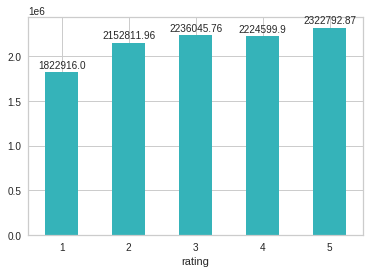

In [ ]:
a = data1.groupby('rating')['price'].mean()
a.plot(kind='bar',color='#35b3b9')
for i,j in enumerate(data1.groupby('rating')['price'].mean()):
    plt.text(i,j+50000 ,str(round(j,2)),ha='center')
plt.xticks(rotation=0)
plt.show()

In [ ]:
a = data1.groupby('rating')['price'].mean()
b = 100/(sum(a))
e = data1.groupby('rating')['price'].mean().sum()
f = a*(100/e)

In [ ]:
f

rating
1    16.942911
2    20.009096
3    20.782704
4    20.676322
5    21.588967
Name: price, dtype: float64

In [ ]:
a*b

rating
1    16.942911
2    20.009096
3    20.782704
4    20.676322
5    21.588967
Name: price, dtype: float64

In [ ]:
data1.groupby('rating')['price'].mean().transform(lambda x: x/sum(x)*100)

rating
1    16.942911
2    20.009096
3    20.782704
4    20.676322
5    21.588967
Name: price, dtype: float64

### **Chart 1**

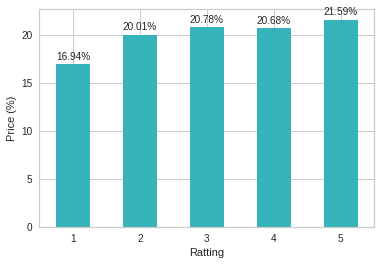

In [ ]:
#persen

a = data1.groupby('rating')['price'].mean().transform(lambda x: x/sum(x)*100)
a.plot(kind='bar',color='#35b3b9')
for i,j in enumerate(a):
    plt.text(i,j+0.5,f'{round(j,2)}%',ha='center')
plt.xlabel('Ratting')
plt.ylabel('Price (%)')
plt.xticks(rotation=0)
plt.show()

### **Chart 2**

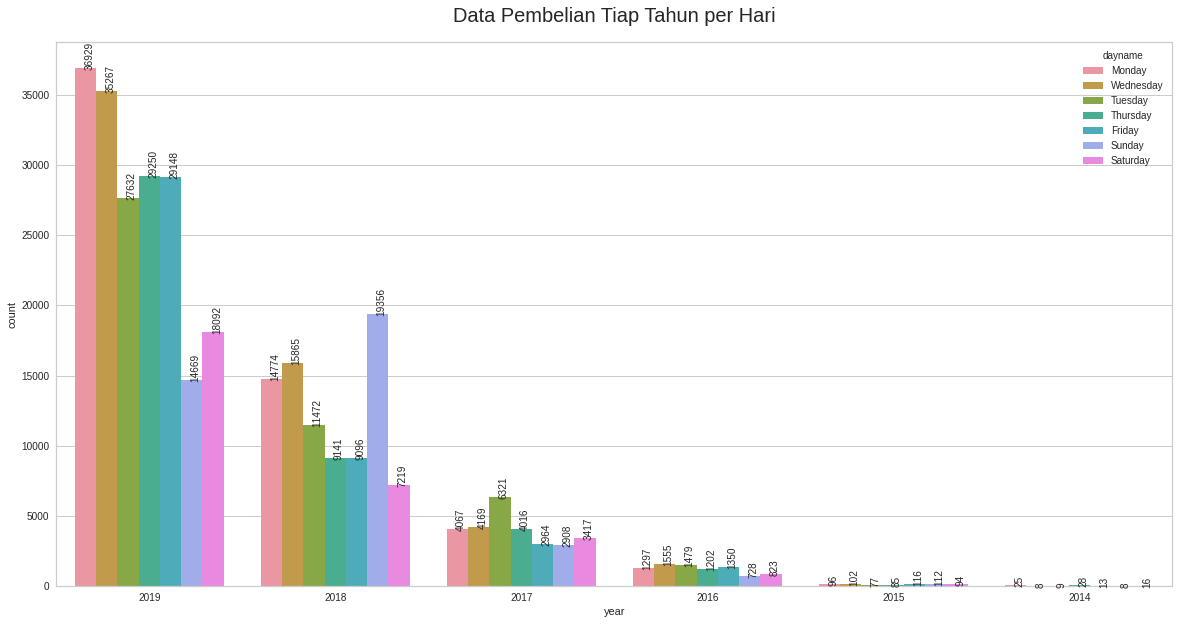

In [ ]:
filter_list = data1['dayname']
df2 = data1[data1.dayname.isin(filter_list)]

plt.title('Data Pembelian Tiap Tahun per Hari', pad=20, fontsize=20)
fig = plt.gcf()
fig.set_size_inches(20,10)

ax = sns.countplot(x='year', hue='dayname', data=df2, order = data1['year'].value_counts().index,
              hue_order = data1['dayname'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+2),rotation=90)

### **Chart 3**

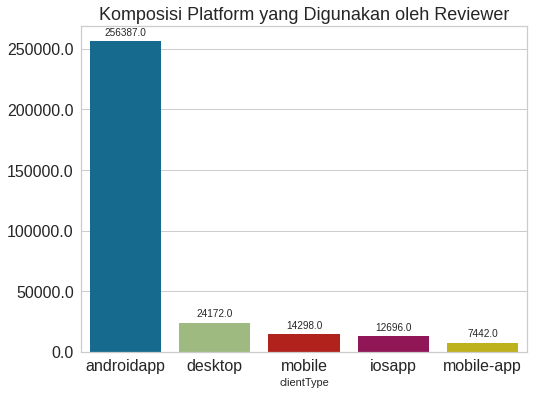

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

index = data1.clientType.value_counts().sort_values(ascending = False).index
ax = sns.countplot(data = data1, x = 'clientType', order = index)
ax.set_title('Komposisi Platform yang Digunakan oleh Reviewer', fontsize = 18)
ax.set_ylabel('')
ax.set_xticklabels(index, fontsize = 16)
ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
plt.show()

### **Chart 4**

 **Bivariate Analysis**

 Pada bagian ini, analisis bivariate digunakan untuk melakukan perbandingan antara setiap kolom categorical dengan kolom yang bersifat numerical.

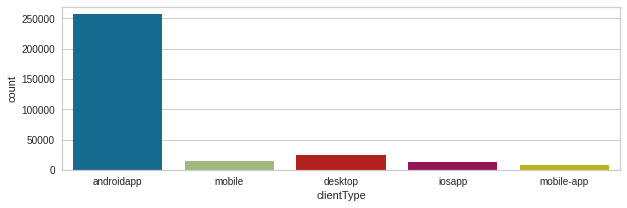

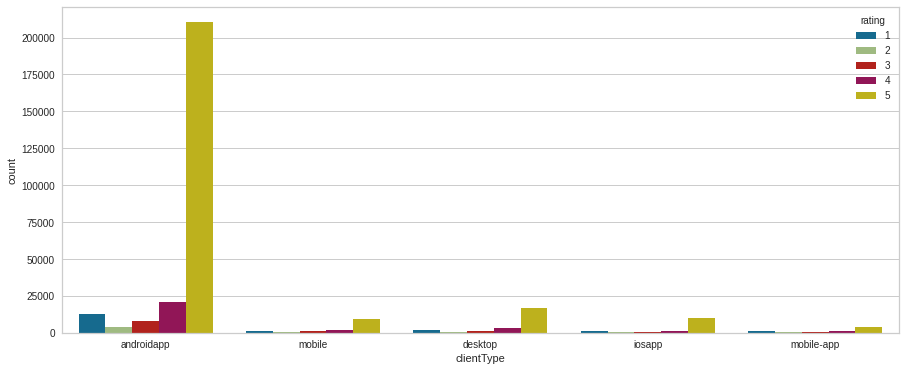

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data1["clientType"])
plt.show()

plt.figure(figsize=(15,6))
sns.countplot(x=data1["clientType"], hue=data1["rating"], data=pd.melt(data1))
plt.show()

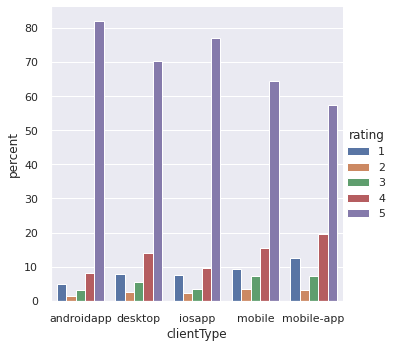

In [ ]:
sns.set(color_codes=True)

x,y = "clientType", "rating"

(data1
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

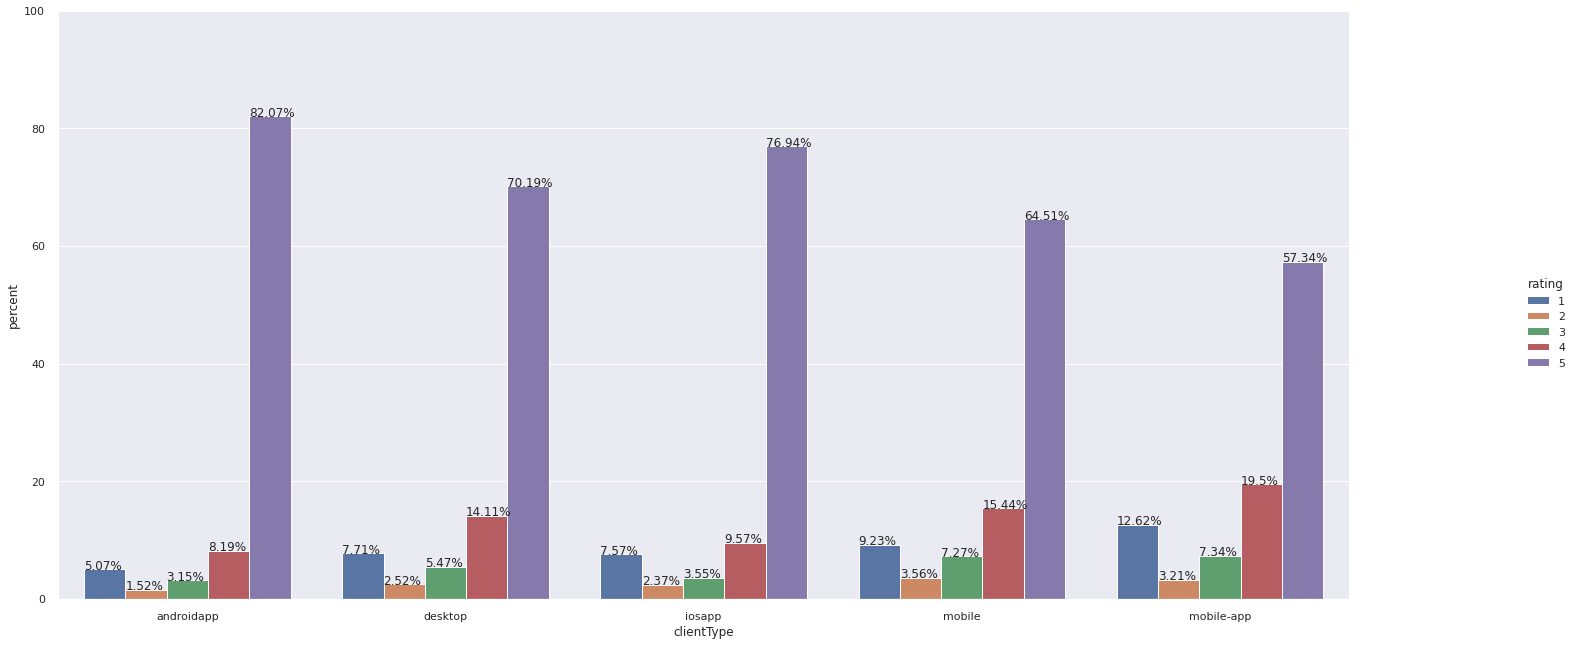

In [ ]:
sns.set(color_codes=True)
x,y = "clientType", "rating"

df1 = data1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

g.fig.set_size_inches(25,10)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


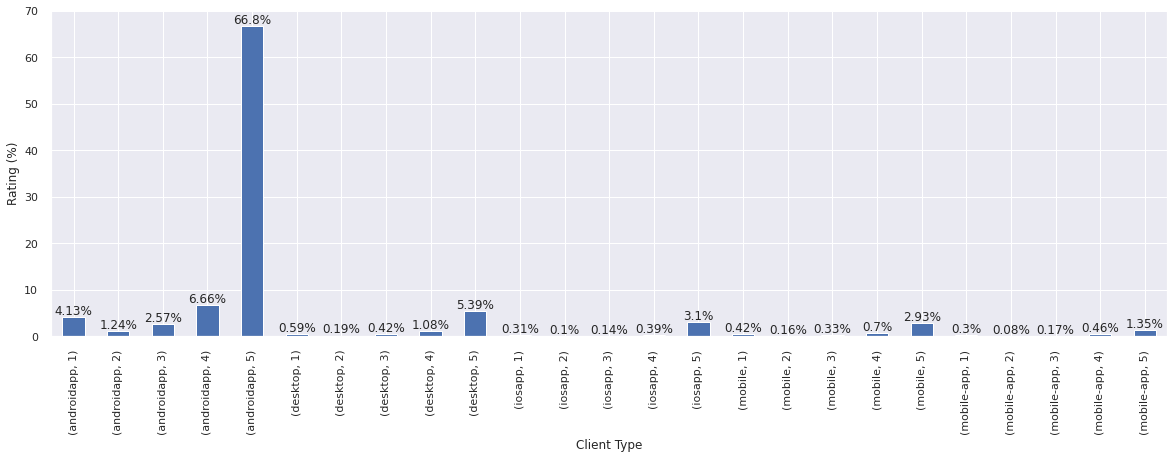

In [ ]:
#persen
a = data1.groupby(['clientType','rating'])['rating'].count().transform(lambda x: x/sum(x)*100)
a.plot(kind='bar',figsize=(20,6))
for i,j in enumerate(a):
    plt.text(i,j+0.5,f'{round(j,2)}%',ha='center')
plt.xlabel('Client Type')
plt.ylabel('Rating (%)')
#plt.xticks(rotation=0)
plt.show()

### **Chart 5**

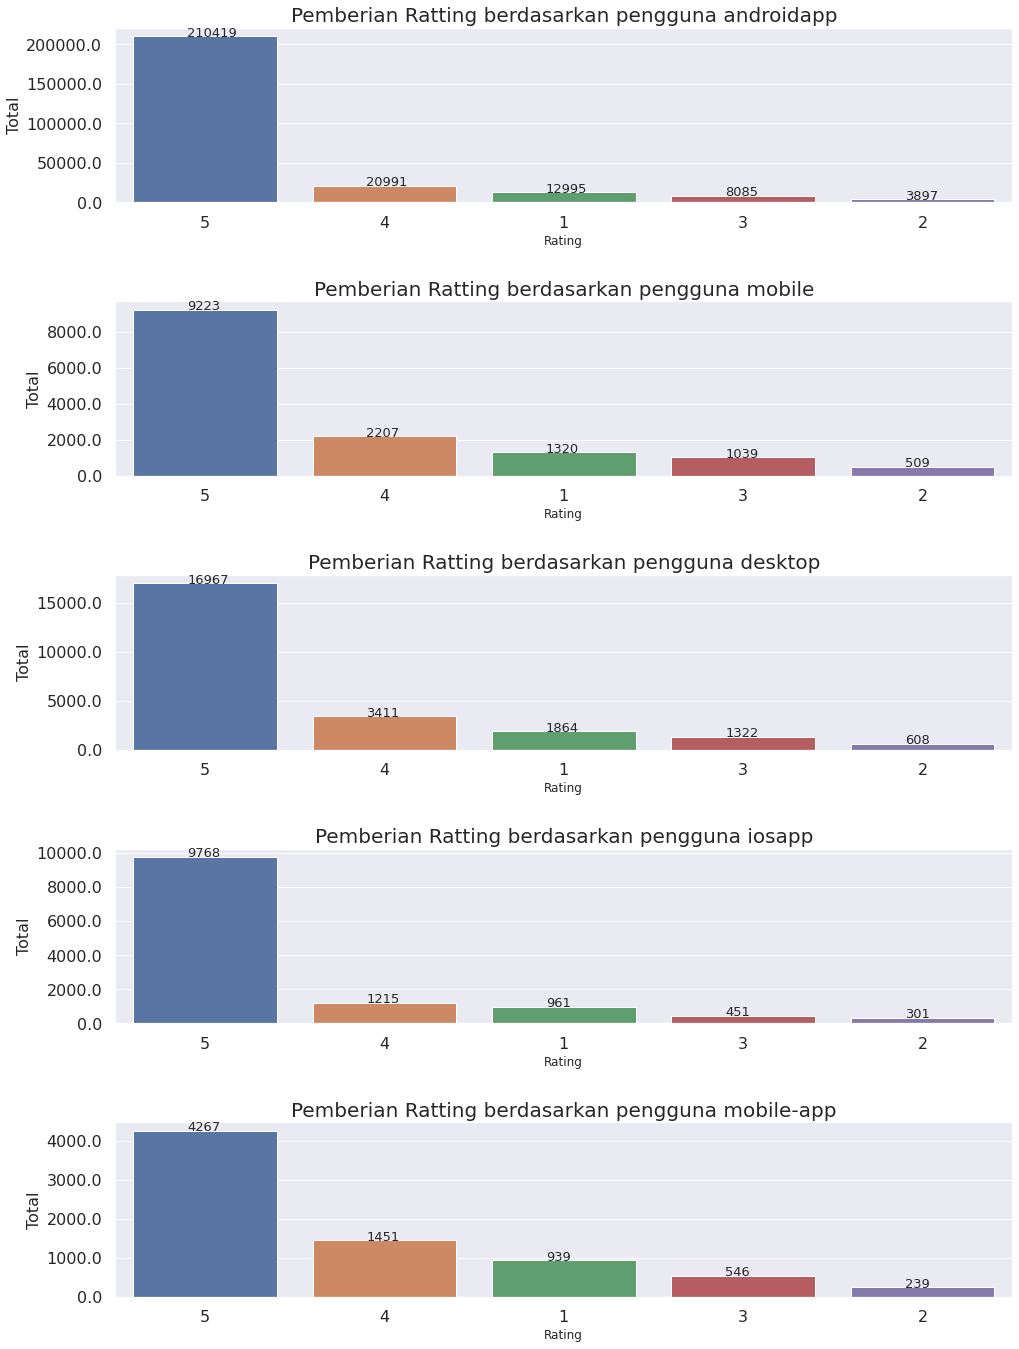

In [ ]:
catlist = data1.clientType.unique()

fig, ax = plt.subplots(len(catlist), figsize = (15, 20))
fig.tight_layout(pad = 6)



for ax, i in zip(ax.flatten(), catlist):
    index = data1[data1['clientType'] == i]['rating'].value_counts()

    sns.set_style('whitegrid')
    sns.countplot(ax = ax, data = data1, x = data1[data1['clientType'] == i]['rating'],
                  order = index.sort_values(ascending = False).index[:10])

    ax.set_title('Pemberian Ratting berdasarkan pengguna {}'.format(i), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    ax.set_xticklabels(index.sort_values(ascending = False).index[:10], fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('Rating')
    #pemberian label text tiap bar chart
    for p in ax.patches:
      ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2),fontsize=13)



plt.show()

CHART YG DI PAKAI YANG INI, SESUAI SETELAH DI REVISI

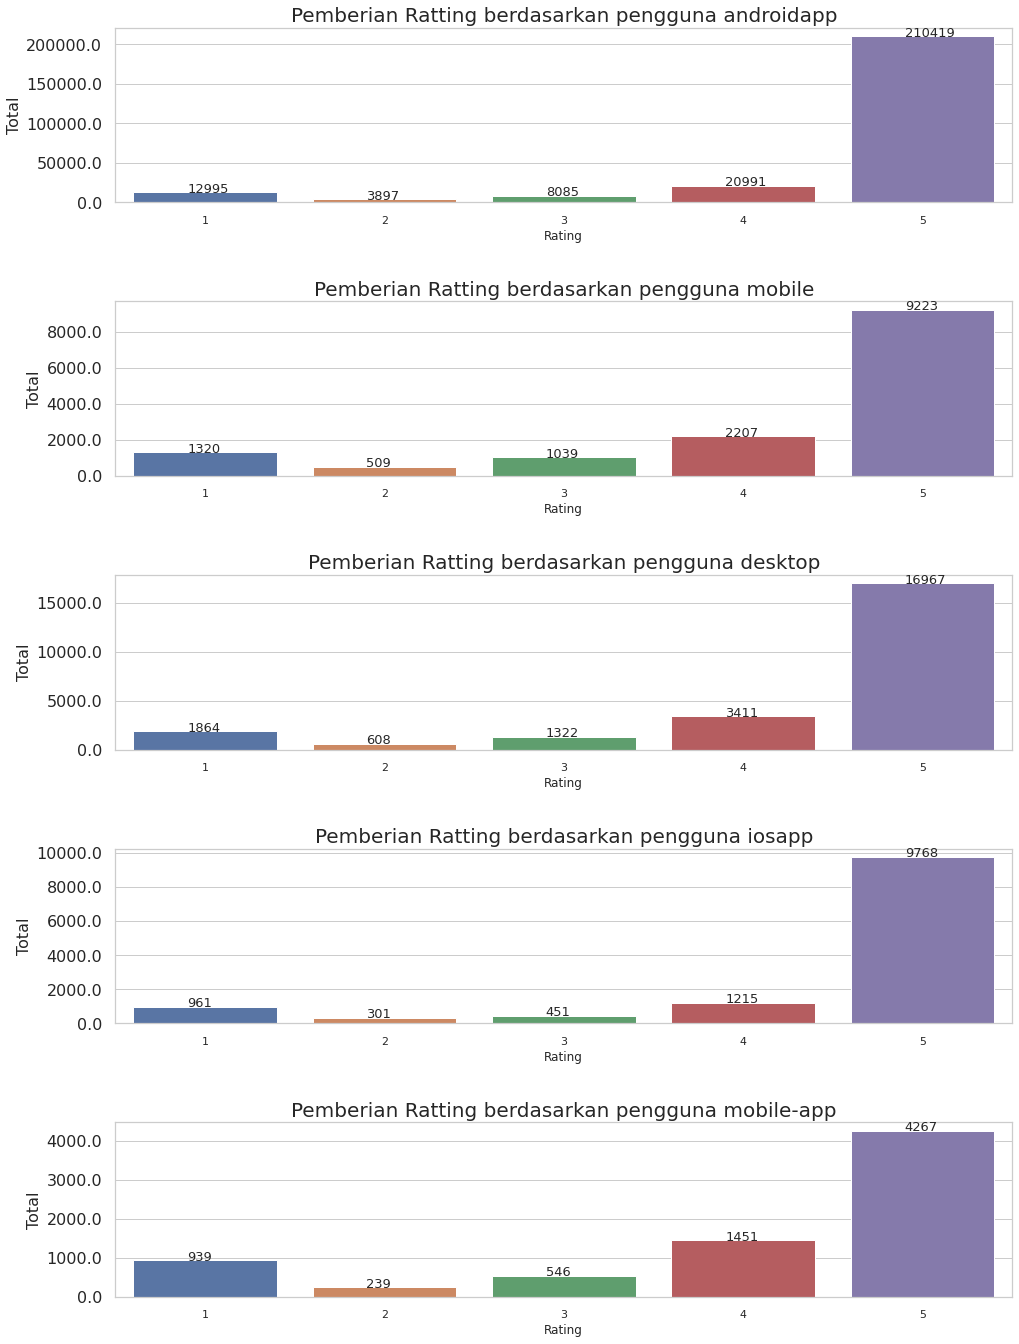

In [ ]:
catlist = data1.clientType.unique()

fig, ax = plt.subplots(len(catlist), figsize = (15, 20))
fig.tight_layout(pad = 6)

for ax, i in zip(ax.flatten(), catlist):
    index = data1[data1['clientType'] == i]['rating'].value_counts()

    sns.set_style('whitegrid')
    sns.countplot(ax = ax, data = data1, x = data1[data1['clientType'] == i]['rating'])
    ax.set_title('Pemberian Ratting berdasarkan pengguna {}'.format(i), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    #ax.set_xticklabels(index.sort_values(ascending = False).index[:10], fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('Rating')
    #pemberian label text tiap bar chart
    for p in ax.patches:
      ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2),fontsize=13)



plt.show()

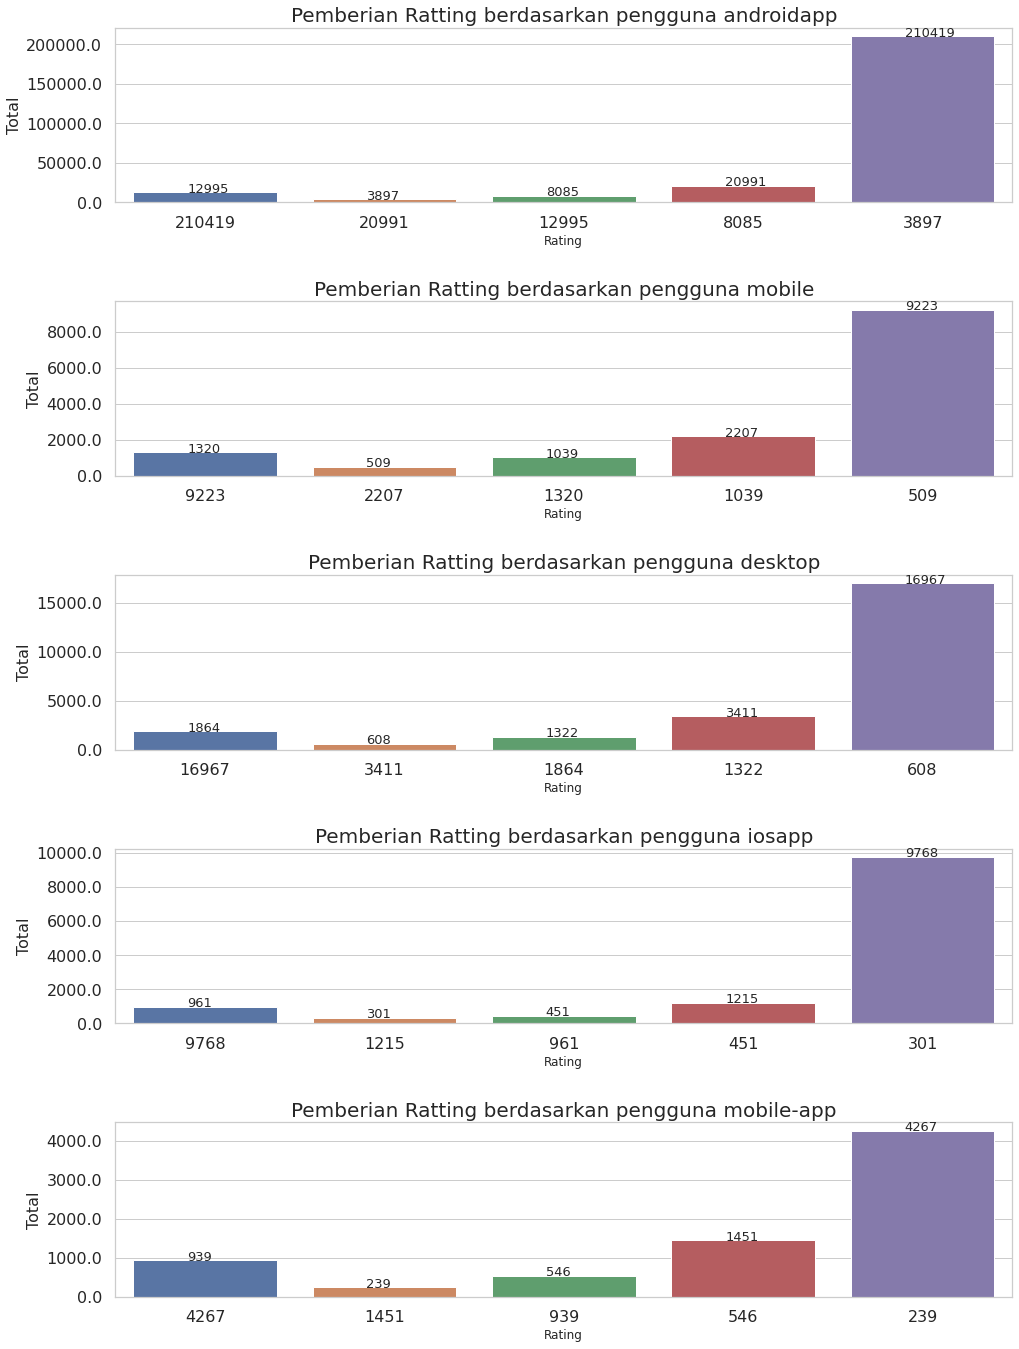

In [ ]:
catlist = data1.clientType.unique()

fig, ax = plt.subplots(len(catlist), figsize = (15, 20))
fig.tight_layout(pad = 6)

for ax, i in zip(ax.flatten(), catlist):
    index = data1[data1['clientType'] == i]['rating'].value_counts()

    sns.set_style('whitegrid')
    sns.countplot(ax = ax, data = data1, x = data1[data1['clientType'] == i]['rating'])

    ax.set_title('Pemberian Ratting berdasarkan pengguna {}'.format(i), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    ax.set_xticklabels(index, fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('Rating')

    #pemberian label text tiap bar chart
    for p in ax.patches:
      ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2),fontsize=13)



plt.show()

### **Chart 6**

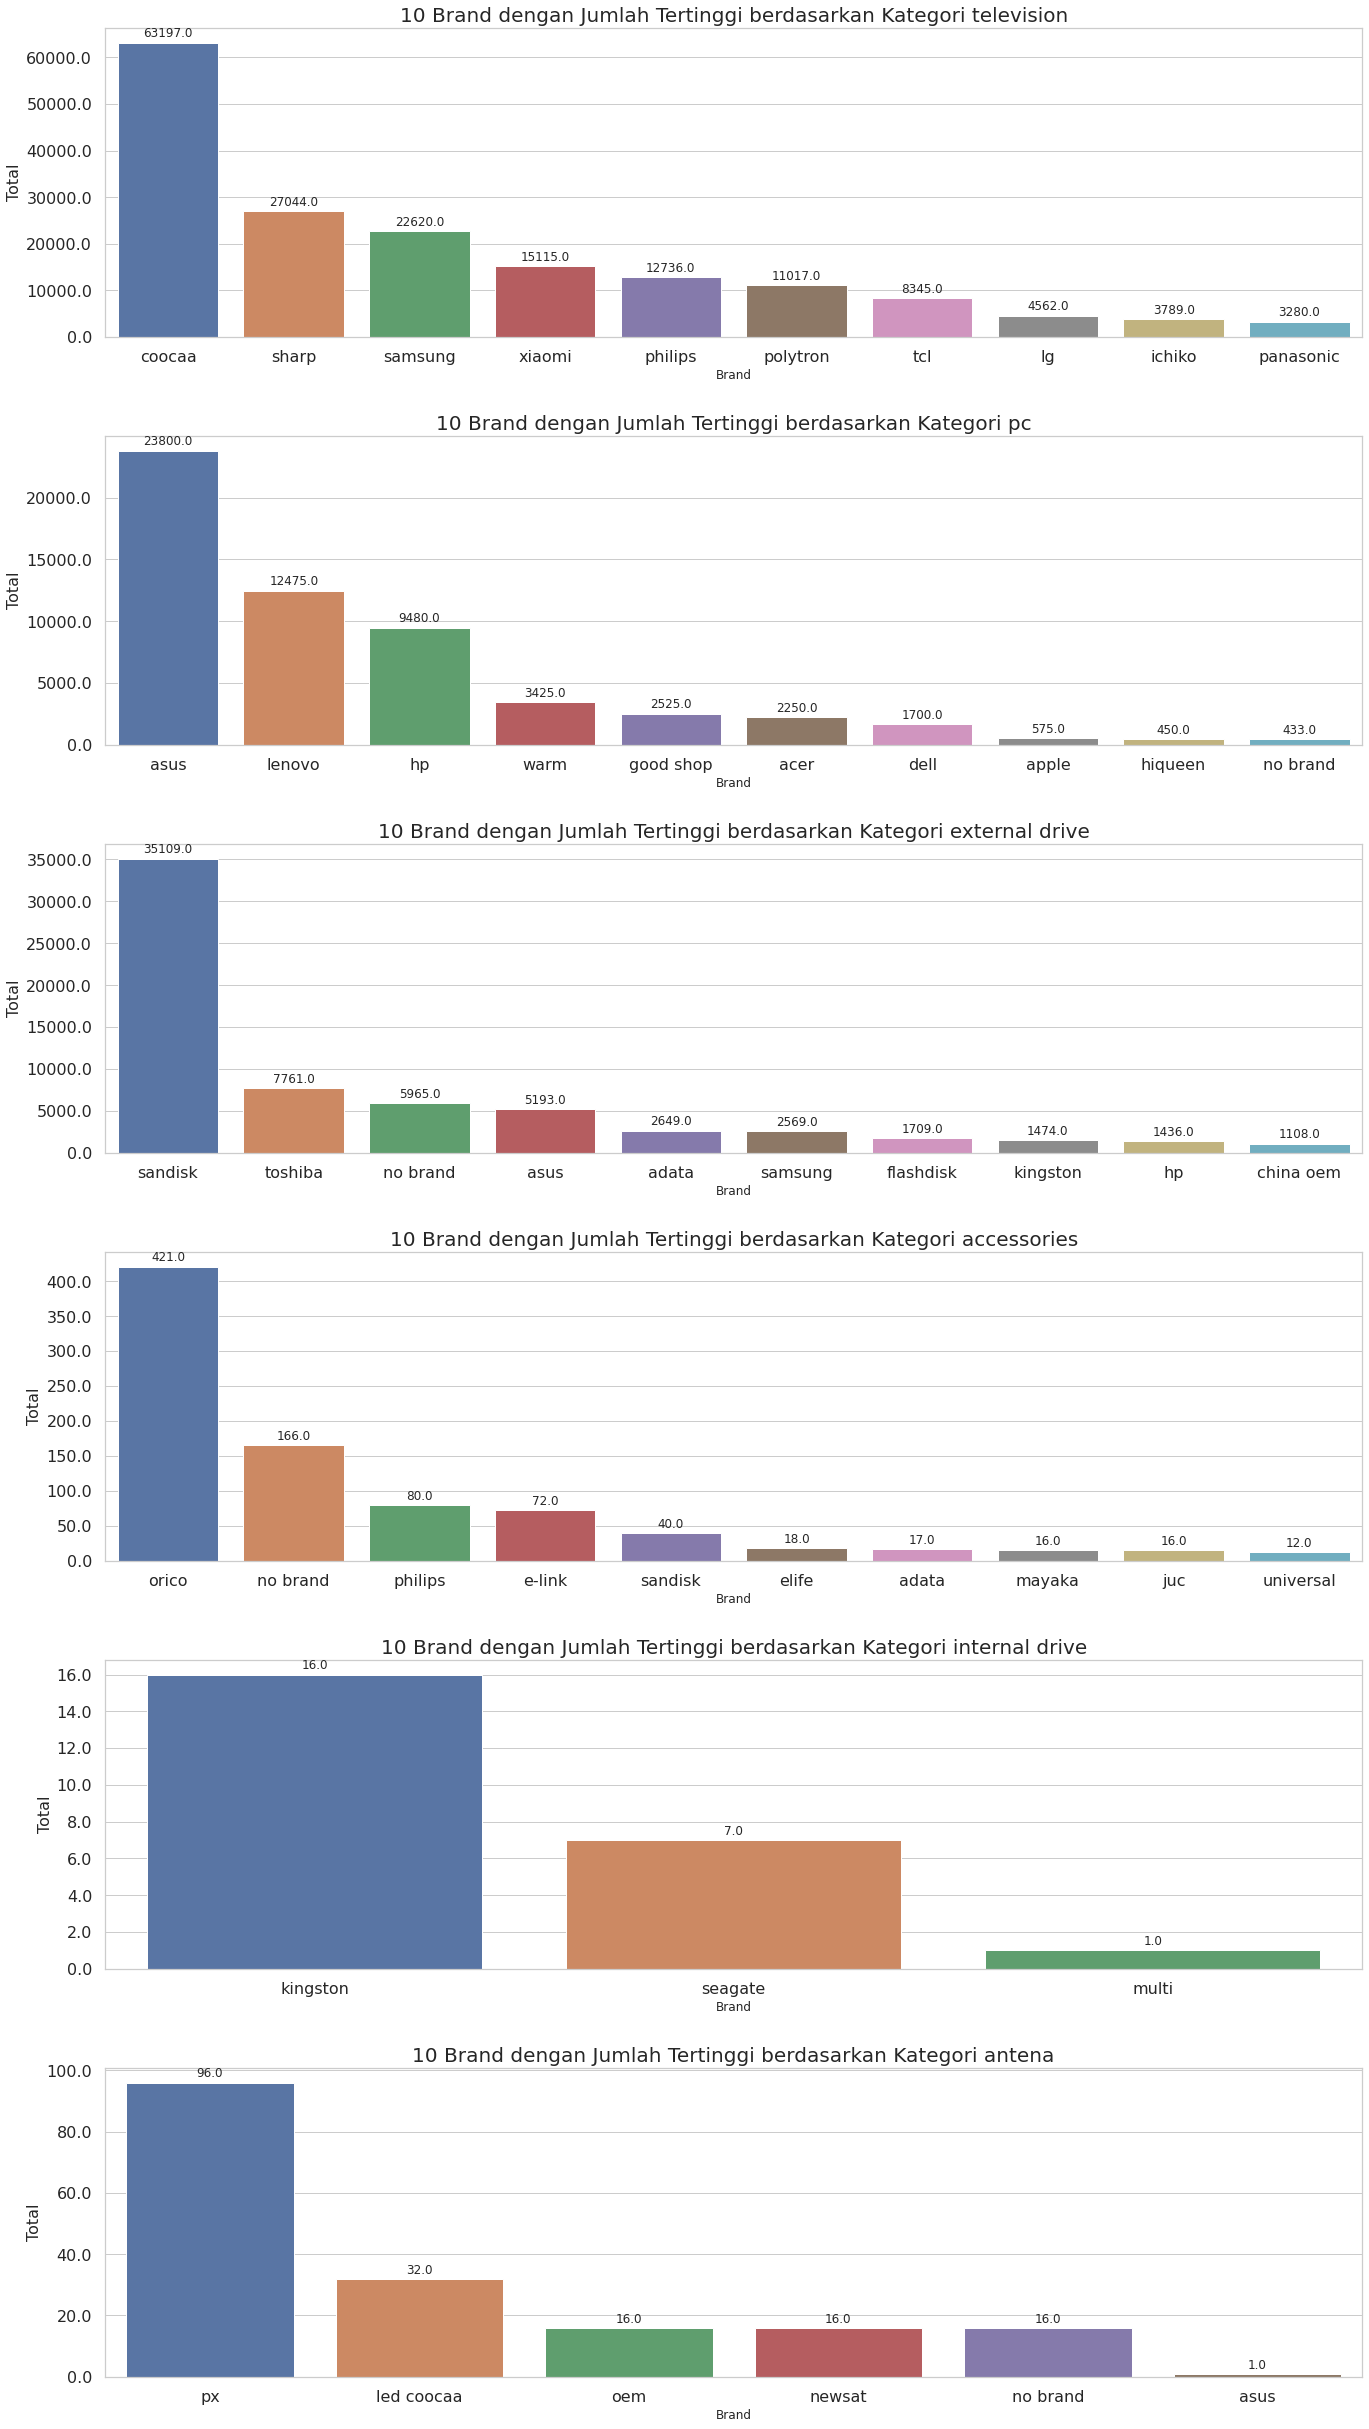

In [ ]:
catlist = data1.category_true.unique()


fig, ax = plt.subplots(len(catlist), figsize = (20, 35))
fig.tight_layout(pad = 6)

for ax, i in zip(ax.flatten(), catlist):
    index = data1[data1['category_true'] == i]['brandName'].value_counts()

    sns.set_style('whitegrid')
    sns.countplot(ax = ax, data = data1, x = data1[data1['category_true'] == i]['brandName'],
                  order = index.sort_values(ascending = False).index[:10])
    ax.set_title('10 Brand dengan Jumlah Tertinggi berdasarkan Kategori {}'.format(i), fontsize = 20)
    ax.set_ylabel('Total', fontsize = 16)
    ax.set_xticklabels(index.sort_values(ascending = False).index[:10], fontsize = 16)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 16)
    ax.set_xlabel('Brand')
    #pemberian label text tiap bar chart
    #for p in ax.patches:
      #ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2.5),fontsize=13)

    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
plt.show()

In [ ]:
#Membuat kolom baru = count
data1.insert(column = 'count', value = 1, loc = 1)
print(data1.shape)
data1.head()

(314995, 22)


itemId  count category_true  \
0  100002528      1    television   
1  100002528      1    television   
2  100002528      1    television   
3  100002528      1    television   
8  100002528      1    television   

                                        product_name brandName  \
0  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
1  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
2  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
3  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
8  toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   

                                                 url    price  averageRating  \
0  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
1  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
2  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
3  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   
8  https://www.lazada.co.id/products/toshiba-smar...  2499000              4   

   totalReviews         reviewer  rating                     reviewContent  \
0             8         kamal u.       5   bagus  mantap dah sesui pesanan   
1             8       yofanca m.       4                bagus, sesuai foto   
2             8  lazada customer       5  okkkkk mantaaaaaaapppp ... goood   
3             8  lazada customer       4                      bagus sesuai   
8             8         kamal u.       5   bagus  mantap dah sesui pesanan   

   likeCount  upVotes  downVotes  helpful  relevanceScore boughtDate  \
0          0        0          0     True           26.51 2019-04-09   
1          0        0          0     True           22.49 2017-09-24   
2          0        0          0     True           21.50 2018-04-04   
3          0        0          0     True           20.51 2017-09-22   
8          0        0          0     True           26.51 2019-04-09   

   clientType  year  month    dayname  
0  androidapp  2019      4    Tuesday  
1  androidapp  2017      9     Sunday  
2  androidapp  2018      4  Wednesday  
3  androidapp  2017      9     Friday  
8  androidapp  2019      4    Tuesday

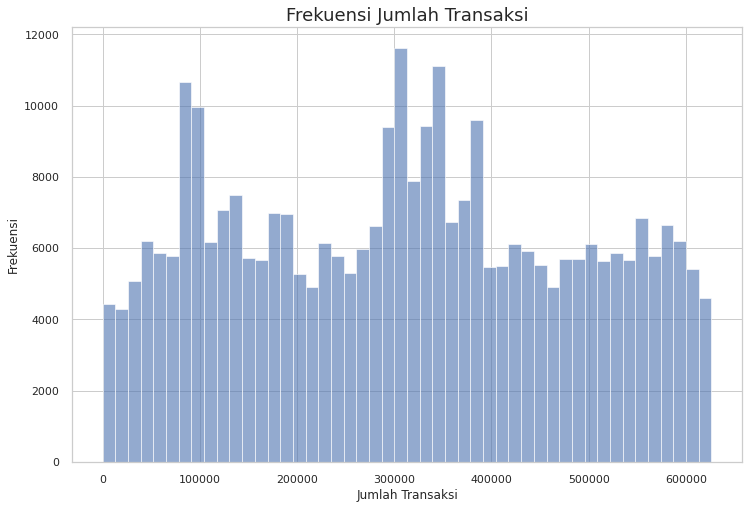

In [ ]:
#Histogram count
plt.figure(figsize = (12, 8))

plt.hist(data1.index, bins = 48, alpha = 0.6)
plt.title('Frekuensi Jumlah Transaksi', size = 18)
#plt.xlim('2014', '2019')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.show()

### **Chart 7**

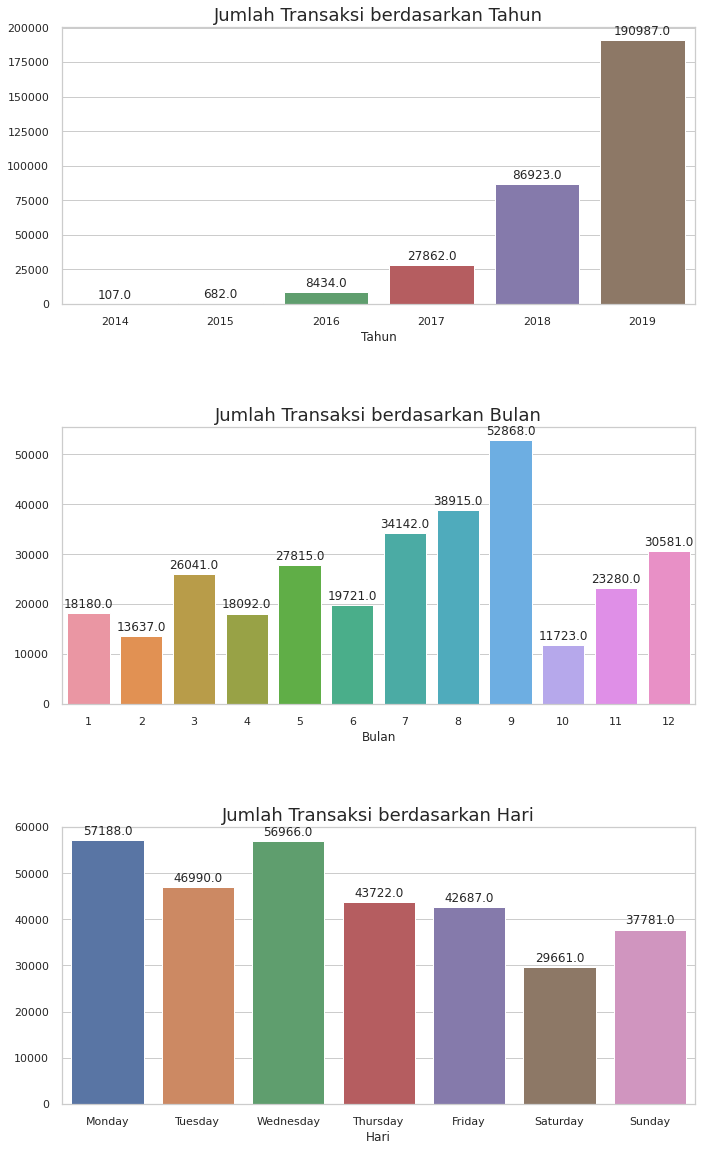

In [ ]:
fig, ax = plt.subplots(3, 1, figsize = (12, 18))
fig.tight_layout(pad = 8)

sns.countplot(data = data1, x = 'year', ax = ax[0])
ax[0].set_title('Jumlah Transaksi berdasarkan Tahun', size = 18)
ax[0].set_ylabel('')
ax[0].set_xlabel('Tahun')

#pemberian label text tiap bar chart
for p in ax[0].patches:
      ax[0].annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')


sns.countplot(data = data1, x = 'month', ax = ax[1])
ax[1].set_title('Jumlah Transaksi berdasarkan Bulan', size = 18)
ax[1].set_ylabel('')
ax[1].set_xlabel('Bulan')

#pemberian label text tiap bar chart
for p in ax[1].patches:
      ax[1].annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')


sns.countplot(data = data1, x = 'dayname', ax = ax[2],
              order = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax[2].set_title('Jumlah Transaksi berdasarkan Hari', size = 18)
ax[2].set_ylabel('')
ax[2].set_xlabel('Hari')

#pemberian label text tiap bar chart
for p in ax[2].patches:
      ax[2].annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

plt.show()


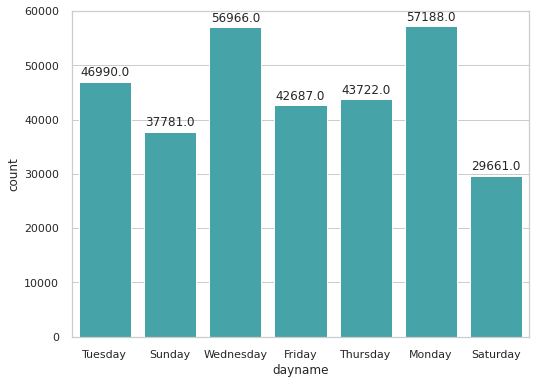

In [ ]:
#melakukan Exploratory dayname untuk dianalysis dan mengenal data lebih jauh
f = plt.figure(figsize=(18,6))
f.add_subplot(1,2,1)
ax = sns.countplot(data1['dayname'],color='#35b3b9')

#pemberian label text tiap bar chart
for p in ax.patches:
      ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
plt.show()

Pada bar diatas, pembelian hari tertinggi jatuh pada hari Senin dan Rabu

### **Chart 8**

In [ ]:
df_resampled = data1[['boughtDate']]
df_resampled.insert(column = 'count', value = 1, loc = 1)
df_resampled.head()
df_resampled = df_resampled.groupby('boughtDate').count()

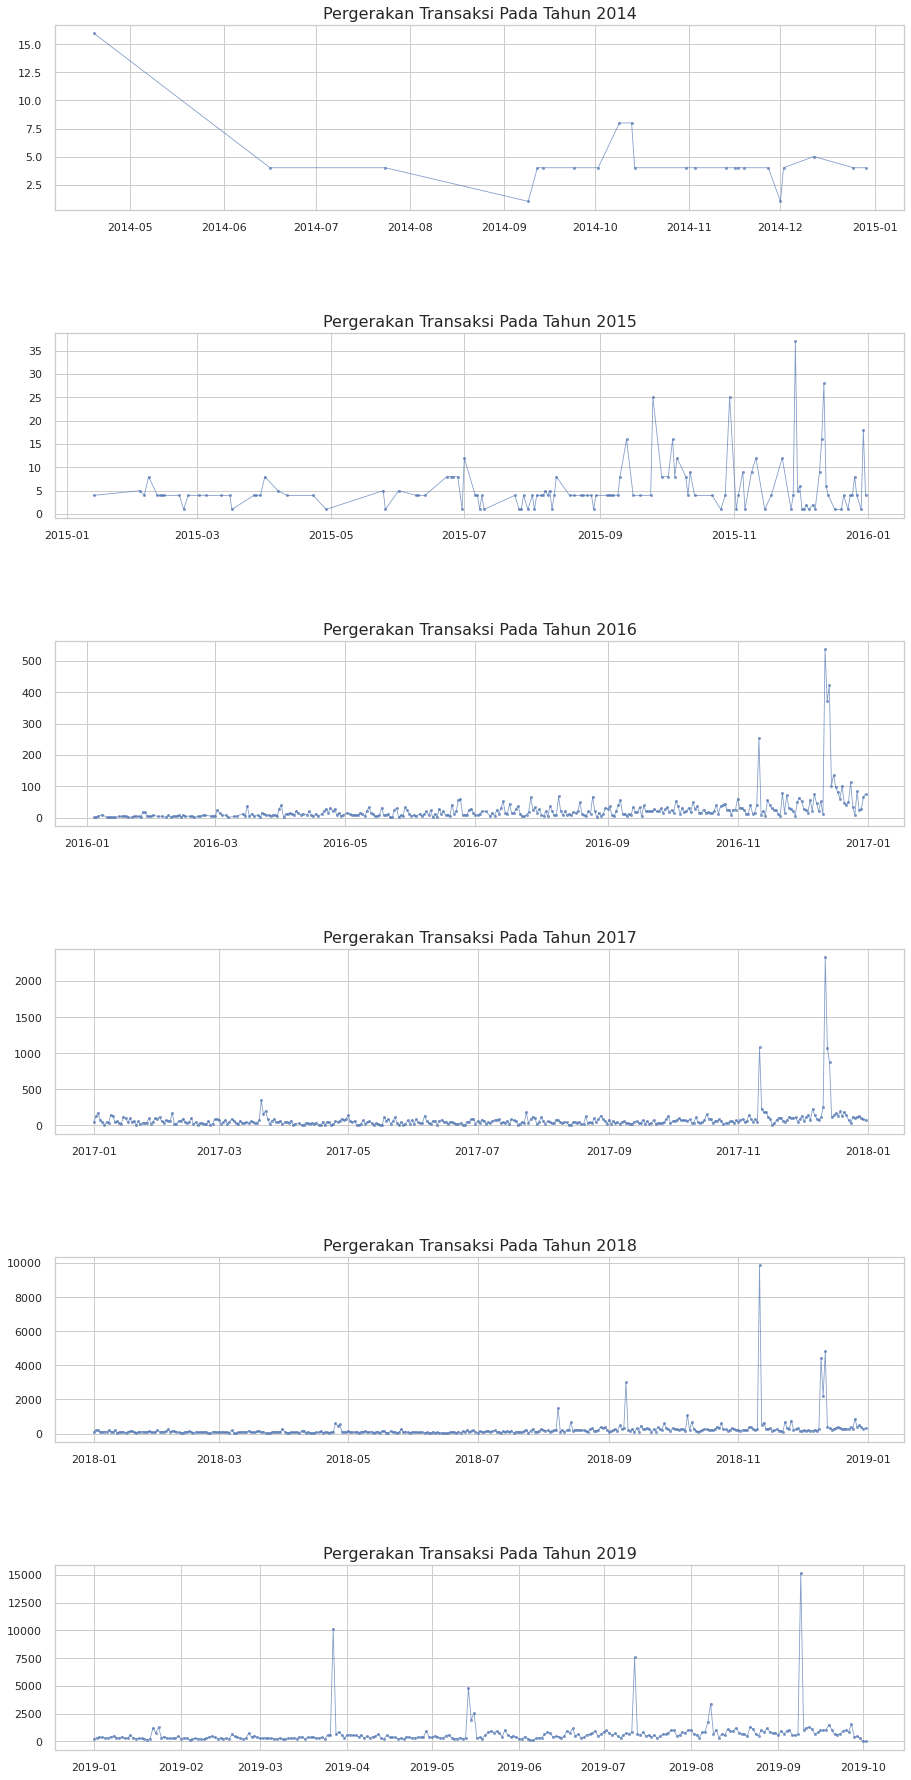

In [ ]:
year_list = ['2014', '2015', '2016', '2017', '2018', '2019']

fig, ax = plt.subplots(6,1, figsize = (15, 27))
fig.tight_layout(pad = 8)

for axis, i in zip(ax.flatten(), year_list):
        axis.plot(df_resampled.loc[i, 'count'], linewidth = 0.8, marker = '.', alpha = 0.7)
        axis.set_title('Pergerakan Transaksi Pada Tahun {}'.format(i), size = 16)
        axis.set_xlabel('')
        axis.set_ylabel('')

plt.show()

# **Data Focus - FbProphet**

## **Exploratory Data Focus**

In [ ]:
# mengetahui brandName yang daya jualnya tinggi dan rendah di tiap tahun
brand = data1.groupby(['year','brandName','category_true']).agg({"itemId":"count"}).sort_values(by="itemId", ascending = False).reset_index()
brand

year brandName   category_true  itemId
0    2019    coocaa      television   43080
1    2018    coocaa      television   20069
2    2019   sandisk  external drive   15100
3    2019     sharp      television   15042
4    2019      asus              pc   15000
..    ...       ...             ...     ...
463  2019       ssk  external drive       1
464  2015        wd  external drive       1
465  2019    thinch  external drive       1
466  2018     pixio  external drive       1
467  2019     adata      television       1

[468 rows x 4 columns]

Pemilihan Brand : coocaa, karena memiliki daya jual yang tinggi

In [ ]:
brand[brand['brandName']=='coocaa'].head()

year brandName category_true  itemId
0    2019    coocaa    television   43080
1    2018    coocaa    television   20069
178  2017    coocaa    television      48

In [ ]:
data1.groupby(['year','brandName','category_true']).agg({"itemId":"count"}).sort_values(by="itemId", ascending = False)

itemId
year brandName category_true         
2019 coocaa    television       43080
2018 coocaa    television       20069
2019 sandisk   external drive   15100
     sharp     television       15042
     asus      pc               15000
...                               ...
     ssk       external drive       1
2015 wd        external drive       1
2019 thinch    external drive       1
2018 pixio     external drive       1
2019 adata     television           1

[468 rows x 1 columns]

In [ ]:
data1.groupby(['year','brandName','category_true','product_name']).agg({"itemId":"count"}).sort_values(by="itemId", ascending = False)

itemId
year brandName       category_true  product_name                                              
2019 coocaa          television     [gratis ongkir] coocaa led tv 24 inch - hd pane...   10096
                                    [gratis ongkir] coocaa led tv 40 inch - full hd...    9332
     sharp           television     [gratis ongkir] sharp 24 inch led aquos hd tv -...    9072
     xiaomi          television     [gratis ongkir][android 9.0 ready] xiaomi led t...    7335
2017 philips         television     philips 32 inch led hd tv - hitam (model 32pha4...    7152
...                                                                                        ...
2018 western digital external drive wd my passport new design 1tb 2.5" usb3.0 - hit...       1
2017 samsung         external drive samsung hardisk case 2.5" sata - multicolor              1
2018 western digital external drive wd my passport 2tb new design -hitam- (bonus po...       1
2019 no brand        external drive hdd ps3 hardisk external 120gb support ps3 fat ...       1
2018 m-tech          external drive casing hardisk external 5.25 ide - usb 2.0               1

[4200 rows x 1 columns]

In [ ]:
data1['braket_product']=data1.product_name.str.findall("\[.*?\]").str[0]
data1

itemId  count   category_true  \
0       100002528      1      television   
1       100002528      1      television   
2       100002528      1      television   
3       100002528      1      television   
8       100002528      1      television   
...           ...    ...             ...   
626222      96876      1  external drive   
626229    9829834      1  external drive   
626236    9829834      1  external drive   
626243    9829834      1  external drive   
626250    9829834      1  external drive   

                                             product_name brandName  \
0       toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
1       toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
2       toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
3       toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
8       toshiba smart hd led tv 32" - 32l5650vj free b...   toshiba   
...                                                   ...       ...   
626222   samsung external case harddisk 2.5" sata - merah   samsung   
626229  toshiba usb flash memori 16gb + gratis otg con...   toshiba   
626236  toshiba usb flash memori 16gb + gratis otg con...   toshiba   
626243  toshiba usb flash memori 16gb + gratis otg con...   toshiba   
626250  toshiba usb flash memori 16gb + gratis otg con...   toshiba   

                                                      url    price  \
0       https://www.lazada.co.id/products/toshiba-smar...  2499000   
1       https://www.lazada.co.id/products/toshiba-smar...  2499000   
2       https://www.lazada.co.id/products/toshiba-smar...  2499000   
3       https://www.lazada.co.id/products/toshiba-smar...  2499000   
8       https://www.lazada.co.id/products/toshiba-smar...  2499000   
...                                                   ...      ...   
626222  https://www.lazada.co.id/products/samsung-exte...   119000   
626229  https://www.lazada.co.id/products/toshiba-usb-...    69000   
626236  https://www.lazada.co.id/products/toshiba-usb-...    69000   
626243  https://www.lazada.co.id/products/toshiba-usb-...    69000   
626250  https://www.lazada.co.id/products/toshiba-usb-...    69000   

        averageRating  totalReviews         reviewer  rating  \
0                   4             8         kamal u.       5   
1                   4             8       yofanca m.       4   
2                   4             8  lazada customer       5   
3                   4             8  lazada customer       4   
8                   4             8         kamal u.       5   
...               ...           ...              ...     ...   
626222              5             3        dhevia d.       5   
626229              3             7           fahman       1   
626236              3             7           fahman       1   
626243              3             7           fahman       1   
626250              3             7           fahman       1   

                                            reviewContent  likeCount  upVotes  \
0                         bagus  mantap dah sesui pesanan          0        0   
1                                      bagus, sesuai foto          0        0   
2                        okkkkk mantaaaaaaapppp ... goood          0        0   
3                                            bagus sesuai          0        0   
8                         bagus  mantap dah sesui pesanan          0        0   
...                                                   ...        ...      ...   
626222                          puas dengan barangnya! :)          0        0   
626229  flashdisk tak sesuia pesanan dan gambar , yang...          7        7   
626236  flashdisk tak sesuia pesanan dan gambar , yang...          7        7   
626243  flashdisk tak sesuia pesanan dan gambar , yang...          7        7   
626250  flashdisk tak sesuia pesanan dan gambar , yang...          7        7   

        downVotes  helpful  relevanceScore bou

In [ ]:
data1.product_name.str.findall("\[.*?\]").str[0].value_counts()

[gratis ongkir]         132097
[exclusive  lazada]       9250
[32 inch]                 5232
[24 inch]                 1616
[speaker tower]           1024
                         ...  
[wdbu6y0020bbk]              1
[1tb]                        1
[2tb/2.5inch/usb3.0]         1
[hdtb420ak3aa]               1
[2tb]                        1
Name: product_name, Length: 102, dtype: int64

In [ ]:
cek1 = data1.groupby(['year','brandName','category_true','product_name']).agg({"itemId":"count"}).sort_values(by="itemId", ascending = False).reset_index()
cek1

year        brandName   category_true  \
0     2019           coocaa      television   
1     2019           coocaa      television   
2     2019            sharp      television   
3     2019           xiaomi      television   
4     2017          philips      television   
...    ...              ...             ...   
4195  2018  western digital  external drive   
4196  2017          samsung  external drive   
4197  2018  western digital  external drive   
4198  2019         no brand  external drive   
4199  2018           m-tech  external drive   

                                           product_name  itemId  
0     [gratis ongkir] coocaa led tv 24 inch - hd pan...   10096  
1     [gratis ongkir] coocaa led tv 40 inch - full h...    9332  
2     [gratis ongkir] sharp 24 inch led aquos hd tv ...    9072  
3     [gratis ongkir][android 9.0 ready] xiaomi led ...    7335  
4     philips 32 inch led hd tv - hitam (model 32pha...    7152  
...                                                 ...     ...  
4195  wd my passport new design 1tb 2.5" usb3.0 - hi...       1  
4196        samsung hardisk case 2.5" sata - multicolor       1  
4197  wd my passport 2tb new design -hitam- (bonus p...       1  
4198  hdd ps3 hardisk external 120gb support ps3 fat...       1  
4199         casing hardisk external 5.25 ide - usb 2.0       1  

[4200 rows x 5 columns]

In [ ]:
cek1[cek1['year']==2019].head()

year brandName category_true  \
0  2019    coocaa    television   
1  2019    coocaa    television   
2  2019     sharp    television   
3  2019    xiaomi    television   
6  2019    coocaa    television   

                                        product_name  itemId  
0  [gratis ongkir] coocaa led tv 24 inch - hd pan...   10096  
1  [gratis ongkir] coocaa led tv 40 inch - full h...    9332  
2  [gratis ongkir] sharp 24 inch led aquos hd tv ...    9072  
3  [gratis ongkir][android 9.0 ready] xiaomi led ...    7335  
6  [gratis ongkir] coocaa led tv 40 inch android ...    6408

berdasarkan data di atas, alasan mengapa brandName **coocaa** dengan category true **television** menjadi product terlaris di tahu 2019, karena memiliki kata kunci **[gratis ongkir]**

In [ ]:
focus_data = data1[data1['brandName']=='coocaa']
focus_data.head()

itemId  count category_true  \
9033  102686573      1    television   
9034  102686573      1    television   
9035  102686573      1    television   
9036  102686573      1    television   
9037  102686573      1    television   

                                         product_name brandName  \
9033  coocaa 55g7200 - led tv smart uhd 55" - silver     coocaa   
9034  coocaa 55g7200 - led tv smart uhd 55" - silver     coocaa   
9035  coocaa 55g7200 - led tv smart uhd 55" - silver     coocaa   
9036  coocaa 55g7200 - led tv smart uhd 55" - silver     coocaa   
9037  coocaa 55g7200 - led tv smart uhd 55" - silver     coocaa   

                                                    url     price  \
9033  https://www.lazada.co.id/products/coocaa-55g72...  16999000   
9034  https://www.lazada.co.id/products/coocaa-55g72...  16999000   
9035  https://www.lazada.co.id/products/coocaa-55g72...  16999000   
9036  https://www.lazada.co.id/products/coocaa-55g72...  16999000   
9037  https://www.lazada.co.id/products/coocaa-55g72...  16999000   

      averageRating  totalReviews    reviewer  rating  \
9033              5             1  mohamed a.       5   
9034              5             1  mohamed a.       5   
9035              5             1  mohamed a.       5   
9036              5             1  mohamed a.       5   
9037              5             1  mohamed a.       5   

                                          reviewContent  likeCount  upVotes  \
9033  mudah dipakai. gambar tajam, banyak fungsi tam...          1        1   
9034  mudah dipakai. gambar tajam, banyak fungsi tam...          1        1   
9035  mudah dipakai. gambar tajam, banyak fungsi tam...          1        1   
9036  mudah dipakai. gambar tajam, banyak fungsi tam...          1        1   
9037  mudah dipakai. gambar tajam, banyak fungsi tam...          1        1   

      downVotes  helpful  relevanceScore boughtDate  clientType  year  month  \
9033          0     True           30.74 2017-11-02  androidapp  2017     11   
9034          0     True           30.74 2017-11-02  androidapp  2017     11   
9035          0     True           30.74 2017-11-02  androidapp  2017     11   
9036          0     True           30.74 2017-11-02  androidapp  2017     11   
9037          0     True           30.74 2017-11-02  androidapp  2017     11   

       dayname braket_product  
9033  Thursday            NaN  
9034  Thursday            NaN  
9035  Thursday            NaN  
9036  Thursday            NaN  
9037  Thursday            NaN

In [ ]:
cek1 = data1.groupby(['year','brandName','category_true','product_name']).agg({"itemId":"count"}).sort_values(by="itemId", ascending = False).reset_index()
cek1

year        brandName   category_true  \
0     2019           coocaa      television   
1     2019           coocaa      television   
2     2019            sharp      television   
3     2019           xiaomi      television   
4     2017          philips      television   
...    ...              ...             ...   
4195  2018  western digital  external drive   
4196  2017          samsung  external drive   
4197  2018  western digital  external drive   
4198  2019         no brand  external drive   
4199  2018           m-tech  external drive   

                                           product_name  itemId  
0     [gratis ongkir] coocaa led tv 24 inch - hd pan...   10096  
1     [gratis ongkir] coocaa led tv 40 inch - full h...    9332  
2     [gratis ongkir] sharp 24 inch led aquos hd tv ...    9072  
3     [gratis ongkir][android 9.0 ready] xiaomi led ...    7335  
4     philips 32 inch led hd tv - hitam (model 32pha...    7152  
...                                                 ...     ...  
4195  wd my passport new design 1tb 2.5" usb3.0 - hi...       1  
4196        samsung hardisk case 2.5" sata - multicolor       1  
4197  wd my passport 2tb new design -hitam- (bonus p...       1  
4198  hdd ps3 hardisk external 120gb support ps3 fat...       1  
4199         casing hardisk external 5.25 ide - usb 2.0       1  

[4200 rows x 5 columns]

In [ ]:
focus_data.groupby(['year','boughtDate']).agg({"boughtDate":"count"})#.sort_values(by="boughtDate", ascending = False).reset_index()

boughtDate
year boughtDate            
2017 2017-05-12          16
     2017-11-02          16
     2017-12-14          16
2018 2018-02-08          16
     2018-02-16          16
...                     ...
2019 2019-09-26          87
     2019-09-27         305
     2019-09-28          52
     2019-09-29          68
     2019-09-30          61

[394 rows x 1 columns]

In [ ]:
# cek kata produk
cek_produk = data1.groupby(['product_name','boughtDate','braket_product']).agg({"itemId":"count"}).reset_index()
cek_produk

product_name boughtDate  \
0      [free ongkir] sandisk flashdisk dual drive ot... 2018-03-31   
1      [free ongkir] sandisk flashdisk dual drive ot... 2018-05-28   
2     [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-12   
3     [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-13   
4     [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-14   
...                                                 ...        ...   
4580  xiaomi smart android led tv 32  - mi led 4a [3... 2019-09-11   
4581  xiaomi smart android led tv 32  - mi led 4a [3... 2019-09-16   
4582  xiaomi smart android led tv 32  - mi led 4a [3... 2019-09-18   
4583  xiaomi smart android led tv 32  - mi led 4a [3... 2019-09-24   
4584  xiaomi smart android led tv 43" - mi led 4a [4... 2019-05-26   

           braket_product  itemId  
0           [free ongkir]       4  
1           [free ongkir]       4  
2     [android 9.0 ready]      54  
3     [android 9.0 ready]      27  
4     [android 9.0 ready]       9  
...                   ...     ...  
4580            [32 inch]      16  
4581            [32 inch]      16  
4582            [32 inch]      16  
4583            [32 inch]      32  
4584            [43 inch]      16  

[4585 rows x 4 columns]

In [ ]:
# cek kata kunci / braket
cek_kunci = data1.groupby(['boughtDate','braket_product']).agg({"itemId":"count"}).reset_index()
cek_kunci

boughtDate       braket_product  itemId
0    2015-08-10              [promo]       1
1    2015-12-12      [gratis ongkir]      16
2    2016-01-27      [gratis ongkir]      16
3    2016-03-02      [gratis ongkir]      16
4    2016-03-31      [gratis ongkir]      16
...         ...                  ...     ...
1765 2019-09-30              [32 gb]       4
1766 2019-09-30  [android 9.0 ready]       9
1767 2019-09-30      [gratis ongkir]     141
1768 2019-10-01      [gratis ongkir]       3
1769 2019-10-01      [speaker tower]      16

[1770 rows x 3 columns]

In [ ]:
cek_kunci[(cek_kunci['boughtDate'] > '2019-09-01') & (cek_kunci['boughtDate'] <= '2019-09-30')].sort_values(by=['itemId'],ascending=False)

boughtDate       braket_product  itemId
1638 2019-09-09      [gratis ongkir]    9714
1636 2019-09-09  [exclusive  lazada]    1250
1756 2019-09-27      [gratis ongkir]    1135
1701 2019-09-19      [gratis ongkir]     777
1653 2019-09-11      [gratis ongkir]     631
...         ...                  ...     ...
1677 2019-09-16               [2tb ]       1
1692 2019-09-18                [4tb]       1
1666 2019-09-14                [1tb]       1
1647 2019-09-11               [2tb ]       1
1750 2019-09-27               [1tb ]       1

[178 rows x 3 columns]

In [ ]:
df = data1.groupby(['boughtDate']).agg({"itemId":"count"}).reset_index()
df

boughtDate  itemId
0    2014-04-19      16
1    2014-06-16       4
2    2014-07-24       4
3    2014-09-09       1
4    2014-09-12       4
...         ...     ...
1487 2019-09-28     428
1488 2019-09-29     452
1489 2019-09-30     271
1490 2019-10-01      27
1491 2019-10-02       4

[1492 rows x 2 columns]

In [ ]:
focus = df.rename(columns = {'boughtDate' : 'ds','itemId' : 'y'})
focus

ds    y
0    2014-04-19   16
1    2014-06-16    4
2    2014-07-24    4
3    2014-09-09    1
4    2014-09-12    4
...         ...  ...
1487 2019-09-28  428
1488 2019-09-29  452
1489 2019-09-30  271
1490 2019-10-01   27
1491 2019-10-02    4

[1492 rows x 2 columns]

In [ ]:
focus.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
# data cleaning

#focus.to_csv('/content/gdrive/MyDrive/Final Project/data_focus1.csv', index=False)

In [ ]:
focus[(focus['ds'] > '2019-09-01') & (focus['ds'] <= '2019-09-30')]

ds      y
1461 2019-09-02    949
1462 2019-09-03    708
1463 2019-09-04    920
1464 2019-09-05   1067
1465 2019-09-06    571
1466 2019-09-07    544
1467 2019-09-08    632
1468 2019-09-09  15160
1469 2019-09-10   1033
1470 2019-09-11   1225
1471 2019-09-12   1300
1472 2019-09-13   1109
1473 2019-09-14    638
1474 2019-09-15    825
1475 2019-09-16    986
1476 2019-09-17   1024
1477 2019-09-18   1056
1478 2019-09-19   1500
1479 2019-09-20   1050
1480 2019-09-21    649
1481 2019-09-22    620
1482 2019-09-23    709
1483 2019-09-24    940
1484 2019-09-25   1020
1485 2019-09-26    877
1486 2019-09-27   1568
1487 2019-09-28    428
1488 2019-09-29    452
1489 2019-09-30    271

## **Visualisasi Data Focus - FBProphet**
<br> menggunakan time series forecasting dalam skala besar dengan mudah
<br> FBProphet menggunakan model time series yang dapat didekomposisi dengan 3 komponen utama: seasonal, trends, holidays/events effect dan error.

In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import library prophet
import prophet
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(focus)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1852 2020-09-27
1853 2020-09-28
1854 2020-09-29
1855 2020-09-30
1856 2020-10-01

In [ ]:
future

ds
0    2014-04-19
1    2014-06-16
2    2014-07-24
3    2014-09-09
4    2014-09-12
...         ...
1852 2020-09-27
1853 2020-09-28
1854 2020-09-29
1855 2020-09-30
1856 2020-10-01

[1857 rows x 1 columns]

In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
1852 2020-09-27  1611.145207   787.739436  2389.086863
1853 2020-09-28  1692.320610  1006.820268  2458.967429
1854 2020-09-29  1637.338587   833.871813  2397.143617
1855 2020-09-30  1671.951738   925.858981  2471.299840
1856 2020-10-01  1605.920688   843.382254  2339.810284

In [ ]:
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2014-04-19   -64.466990 -1029.100087   366.603194   -64.466990   
1    2014-06-16   -58.050674  -878.571195   717.034588   -58.050674   
2    2014-07-24   -53.846881  -819.444263   712.450406   -53.846881   
3    2014-09-09   -48.647452  -632.463775   856.502199   -48.647452   
4    2014-09-12   -48.315574  -661.968202   857.179753   -48.315574   
...         ...          ...          ...          ...          ...   
1852 2020-09-27  1670.078385   787.739436  2389.086863  1613.082468   
1853 2020-09-28  1671.975338  1006.820268  2458.967429  1614.563231   
1854 2020-09-29  1673.872291   833.871813  2397.143617  1616.043995   
1855 2020-09-30  1675.769244   925.858981  2471.299840  1617.610769   
1856 2020-10-01  1677.666197   843.382254  2339.810284  1619.289595   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      -64.466990     -202.509991           -202.509991           -202.509991   
1      -58.050674      -26.783619            -26.783619            -26.783619   
2      -53.846881       15.330814             15.330814             15.330814   
3      -48.647452      168.351479            168.351479            168.351479   
4      -48.315574      139.210553            139.210553            139.210553   
...           ...             ...                   ...                   ...   
1852  1718.719434      -58.933178            -58.933178            -58.933178   
1853  1720.852703       20.345271             20.345271             20.345271   
1854  1722.925472      -36.533704            -36.533704            -36.533704   
1855  1725.028122       -3.817506             -3.817506             -3.817506   
1856  1727.276092      -71.745509            -71.745509            -71.745509   

         weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
0    -73.202943    -73.202943    -73.202943 -129.307047   -129.307047   
1     55.938027     55.938027     55.938027  -82.721647    -82.721647   
2     -1.772325     -1.772325     -1.772325   17.103140     17.103140   
3     11.319447     11.319447     11.319447  157.032033    157.032033   
4    -11.595497    -11.595497    -11.595497  150.806050    150.806050   
...         ...           ...           ...         ...           ...   
1852 -36.224791    -36.224791    -36.224791  -22.708386    -22.708386   
1853  55.938027     55.938027     55.938027  -35.592756    -35.592756   
1854  11.319447     11.319447     11.319447  -47.853151    -47.853151   
1855  55.538083     55.538083     55.538083  -59.355589    -59.355589   
1856  -1.772325     -1.772325     -1.772325  -69.973184    -69.973184   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      -129.307047                   0.0                         0.0   
1       -82.721647                   0.0                         0.0   
2        17.103140                   0.0                         0.0   
3       157.032033                   0.0                         0.0   
4       150.806050                   0.0                         0.0   
...            ...                   ...                         ...   
1852    -22.708386                   0.0                         0.0   
1853    -35.592756                   0.0                         0.0   
1854    -47.853151                   0.0                         0.0   
1855    -59.355589                   0.0                         0.0   
1856    -69.973184                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
0                            0.0  -266.976981  
1                            0.0   -84.834293  
2                            0.0   -38.516066  
3                            0.0   119.704027  
4                            0.0    90.894979  
...                          ...          ...  
1852                         0.0  1611.145207  
1853                         0.0  1692.320610  
1854         

In [ ]:
forecast.describe()

trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
count  1857.000000  1857.000000  1857.000000  1857.000000  1857.000000   
mean    430.496023  -331.111267  1193.004621   426.034039   434.302765   
std     516.008824   523.111861   522.874143   506.919918   523.850077   
min     -64.466990 -1029.100087   366.603194   -64.466990   -64.466990   
25%      43.128893  -722.583991   798.938056    43.128893    43.128893   
50%     121.316006  -586.661702   936.058870   121.316006   121.316006   
75%     797.479963    16.140685  1544.843159   797.479963   797.479963   
max    1677.666197  1116.636535  2599.507479  1619.289595  1727.276092   

       additive_terms  additive_terms_lower  additive_terms_upper  \
count     1857.000000           1857.000000           1857.000000   
mean         0.999902              0.999902              0.999902   
std         89.247859             89.247859             89.247859   
min       -217.797470           -217.797470           -217.797470   
25%        -63.381978            -63.381978            -63.381978   
50%         -5.655263             -5.655263             -5.655263   
75%         61.155408             61.155408             61.155408   
max        233.936576            233.936576            233.936576   

            weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
count  1857.000000   1857.000000   1857.000000  1857.000000   1857.000000   
mean      0.767217      0.767217      0.767217     0.232685      0.232685   
std      43.300247     43.300247     43.300247    78.394471     78.394471   
min     -73.202943    -73.202943    -73.202943  -145.072291   -145.072291   
25%     -36.224791    -36.224791    -36.224791   -59.233969    -59.233969   
50%      -1.772325     -1.772325     -1.772325   -10.820803    -10.820803   
75%      55.538083     55.538083     55.538083    57.006712     57.006712   
max      55.938027     55.938027     55.938027   177.998548    177.998548   

       yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
count   1857.000000                1857.0                      1857.0   
mean       0.232685                   0.0                         0.0   
std       78.394471                   0.0                         0.0   
min     -145.072291                   0.0                         0.0   
25%      -59.233969                   0.0                         0.0   
50%      -10.820803                   0.0                         0.0   
75%       57.006712                   0.0                         0.0   
max      177.998548                   0.0                         0.0   

       multiplicative_terms_upper         yhat  
count                      1857.0  1857.000000  
mean                          0.0   431.495925  
std                           0.0   522.812478  
min                           0.0  -266.976981  
25%                           0.0    36.162523  
50%                           0.0   175.569440  
75%                           0.0   782.430219  
max                           0.0  1848.356802

In [ ]:
forecast.groupby(['ds','trend', 'yhat','weekly']).agg({'ds':'count',"trend":"sum"})

ds        trend
ds         trend        yhat         weekly                     
2014-04-19 -64.466990   -266.976981  -73.202943   1   -64.466990
2014-06-16 -58.050674   -84.834293    55.938027   1   -58.050674
2014-07-24 -53.846881   -38.516066   -1.772325    1   -53.846881
2014-09-09 -48.647452    119.704027   11.319447   1   -48.647452
2014-09-12 -48.315574    90.894979   -11.595497   1   -48.315574
...                                              ..          ...
2020-09-27  1670.078385  1611.145207 -36.224791   1  1670.078385
2020-09-28  1671.975338  1692.320610  55.938027   1  1671.975338
2020-09-29  1673.872291  1637.338587  11.319447   1  1673.872291
2020-09-30  1675.769244  1671.951738  55.538083   1  1675.769244
2020-10-01  1677.666197  1605.920688 -1.772325    1  1677.666197

[1857 rows x 2 columns]

In [ ]:
forecast[(forecast['ds'] > '2014-01-01') & (forecast['ds'] <= '2014-12-31')].agg({"trend":"sum"})

trend   -1029.505473
dtype: float64

In [ ]:
forecast[(forecast['ds'] > '2015-01-01') & (forecast['ds'] <= '2015-12-31')].agg({"trend":"sum"})

trend   -1354.316335
dtype: float64

In [ ]:
forecast[(forecast['ds'] > '2016-01-01') & (forecast['ds'] <= '2016-12-31')].agg({"trend":"sum"})

trend    8749.074697
dtype: float64

In [ ]:
forecast[(forecast['ds'] > '2017-01-01') & (forecast['ds'] <= '2017-12-31')].agg({"trend":"sum"})

trend    25361.526002
dtype: float64

In [ ]:
forecast[(forecast['ds'] > '2018-01-01') & (forecast['ds'] <= '2018-12-31')].agg({"trend":"sum"})

trend    81744.014813
dtype: float64

In [ ]:
forecast[(forecast['ds'] > '2019-01-01') & (forecast['ds'] <= '2019-12-31')].agg({"trend":"sum"})

trend    295461.388622
dtype: float64

In [ ]:
forecast[(forecast['ds'] > '2019-01-01') & (forecast['ds'] <= '2019-12-31')]

ds        trend  yhat_lower   yhat_upper  trend_lower  \
1218 2019-01-02   467.410126 -256.088302  1232.616348   467.410126   
1219 2019-01-03   469.307079 -338.671055  1178.875020   469.307079   
1220 2019-01-04   471.204032 -369.680167  1178.086207   471.204032   
1221 2019-01-05   473.100985 -447.372036  1037.897804   473.100985   
1222 2019-01-06   474.997938 -409.363519  1095.757377   474.997938   
...         ...          ...         ...          ...          ...   
1577 2019-12-27  1148.416285  464.744749  1950.807066  1143.055368   
1578 2019-12-28  1150.313238  347.676214  1802.735262  1144.891104   
1579 2019-12-29  1152.210191  401.560019  1933.464985  1146.689830   
1580 2019-12-30  1154.107144  463.311522  1936.513912  1148.507060   
1581 2019-12-31  1156.004098  398.671094  1978.963214  1150.256318   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1218   467.410126       22.408914             22.408914             22.408914   
1219   469.307079      -44.031661            -44.031661            -44.031661   
1220   471.204032      -61.537271            -61.537271            -61.537271   
1221   473.100985     -129.322109           -129.322109           -129.322109   
1222   474.997938      -96.992676            -96.992676            -96.992676   
...           ...             ...                   ...                   ...   
1577  1153.345658       37.065172             37.065172             37.065172   
1578  1155.376081      -39.514204            -39.514204            -39.514204   
1579  1157.490242      -17.086515            -17.086515            -17.086515   
1580  1159.514709       61.173038             61.173038             61.173038   
1581  1161.513886        3.506071              3.506071              3.506071   

         weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
1218  55.538083     55.538083     55.538083 -33.129169    -33.129169   
1219  -1.772325     -1.772325     -1.772325 -42.259336    -42.259336   
1220 -11.595497    -11.595497    -11.595497 -49.941774    -49.941774   
1221 -73.202943    -73.202943    -73.202943 -56.119166    -56.119166   
1222 -36.224791    -36.224791    -36.224791 -60.767884    -60.767884   
...         ...           ...           ...        ...           ...   
1577 -11.595497    -11.595497    -11.595497  48.660669     48.660669   
1578 -73.202943    -73.202943    -73.202943  33.688739     33.688739   
1579 -36.224791    -36.224791    -36.224791  19.138277     19.138277   
1580  55.938027     55.938027     55.938027   5.235010      5.235010   
1581  11.319447     11.319447     11.319447  -7.813376     -7.813376   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1218    -33.129169                   0.0                         0.0   
1219    -42.259336                   0.0                         0.0   
1220    -49.941774                   0.0                         0.0   
1221    -56.119166                   0.0                         0.0   
1222    -60.767884                   0.0                         0.0   
...            ...                   ...                         ...   
1577     48.660669                   0.0                         0.0   
1578     33.688739                   0.0                         0.0   
1579     19.138277                   0.0                         0.0   
1580      5.235010                   0.0                         0.0   
1581     -7.813376                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
1218                         0.0   489.819040  
1219                         0.0   425.275418  
1220                         0.0   409.666761  
1221                         0.0   343.778876  
1222                         0.0   378.005263  
...                          ...          ...  
1577                         0.0  1185.481457  
1578                         0.0  1110.799034  
1579                         0.0  113

In [ ]:
forecast[(forecast['ds'] > '2020-01-01') & (forecast['ds'] <= '2020-12-31')].agg({"trend":"sum"})

trend    388732.59555
dtype: float64

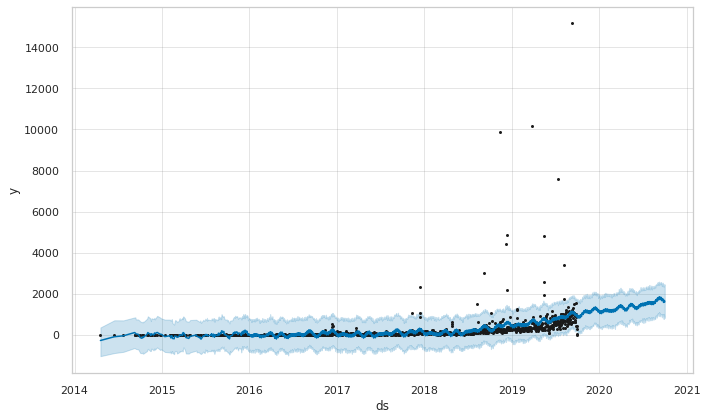

In [ ]:
# Python
fig1 = m.plot(forecast)

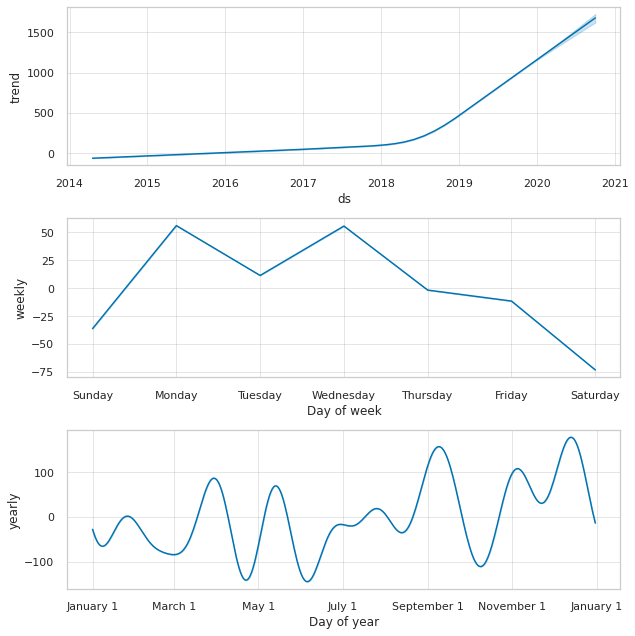

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
#1

cek_kunci[(cek_kunci['boughtDate'] > '2019-09-01') & (cek_kunci['boughtDate'] <= '2019-09-30')].sort_values(by=['itemId'],ascending=False)

boughtDate       braket_product  itemId
1638 2019-09-09      [gratis ongkir]    9714
1636 2019-09-09  [exclusive  lazada]    1250
1756 2019-09-27      [gratis ongkir]    1135
1701 2019-09-19      [gratis ongkir]     777
1653 2019-09-11      [gratis ongkir]     631
...         ...                  ...     ...
1677 2019-09-16               [2tb ]       1
1692 2019-09-18                [4tb]       1
1666 2019-09-14                [1tb]       1
1647 2019-09-11               [2tb ]       1
1750 2019-09-27               [1tb ]       1

[178 rows x 3 columns]

In [ ]:
#2

cek_kunci[(cek_kunci['boughtDate'] > '2019-03-01') & (cek_kunci['boughtDate'] <= '2019-03-30')].sort_values(by=['itemId'],ascending=False)

boughtDate                    braket_product  itemId
968 2019-03-27                   [gratis ongkir]    6788
973 2019-03-29                   [gratis ongkir]     443
956 2019-03-26                   [gratis ongkir]     278
971 2019-03-28                   [gratis ongkir]     239
952 2019-03-25                   [gratis ongkir]     187
..         ...                               ...     ...
934 2019-03-17                            [32gb]       4
940 2019-03-19                           [32 gb]       4
932 2019-03-16                         [usb 3.0]       4
960 2019-03-27  [1tb/usb 3.0/harddisk eksternal]       2
948 2019-03-23                   [wdbu6y0020bbk]       1

[87 rows x 3 columns]

In [ ]:
#3

cek_kunci[(cek_kunci['boughtDate'] > '2018-11-01') & (cek_kunci['boughtDate'] <= '2018-11-30')].sort_values(by=['itemId'],ascending=False)

boughtDate       braket_product  itemId
620 2018-11-11      [gratis ongkir]    5762
645 2018-11-23      [gratis ongkir]     503
650 2018-11-26      [gratis ongkir]     442
626 2018-11-13      [gratis ongkir]     340
619 2018-11-11  [exclusive  lazada]     200
..         ...                  ...     ...
642 2018-11-21            [usb 3.0]       4
640 2018-11-21              [16 gb]       4
637 2018-11-19       b/s/16gb]       4
633 2018-11-16            [merdeka]       1
621 2018-11-11            [merdeka]       1

[61 rows x 3 columns]

In [ ]:
#4

cek_kunci[(cek_kunci['boughtDate'] > '2019-07-01') & (cek_kunci['boughtDate'] <= '2019-07-30')].sort_values(by=['itemId'],ascending=False)

boughtDate   braket_product  itemId
1320 2019-07-12  [gratis ongkir]    5237
1392 2019-07-25  [gratis ongkir]     679
1396 2019-07-26  [gratis ongkir]     548
1277 2019-07-02  [gratis ongkir]     437
1310 2019-07-11  [gratis ongkir]     425
...         ...              ...     ...
1299 2019-07-09         [ 32gb ]       4
1389 2019-07-25           [32gb]       4
1388 2019-07-25         [ 32gb ]       4
1308 2019-07-11           [1tb ]       1
1311 2019-07-11   [hdtb420ak3aa]       1

[138 rows x 3 columns]

In [ ]:
#5

cek_kunci[(cek_kunci['boughtDate'] > '2018-12-01') & (cek_kunci['boughtDate'] <= '2018-12-30')].sort_values(by=['itemId'],ascending=False)

boughtDate   braket_product  itemId
681 2018-12-10  [gratis ongkir]    3275
687 2018-12-12  [gratis ongkir]    2997
683 2018-12-11  [gratis ongkir]    1770
720 2018-12-26  [gratis ongkir]     716
677 2018-12-09  [gratis ongkir]     194
..         ...              ...     ...
662 2018-12-03          [16 gb]       4
696 2018-12-17           [8 gb]       4
688 2018-12-12        [merdeka]       3
725 2018-12-28         [1125ss]       1
667 2018-12-04        [merdeka]       1

[73 rows x 3 columns]

In [ ]:
#Python
plot_components_plotly(m, forecast)


In [ ]:
# extract month and date from dates**
cek_produk['day'] = [i.day for i in cek_produk['boughtDate']]
cek_produk['month'] = [i.month for i in cek_produk['boughtDate']]

In [ ]:
cek_produk.head()

product_name boughtDate  \
0   [free ongkir] sandisk flashdisk dual drive ot... 2018-03-31   
1   [free ongkir] sandisk flashdisk dual drive ot... 2018-05-28   
2  [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-12   
3  [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-13   
4  [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-14   

        braket_product  itemId  day  month  
0        [free ongkir]       4   31      3  
1        [free ongkir]       4   28      5  
2  [android 9.0 ready]      54   12      7  
3  [android 9.0 ready]      27   13      7  
4  [android 9.0 ready]       9   14      7

In [ ]:
cek_produk.dtypes

product_name              object
boughtDate        datetime64[ns]
braket_product            object
itemId                     int64
day                        int64
month                      int64
dtype: object

In [ ]:
# cek kata produk
cek_produk1 = data1.groupby(['boughtDate','product_name','braket_product']).agg({"itemId":"count"}).reset_index()
cek_produk1

boughtDate                                       product_name  \
0    2015-08-10  [promo] original transcend harddisk eksternal ...   
1    2015-12-12  [gratis ongkir] samsung hd tv 24 inch (model: ...   
2    2016-01-27  [gratis ongkir] samsung hd tv 24 inch (model: ...   
3    2016-03-02  [gratis ongkir] samsung hd tv 24 inch (model: ...   
4    2016-03-31  [gratis ongkir] samsung hd tv 24 inch (model: ...   
...         ...                                                ...   
4580 2019-09-30  [gratis ongkir] sharp 24 inch led aquos hd tv ...   
4581 2019-09-30  [gratis ongkir] tcl led tv 24 inch-hd ready tv...   
4582 2019-09-30       flashdisk 32gb toshiba usb flashdisk [32 gb]   
4583 2019-10-01  [gratis ongkir] sharp 32 inch led hd usb tv - ...   
4584 2019-10-01  polytron led tv 32 inch hd - pld32t1850 [speak...   

       braket_product  itemId  
0             [promo]       1  
1     [gratis ongkir]      16  
2     [gratis ongkir]      16  
3     [gratis ongkir]      16  
4     [gratis ongkir]      16  
...               ...     ...  
4580  [gratis ongkir]      32  
4581  [gratis ongkir]      16  
4582          [32 gb]       4  
4583  [gratis ongkir]       3  
4584  [speaker tower]      16  

[4585 rows x 4 columns]

In [ ]:
cek_produk1.set_index("boughtDate", inplace=True)

In [ ]:
cek_produk1

product_name  \
boughtDate                                                      
2015-08-10  [promo] original transcend harddisk eksternal ...   
2015-12-12  [gratis ongkir] samsung hd tv 24 inch (model: ...   
2016-01-27  [gratis ongkir] samsung hd tv 24 inch (model: ...   
2016-03-02  [gratis ongkir] samsung hd tv 24 inch (model: ...   
2016-03-31  [gratis ongkir] samsung hd tv 24 inch (model: ...   
...                                                       ...   
2019-09-30  [gratis ongkir] sharp 24 inch led aquos hd tv ...   
2019-09-30  [gratis ongkir] tcl led tv 24 inch-hd ready tv...   
2019-09-30       flashdisk 32gb toshiba usb flashdisk [32 gb]   
2019-10-01  [gratis ongkir] sharp 32 inch led hd usb tv - ...   
2019-10-01  polytron led tv 32 inch hd - pld32t1850 [speak...   

             braket_product  itemId  
boughtDate                           
2015-08-10          [promo]       1  
2015-12-12  [gratis ongkir]      16  
2016-01-27  [gratis ongkir]      16  
2016-03-02  [gratis ongkir]      16  
2016-03-31  [gratis ongkir]      16  
...                     ...     ...  
2019-09-30  [gratis ongkir]      32  
2019-09-30  [gratis ongkir]      16  
2019-09-30          [32 gb]       4  
2019-10-01  [gratis ongkir]       3  
2019-10-01  [speaker tower]      16  

[4585 rows x 3 columns]

In [ ]:
cek_produk1.dtypes

product_name      object
braket_product    object
itemId             int64
dtype: object

## **Yearly, kenaikan**

In [ ]:
cek_produk = cek_produk.rename(columns = {'itemId' : 'sold'})
cek_produk.head()

product_name boughtDate  \
0   [free ongkir] sandisk flashdisk dual drive ot... 2018-03-31   
1   [free ongkir] sandisk flashdisk dual drive ot... 2018-05-28   
2  [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-12   
3  [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-13   
4  [android 9.0 ready] xiaomi led tv 32 inch - sm... 2019-07-14   

        braket_product  sold  day  month  
0        [free ongkir]     4   31      3  
1        [free ongkir]     4   28      5  
2  [android 9.0 ready]    54   12      7  
3  [android 9.0 ready]    27   13      7  
4  [android 9.0 ready]     9   14      7

In [ ]:
cek1 = cek_produk[(cek_produk['day'] >= 18) &
                  (cek_produk['day'] <= 31) &
                  (cek_produk['month'] ==3)]

cek1.sort_values('sold',ascending=False)

product_name boughtDate  \
3071  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2019-03-27   
1009  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-03-27   
501   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-03-27   
3342  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-03-27   
3537  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-03-27   
...                                                 ...        ...   
3759  flashdisk sandisk cruzer blade cz50 usb - [32 ... 2019-03-18   
0      [free ongkir] sandisk flashdisk dual drive ot... 2018-03-31   
4538   wd elements 1tb [1tb/usb 3.0/harddisk eksternal] 2019-03-27   
4480          transcend 25m3 hard disk eksternal [2 tb] 2018-03-20   
4539  wd elements new edition usb 3.0 2tb [wdbu6y002... 2019-03-23   

                        braket_product  sold  day  month  
3071                   [gratis ongkir]  1072   27      3  
1009                   [gratis ongkir]   944   27      3  
501                    [gratis ongkir]   800   27      3  
3342                   [gratis ongkir]   567   27      3  
3537                   [gratis ongkir]   468   27      3  
...                                ...   ...  ...    ...  
3759                           [32 gb]     4   18      3  
0                        [free ongkir]     4   31      3  
4538  [1tb/usb 3.0/harddisk eksternal]     2   27      3  
4480                            [2 tb]     1   20      3  
4539                   [wdbu6y0020bbk]     1   23      3  

[171 rows x 6 columns]

In [ ]:
cek2 = cek_produk[(cek_produk['day'] >= 6) &
                  (cek_produk['day'] <= 15) &
                  (cek_produk['month'] ==5)]

cek2.sort_values('sold',ascending=False)

product_name boughtDate  \
1030  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-05-14   
3386  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-05-14   
3553  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-05-14   
538   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-05-14   
1203  [gratis ongkir] coocaa led tv 40 inch android ... 2019-05-14   
...                                                 ...        ...   
4382  sandisk cruzer fit cz33 flashdisk [16 gb] *ori... 2019-05-14   
3603  [promo] original transcend harddisk eksternal ... 2016-05-14   
4462  toshiba canvio ready 3.0 portable hard drive 1... 2019-05-06   
4485        transcend external hdd storejet 25h3 [1tb ] 2019-05-11   
4492        transcend external hdd storejet 25h3 [2tb ] 2019-05-15   

       braket_product  sold  day  month  
1030  [gratis ongkir]   752   14      5  
3386  [gratis ongkir]   423   14      5  
3553  [gratis ongkir]   369   14      5  
538   [gratis ongkir]   352   14      5  
1203  [gratis ongkir]   306   14      5  
...               ...   ...  ...    ...  
4382          [16 gb]     4   14      5  
3603          [promo]     1   14      5  
4462   [hdtp210ak3aa]     1    6      5  
4485           [1tb ]     1   11      5  
4492           [2tb ]     1   15      5  

[132 rows x 6 columns]

In [ ]:
cek3 = cek_produk[(cek_produk['day'] >= 18) &
                  (cek_produk['day'] <= 27) &
                  (cek_produk['month'] ==7)]

cek3.sort_values('sold',ascending=False)

product_name boughtDate  \
1068  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-07-25   
1228  [gratis ongkir] coocaa led tv 40 inch android ... 2019-07-26   
2287  [gratis ongkir] samsung hd tv 24 inch (model: ... 2018-07-27   
588   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-07-26   
2783  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-07-23   
...                                                 ...        ...   
30    [cod] flashdisk kartun 16gb 32gb 64gb/flashdis... 2019-07-20   
3722  flashdisk otg samsung 2 in 1 [ 32gb ] flash dr... 2019-07-25   
4477  toshiba usb flashdisk [32 gb] + free otg usb c... 2019-07-22   
4478  toshiba usb flashdisk [32 gb] + free otg usb c... 2019-07-27   
4518    transcend flashdisk usb 2.0 jetflash 350 [32gb] 2019-07-25   

       braket_product  sold  day  month  
1068  [gratis ongkir]   288   25      7  
1228  [gratis ongkir]   189   26      7  
2287  [gratis ongkir]   144   27      7  
588   [gratis ongkir]   112   26      7  
2783  [gratis ongkir]   112   23      7  
...               ...   ...  ...    ...  
30              [cod]     4   20      7  
3722         [ 32gb ]     4   25      7  
4477          [32 gb]     4   22      7  
4478          [32 gb]     4   27      7  
4518           [32gb]     4   25      7  

[149 rows x 6 columns]

In [ ]:
cek4_1 = cek_produk[(cek_produk['day'] >= 22) &
                  (cek_produk['month'] == 8)]

cek4_2 = cek_produk[(cek_produk['day'] <= 9) &
                  (cek_produk['month'] == 9)]

cek4 = pd.concat([cek4_1,cek4_2])
cek4.sort_values('sold',ascending=False)

product_name boughtDate  \
1117  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-09-09   
1258  [gratis ongkir] coocaa led tv 40 inch android ... 2019-09-09   
2172  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2019-09-09   
2824  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-09-09   
1450  [gratis ongkir] coocaa led tv 50 inch 4k andro... 2019-09-09   
...                                                 ...        ...   
4501         transcend external hdd storejet 25h3 [4tb] 2019-09-09   
3608  [promo] original transcend harddisk eksternal ... 2018-09-09   
3606  [promo] original transcend harddisk eksternal ... 2018-08-25   
3605  [promo] original transcend harddisk eksternal ... 2018-08-22   
4550  wd my passport hardisk eksternal 4tb 2.5" usb3... 2019-08-29   

       braket_product  sold  day  month  
1117  [gratis ongkir]  1248    9      9  
1258  [gratis ongkir]  1134    9      9  
2172  [gratis ongkir]  1071    9      9  
2824  [gratis ongkir]   944    9      9  
1450  [gratis ongkir]   909    9      9  
...               ...   ...  ...    ...  
4501            [4tb]     2    9      9  
3608          [promo]     1    9      9  
3606          [promo]     1   25      8  
3605          [promo]     1   22      8  
4550        [merdeka]     1   29      8  

[461 rows x 6 columns]

In [ ]:
cek5_1 = cek_produk[(cek_produk['day'] >= 23) &
                  (cek_produk['month'] == 10)]

cek5_2 = cek_produk[(cek_produk['day'] <= 6) &
                  (cek_produk['month'] == 11)]

cek5 = pd.concat([cek5_1,cek5_2])
cek5.sort_values('sold',ascending=False)

product_name boughtDate  \
938   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-10-24   
3499  [gratis ongkir][android 9.0 ready] xiaomi led ... 2018-10-25   
664   [gratis ongkir] coocaa led tv 32 inch digital ... 2018-10-24   
1380  [gratis ongkir] coocaa led tv 50 inch 4k andro... 2018-10-23   
944   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-11-06   
...                                                 ...        ...   
3747  flashdisk sandisk cruzer blade cz50 usb - [32 ... 2018-10-26   
3656  flashdisk 16 gb kingston flashdisk data travel... 2018-10-28   
4528  transcend jetflash 700 flashdisk [16 gb/ usb 3.0] 2018-11-01   
3609  [promo] original transcend harddisk eksternal ... 2018-10-24   
4437  seagate backup plus slim harddisk eksternal [1... 2017-11-02   

            braket_product  sold  day  month  
938        [gratis ongkir]   176   24     10  
3499       [gratis ongkir]    72   25     10  
664        [gratis ongkir]    64   24     10  
1380       [gratis ongkir]    63   23     10  
944        [gratis ongkir]    48    6     11  
...                    ...   ...  ...    ...  
3747               [32 gb]     4   26     10  
3656            [bms 1212]     4   28     10  
4528      [16 gb/ usb 3.0]     4    1     11  
3609               [promo]     1   24     10  
4437  [1tb/2.5inch/usb3.0]     1    2     11  

[95 rows x 6 columns]

In [ ]:
cek6_1 = cek_produk[(cek_produk['day'] >= 24) &
                  (cek_produk['month'] == 11)]

cek6_2 = cek_produk[(cek_produk['day'] <= 13) &
                  (cek_produk['month'] == 12)]

cek6 = pd.concat([cek6_1,cek6_2])
cek6.sort_values('sold',ascending=False)

product_name boughtDate  \
955   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-12-10   
430   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2018-12-12   
957   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-12-12   
680   [gratis ongkir] coocaa led tv 32 inch digital ... 2018-12-11   
1156  [gratis ongkir] coocaa led tv 40 inch android ... 2018-12-10   
...                                                 ...        ...   
3815      flashdisk sandisk cz71 [32gb] #garansi resmi# 2018-12-08   
3785  flashdisk sandisk cruzer force cz71 [16 gb/usb... 2018-12-09   
4530  transcend jetflash 700 flashdisk [32 gb/ usb 3.0] 2018-11-30   
4543  wd my passport hardisk eksternal 2tb 2.5" usb3... 2018-12-12   
4542  wd my passport hardisk eksternal 2tb 2.5" usb3... 2018-12-04   

        braket_product  sold  day  month  
955    [gratis ongkir]   848   10     12  
430    [gratis ongkir]   576   12     12  
957    [gratis ongkir]   496   12     12  
680    [gratis ongkir]   432   11     12  
1156   [gratis ongkir]   423   10     12  
...                ...   ...  ...    ...  
3815            [32gb]     4    8     12  
3785   [16 gb/usb 2.0]     4    9     12  
4530  [32 gb/ usb 3.0]     4   30     11  
4543         [merdeka]     3   12     12  
4542         [merdeka]     1    4     12  

[190 rows x 6 columns]

## **CEK EVENT**

In [ ]:
# Cek Event 1.1
cek_ev1 = cek_produk[(cek_produk['day'] == 1) & (cek_produk['month'] ==1)]
cek_ev1 = cek_ev1.sort_values('sold',ascending=False)
cek_ev1

product_name boughtDate  \
444   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-01-01   
3280  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-01-01   
2347  [gratis ongkir] samsung hd tv 24 inch (model: ... 2019-01-01   
3021  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2019-01-01   
3904  lg 28tl430 tv led [28 inch] khusus jabodetabek... 2018-01-01   
4088  polytron pld24t8511 [led 24inch] + speaker set... 2019-01-01   
4445        sharp aquos lc-24le170i-tt tv led [24 inch] 2018-01-01   
2076  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2019-01-01   

       braket_product  sold  day  month  
444   [gratis ongkir]    48    1      1  
3280  [gratis ongkir]    27    1      1  
2347  [gratis ongkir]    16    1      1  
3021  [gratis ongkir]    16    1      1  
3904        [28 inch]    16    1      1  
4088     [led 24inch]    16    1      1  
4445        [24 inch]    16    1      1  
2076  [gratis ongkir]     9    1      1

In [ ]:
# Cek Event 2.2
cek_ev2 = cek_produk[(cek_produk['day'] == 2) & (cek_produk['month'] ==2)]
cek_ev2 = cek_ev2.sort_values('sold',ascending=False)
cek_ev2

product_name boughtDate  \
2689  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-02-02   
2094  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2019-02-02   
127   [exclusive  lazada] hp 15-db0005au - amd dual-... 2019-02-02   
3304  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-02-02   
467   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-02-02   
702   [gratis ongkir] coocaa led tv 32 inch digital ... 2019-02-02   
1456  [gratis ongkir] ichiko tv led 32 inch hd basic... 2018-02-02   
2355  [gratis ongkir] samsung hd tv 24 inch (model: ... 2019-02-02   
3040  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2019-02-02   
3845  flashdisk sandisk ultra flair cz73 usb 3.0 [13... 2018-02-02   
4428  sandisk ultra otg flashdisk [32 gb] black  #ga... 2019-02-02   
4547  wd my passport hardisk eksternal 2tb 2.5" usb3... 2019-02-02   

           braket_product  sold  day  month  
2689      [gratis ongkir]    32    2      2  
2094      [gratis ongkir]    27    2      2  
127   [exclusive  lazada]    25    2      2  
3304      [gratis ongkir]    18    2      2  
467       [gratis ongkir]    16    2      2  
702       [gratis ongkir]    16    2      2  
1456      [gratis ongkir]    16    2      2  
2355      [gratis ongkir]    16    2      2  
3040      [gratis ongkir]    16    2      2  
3845       b/s/16gb]     4    2      2  
4428              [32 gb]     4    2      2  
4547            [merdeka]     1    2      2

In [ ]:
# Cek Event 3.3
cek_ev3 = cek_produk[(cek_produk['day'] == 3) & (cek_produk['month'] ==3)]
cek_ev3 = cek_ev3.sort_values('sold',ascending=False)
cek_ev3

product_name boughtDate  \
2256  [gratis ongkir] samsung hd tv 24 inch (model: ... 2018-03-03   
3625  asus e203mah notebook [intel n4000 dual core/ ... 2019-03-03   
487   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-03-03   
713   [gratis ongkir] coocaa led tv 32 inch digital ... 2019-03-03   
1533  [gratis ongkir] lg 43 inch full hd tv 43lk5000pta 2019-03-03   
1681  [gratis ongkir] samsung 32 inch hd flat tv 32n... 2019-03-03   
2202  [gratis ongkir] samsung hd tv 24 inch (model: ... 2017-03-03   
3056  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2019-03-03   
1183  [gratis ongkir] coocaa led tv 40 inch android ... 2019-03-03   
2112  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2019-03-03   
3325  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-03-03   

                                         braket_product  sold  day  month  
2256                                    [gratis ongkir]    32    3      3  
3625  [intel n4000 dual core/ 2gb/ 500gb/ intel hd g...    25    3      3  
487                                     [gratis ongkir]    16    3      3  
713                                     [gratis ongkir]    16    3      3  
1533                                    [gratis ongkir]    16    3      3  
1681                                    [gratis ongkir]    16    3      3  
2202                                    [gratis ongkir]    16    3      3  
3056                                    [gratis ongkir]    16    3      3  
1183                                    [gratis ongkir]     9    3      3  
2112                                    [gratis ongkir]     9    3      3  
3325                                    [gratis ongkir]     9    3      3

In [ ]:
# Cek Event 4.4
cek_ev4 = cek_produk[(cek_produk['day'] == 4) & (cek_produk['month'] ==4)]
cek_ev4 = cek_ev4.sort_values('sold',ascending=False)
cek_ev4

product_name boughtDate  \
3539  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-04-04   
3350  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-04-04   
508   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-04-04   
2262  [gratis ongkir] samsung hd tv 24 inch (model: ... 2018-04-04   
2562  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2017-04-04   
3078  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2019-04-04   
4231  polytron pld32t7511 / 32t7511 tower cinemax tv... 2019-04-04   

       braket_product  sold  day  month  
3539  [gratis ongkir]   108    4      4  
3350  [gratis ongkir]    81    4      4  
508   [gratis ongkir]    16    4      4  
2262  [gratis ongkir]    16    4      4  
2562  [gratis ongkir]    16    4      4  
3078  [gratis ongkir]    16    4      4  
4231        [32 inch]    16    4      4

In [ ]:
# Cek Event 5.5
cek_ev5 = cek_produk[(cek_produk['day'] == 5) & (cek_produk['month'] ==5)]
cek_ev5 = cek_ev5.sort_values('sold',ascending=False)
cek_ev5

product_name boughtDate  \
1799  [gratis ongkir] samsung 43 inch fullhd flat tv... 2019-05-05   
3379  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-05-05   
370   [gratis ongkir] changhong 50 inch led tv fhd t... 2019-05-05   
531   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-05-05   
1026  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-05-05   
1696  [gratis ongkir] samsung 32 inch hd flat tv 32n... 2019-05-05   
2001  [gratis ongkir] samsung full hd tv 40 inch (mo... 2019-05-05   
2726  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-05-05   
2940  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2018-05-05   
3954  polytron cinemax led tv with tower speaker 24t... 2019-05-05   
4001  polytron led tv 32 inch hd - pld32t1850 [speak... 2019-05-05   
1565  [gratis ongkir] lg 43 inch led full hd smart t... 2019-05-05   
4403  sandisk ultra dual otg flashdisk [usb 3.0/64 g... 2019-05-05   

       braket_product  sold  day  month  
1799  [gratis ongkir]    32    5      5  
3379  [gratis ongkir]    18    5      5  
370   [gratis ongkir]    16    5      5  
531   [gratis ongkir]    16    5      5  
1026  [gratis ongkir]    16    5      5  
1696  [gratis ongkir]    16    5      5  
2001  [gratis ongkir]    16    5      5  
2726  [gratis ongkir]    16    5      5  
2940  [gratis ongkir]    16    5      5  
3954        [24 inch]    16    5      5  
4001  [speaker tower]    16    5      5  
1565  [gratis ongkir]     9    5      5  
4403  [usb 3.0/64 gb]     4    5      5

In [ ]:
# Cek Event 6.6
cek_ev6 = cek_produk[(cek_produk['day'] == 6) & (cek_produk['month'] ==6)]
cek_ev6 = cek_ev6.sort_values('sold',ascending=False)
cek_ev6

product_name boughtDate  \
557   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-06-06   
739   [gratis ongkir] coocaa led tv 32 inch digital ... 2019-06-06   
1812  [gratis ongkir] samsung 43 inch fullhd flat tv... 2019-06-06   
2748  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-06-06   
2887  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2017-06-06   
2951  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2018-06-06   
3872  flashdisk toshiba hayabusa 010020040909 64gb f... 2018-06-06   

       braket_product  sold  day  month  
557   [gratis ongkir]    32    6      6  
739   [gratis ongkir]    16    6      6  
1812  [gratis ongkir]    16    6      6  
2748  [gratis ongkir]    16    6      6  
2887  [gratis ongkir]    16    6      6  
2951  [gratis ongkir]    16    6      6  
3872       [ bms111 ]     4    6      6

In [ ]:
# Cek Event 7.7
cek_ev7 = cek_produk[(cek_produk['day'] == 7) & (cek_produk['month'] ==7)]
cek_ev7 = cek_ev7.sort_values('sold',ascending=False)
cek_ev7

product_name boughtDate  \
2772  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-07-07   
4575  xiaomi smart android led tv 32  - mi led 4a [3... 2019-07-07   
1817  [gratis ongkir] samsung 43 inch fullhd flat tv... 2019-07-07   
4156  polytron pld32t1500 tower cinemax tv led - hit... 2019-07-07   
4192  polytron pld32t1550 tower cinemax tv led - hit... 2018-07-07   
3582  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-07-07   
3604  [promo] original transcend harddisk eksternal ... 2018-07-07   

       braket_product  sold  day  month  
2772  [gratis ongkir]    48    7      7  
4575        [32 inch]    32    7      7  
1817  [gratis ongkir]    16    7      7  
4156        [32 inch]    16    7      7  
4192        [32 inch]    16    7      7  
3582  [gratis ongkir]     9    7      7  
3604          [promo]     1    7      7

In [ ]:
# Cek Event 8.8
cek_ev8 = cek_produk[(cek_produk['day'] == 8) & (cek_produk['month'] ==8)]
cek_ev8 = cek_ev8.sort_values('sold',ascending=False)
cek_ev8

product_name boughtDate  \
1236  [gratis ongkir] coocaa led tv 40 inch android ... 2019-08-08   
1105  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-08-08   
888   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-08-08   
1331  [gratis ongkir] coocaa led tv 40 inch smart tv... 2019-08-08   
380   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2018-08-08   
1075  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-08-08   
1352  [gratis ongkir] coocaa led tv 50 inch 4k andro... 2018-08-08   
751   [gratis ongkir] coocaa led tv 32 inch digital ... 2019-08-08   
625   [gratis ongkir] coocaa led tv 32 inch digital ... 2018-08-08   
3427  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-08-08   
1440  [gratis ongkir] coocaa led tv 50 inch 4k andro... 2019-08-08   
594   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-08-08   
873   [gratis ongkir] coocaa led tv 32 inch os cooca... 2019-08-08   
3588  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-08-08   
2017  [gratis ongkir] samsung full hd tv 40 inch (mo... 2019-08-08   
169   [exclusive  lazada] hp 15-db0005au - amd dual-... 2019-08-08   
212   [exclusive  lazada] lenovo ideapad 330 - 14ast... 2019-08-08   
266   [exclusive lazada] hp 15s-du0015tx - intel cor... 2019-08-08   
1732  [gratis ongkir] samsung 32 inch hd flat tv 32n... 2019-08-08   
367   [gratis ongkir] changhong 43 inch led tv fhd t... 2019-08-08   
2799  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-08-08   
2896  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2017-08-08   
321   [gratis ongkir] changhong 32 inch led tv hd tv... 2019-08-08   
4166  polytron pld32t1500 tower cinemax tv led - hit... 2019-08-08   
3863  flashdisk sandisk ultra flair cz73 usb 3.0 [13... 2019-08-08   
3853  flashdisk sandisk ultra flair cz73 usb 3.0 [13... 2018-08-08   

           braket_product  sold  day  month  
1236      [gratis ongkir]   702    8      8  
1105      [gratis ongkir]   592    8      8  
888       [gratis ongkir]   544    8      8  
1331      [gratis ongkir]   432    8      8  
380       [gratis ongkir]   416    8      8  
1075      [gratis ongkir]   304    8      8  
1352      [gratis ongkir]   252    8      8  
751       [gratis ongkir]   240    8      8  
625       [gratis ongkir]   176    8      8  
3427      [gratis ongkir]   135    8      8  
1440      [gratis ongkir]   135    8      8  
594       [gratis ongkir]   128    8      8  
873       [gratis ongkir]    45    8      8  
3588      [gratis ongkir]    36    8      8  
2017      [gratis ongkir]    32    8      8  
169   [exclusive  lazada]    25    8      8  
212   [exclusive  lazada]    25    8      8  
266    [exclusive lazada]    25    8      8  
1732      [gratis ongkir]    16    8      8  
367       [gratis ongkir]    16    8      8  
2799      [gratis ongkir]    16    8      8  
2896      [gratis ongkir]    16    8      8  
321       [gratis ongkir]    16    8      8  
4166            [32 inch]    16    8      8  
3863       b/s/16gb]     8    8      8  
3853       b/s/16gb]     4    8      8

In [ ]:
# Cek Event 9.9
cek_ev9 = cek_produk[(cek_produk['day'] == 9) & (cek_produk['month'] ==9)]
cek_ev9 = cek_ev9.sort_values('sold',ascending=False)
cek_ev9

product_name boughtDate  \
1117  [gratis ongkir] coocaa led tv 40 inch - full h... 2019-09-09   
1258  [gratis ongkir] coocaa led tv 40 inch android ... 2019-09-09   
2172  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2019-09-09   
2824  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-09-09   
1450  [gratis ongkir] coocaa led tv 50 inch 4k andro... 2019-09-09   
...                                                 ...        ...   
3884  kingston data traveler 50 usb 3.1 16gb [dt50/1... 2019-09-09   
3778  flashdisk sandisk cruzer blade cz50 usb [16 gb... 2019-09-09   
3743  flashdisk sandisk cruzer blade cz50 [64 gb] #g... 2019-09-09   
4501         transcend external hdd storejet 25h3 [4tb] 2019-09-09   
3608  [promo] original transcend harddisk eksternal ... 2018-09-09   

       braket_product  sold  day  month  
1117  [gratis ongkir]  1248    9      9  
1258  [gratis ongkir]  1134    9      9  
2172  [gratis ongkir]  1071    9      9  
2824  [gratis ongkir]   944    9      9  
1450  [gratis ongkir]   909    9      9  
...               ...   ...  ...    ...  
3884    [dt50/16gbfr]     4    9      9  
3778          [16 gb]     4    9      9  
3743          [64 gb]     4    9      9  
4501            [4tb]     2    9      9  
3608          [promo]     1    9      9  

[79 rows x 6 columns]

In [ ]:
# Cek Event 10.10
cek_ev10 = cek_produk[(cek_produk['day'] == 10) & (cek_produk['month'] ==10)]
cek_ev10 = cek_ev10.sort_values('sold',ascending=False)
cek_ev10

product_name boughtDate  \
930   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-10-10   
661   [gratis ongkir] coocaa led tv 32 inch digital ... 2018-10-10   
2654  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2018-10-10   
1842  [gratis ongkir] samsung 43 inch nu7100 uhd 4k ... 2018-10-10   
2033  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2018-10-10   
2589  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2017-10-10   
2986  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2018-10-10   
771   [gratis ongkir] coocaa led tv 32 inch os cooca... 2018-10-10   
3486  [gratis ongkir][android 9.0 ready] xiaomi led ... 2018-10-10   

       braket_product  sold  day  month  
930   [gratis ongkir]   112   10     10  
661   [gratis ongkir]    64   10     10  
2654  [gratis ongkir]    32   10     10  
1842  [gratis ongkir]    18   10     10  
2033  [gratis ongkir]    18   10     10  
2589  [gratis ongkir]    16   10     10  
2986  [gratis ongkir]    16   10     10  
771   [gratis ongkir]     9   10     10  
3486  [gratis ongkir]     9   10     10

In [ ]:
# Cek Event 11.11
cek_ev11 = cek_produk[(cek_produk['day'] == 11) & (cek_produk['month'] ==11)]
cek_ev11 = cek_ev11.sort_values('sold',ascending=False)
cek_ev11

product_name boughtDate  \
945   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-11-11   
3506  [gratis ongkir][android 9.0 ready] xiaomi led ... 2018-11-11   
1150  [gratis ongkir] coocaa led tv 40 inch android ... 2018-11-11   
411   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2018-11-11   
669   [gratis ongkir] coocaa led tv 32 inch digital ... 2018-11-11   
778   [gratis ongkir] coocaa led tv 32 inch os cooca... 2018-11-11   
2997  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2018-11-11   
1381  [gratis ongkir] coocaa led tv 50 inch 4k andro... 2018-11-11   
2042  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2018-11-11   
2331  [gratis ongkir] samsung hd tv 24 inch (model: ... 2018-11-11   
107   [exclusive  lazada] hp 15-db0005au - amd dual-... 2018-11-11   
2662  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2018-11-11   
2591  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2017-11-11   
4204  polytron pld32t1550 tower cinemax tv led - hit... 2018-11-11   
1982  [gratis ongkir] samsung full hd tv 40 inch (mo... 2018-11-11   
1519  [gratis ongkir] lg 43 inch full hd tv 43lk5000pta 2018-11-11   
2232  [gratis ongkir] samsung hd tv 24 inch (model: ... 2017-11-11   
2440  [gratis ongkir] samsung uhd 4k smart tv 43 inc... 2018-11-11   
1887  [gratis ongkir] samsung full hd smart tv 40 j5... 2018-11-11   
2524  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2016-11-11   
2472  [gratis ongkir] samsung uhd 4k smart tv 49 inc... 2018-11-11   
1844  [gratis ongkir] samsung 43 inch uhd 4k flat nu... 2018-11-11   
2502  [gratis ongkir] samsung uhd 4k smart tv 55 inc... 2018-11-11   
1928  [gratis ongkir] samsung full hd smart tv 43 j5202 2018-11-11   
3923  panasonic th-32f306g led tv [32 inch] khusus j... 2018-11-11   
3124  [gratis ongkir] sharp 40 inch aquos led full h... 2018-11-11   
1628  [gratis ongkir] panasonic 40 inch led full hd ... 2018-11-11   
4128  polytron pld32t1500 tower cinemax tv led - hit... 2018-11-11   
4443  sharp 50 inch aquos tv led [4k/android] (model... 2018-11-11   
3256  [gratis ongkir][android 9.0 ready] xiaomi led ... 2018-11-11   
1756  [gratis ongkir] samsung 40 inch uhd digital sm... 2018-11-11   
2490  [gratis ongkir] samsung uhd 4k smart tv 50 inc... 2018-11-11   
3748  flashdisk sandisk cruzer blade cz50 usb - [32 ... 2018-11-11   
4417  sandisk ultra otg flashdisk [32 gb] black  #ga... 2018-11-11   
4540  wd my passport hardisk eksternal 2tb 2.5" usb3... 2018-11-11   

           braket_product  sold  day  month  
945       [gratis ongkir]  1076   11     11  
3506      [gratis ongkir]   711   11     11  
1150      [gratis ongkir]   666   11     11  
411       [gratis ongkir]   496   11     11  
669       [gratis ongkir]   464   11     11  
778       [gratis ongkir]   405   11     11  
2997      [gratis ongkir]   352   11     11  
1381      [gratis ongkir]   315   11     11  
2042      [gratis ongkir]   315   11     11  
2331      [gratis ongkir]   272   11     11  
107   [exclusive  lazada]   200   11     11  
2662      [gratis ongkir]   160   11     11  
2591      [gratis ongkir]   128   11     11  
4204            [32 inch]   128   11     11  
1982      [gratis ongkir]    96   11     11  
1519      [gratis ongkir]    96   11     11  
2232      [gratis ongkir]    96   11     11  
2440      [gratis ongkir]    90   11     11  
1887      [gratis ongkir]    81   11     11  
2524      [gratis ongkir]    48   11     11  
2472      [gratis ongkir]    36   11     11  
1844      [gratis ongkir]    36   11     11  
2502      [gratis ongkir]    18   11     11  
1928      [gratis ongkir]    18   11     11  
3923            [32 inch]    16   11     11  
3124      [gratis ongkir]    16   11     11  
1628      [gratis ongkir]    16   11     11  
4128            [32 inch]    16   11     11  
4443         [4k/android]     9   11     11  
3256      [gratis ongkir]     9   11     11  
1756      [gratis ongkir]     9   11     11  
2490      [gratis ongkir]     9   11     11  
3748

In [ ]:
# Cek Event 12.12
cek_ev12 = cek_produk[(cek_produk['day'] == 12) & (cek_produk['month'] ==12)]
cek_ev12 = cek_ev12.sort_values('sold',ascending=False)
cek_ev12

product_name boughtDate  \
430   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2018-12-12   
957   [gratis ongkir] coocaa led tv 40 inch - full h... 2018-12-12   
3518  [gratis ongkir][android 9.0 ready] xiaomi led ... 2018-12-12   
1158  [gratis ongkir] coocaa led tv 40 inch android ... 2018-12-12   
681   [gratis ongkir] coocaa led tv 32 inch digital ... 2018-12-12   
1388  [gratis ongkir] coocaa led tv 50 inch 4k andro... 2018-12-12   
2063  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2018-12-12   
3260  [gratis ongkir][android 9.0 ready] xiaomi led ... 2018-12-12   
2527  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2016-12-12   
3012  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2018-12-12   
1772  [gratis ongkir] samsung 43 inch fullhd flat tv... 2018-12-12   
791   [gratis ongkir] coocaa led tv 32 inch os cooca... 2018-12-12   
2343  [gratis ongkir] samsung hd tv 24 inch (model: ... 2018-12-12   
1526  [gratis ongkir] lg 43 inch full hd tv 43lk5000pta 2018-12-12   
1891  [gratis ongkir] samsung full hd smart tv 40 j5... 2018-12-12   
2473  [gratis ongkir] samsung uhd 4k smart tv 49 inc... 2018-12-12   
1632  [gratis ongkir] panasonic 40 inch led full hd ... 2018-12-12   
2904  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2017-12-12   
3651  dell inspiron 5482 [14.0", ci5-8265u, 8gb, 1tb... 2018-12-12   
3636  dell inspiron 3180 [11.6", a9-9420e, 4gb, 500g... 2018-12-12   
1932  [gratis ongkir] samsung full hd smart tv 43 j5202 2018-12-12   
3901  lg 28tl430 tv led [28 inch] khusus jabodetabek... 2017-12-12   
4205  polytron pld32t1550 tower cinemax tv led - hit... 2018-12-12   
2239  [gratis ongkir] samsung hd tv 24 inch (model: ... 2017-12-12   
2675  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2018-12-12   
2596  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2017-12-12   
2182  [gratis ongkir] samsung hd tv 24 inch (model: ... 2015-12-12   
1985  [gratis ongkir] samsung full hd tv 40 inch (mo... 2018-12-12   
1573  [gratis ongkir] lg 43 inch ultra hd tv - webos... 2018-12-12   
4397  sandisk ultra dual otg flashdisk [usb 3.0/64 g... 2018-12-12   
4543  wd my passport hardisk eksternal 2tb 2.5" usb3... 2018-12-12   

                                         braket_product  sold  day  month  
430                                     [gratis ongkir]   576   12     12  
957                                     [gratis ongkir]   496   12     12  
3518                                    [gratis ongkir]   279   12     12  
1158                                    [gratis ongkir]   270   12     12  
681                                     [gratis ongkir]   208   12     12  
1388                                    [gratis ongkir]   180   12     12  
2063                                    [gratis ongkir]   180   12     12  
3260                                    [gratis ongkir]   171   12     12  
2527                                    [gratis ongkir]   144   12     12  
3012                                    [gratis ongkir]   144   12     12  
1772                                    [gratis ongkir]   128   12     12  
791                                     [gratis ongkir]    81   12     12  
2343                                    [gratis ongkir]    64   12     12  
1526                                    [gratis ongkir]    48   12     12  
1891                                    [gratis ongkir]    45   12     12  
2473                                    [gratis ongkir]    36   12     12  
1632                                    [gratis ongkir]    32   12     12  
2904                                    [gratis ongkir]    32   12     12  
3651  [14.0", ci5-8265u, 8gb, 1tb, intel hd, windows...    25   12     12  
3636  [11.6", a9-9420e, 4gb, 500gb, amd apu, windows...    25   12     12  
1932                                    [gratis ongkir]    18   12     12  
3901                                          [28 inch]    16   12     12  
4205                                          [32 inch

In [ ]:
cek_ev2

product_name boughtDate  \
2689  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-02-02   
2094  [gratis ongkir] samsung hd smart tv 32 n4300 (... 2019-02-02   
127   [exclusive  lazada] hp 15-db0005au - amd dual-... 2019-02-02   
3304  [gratis ongkir][android 9.0 ready] xiaomi led ... 2019-02-02   
467   [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-02-02   
702   [gratis ongkir] coocaa led tv 32 inch digital ... 2019-02-02   
1456  [gratis ongkir] ichiko tv led 32 inch hd basic... 2018-02-02   
2355  [gratis ongkir] samsung hd tv 24 inch (model: ... 2019-02-02   
3040  [gratis ongkir] sharp 32 inch led hd usb tv - ... 2019-02-02   
3845  flashdisk sandisk ultra flair cz73 usb 3.0 [13... 2018-02-02   
4428  sandisk ultra otg flashdisk [32 gb] black  #ga... 2019-02-02   
4547  wd my passport hardisk eksternal 2tb 2.5" usb3... 2019-02-02   

           braket_product  sold  day  month  
2689      [gratis ongkir]    32    2      2  
2094      [gratis ongkir]    27    2      2  
127   [exclusive  lazada]    25    2      2  
3304      [gratis ongkir]    18    2      2  
467       [gratis ongkir]    16    2      2  
702       [gratis ongkir]    16    2      2  
1456      [gratis ongkir]    16    2      2  
2355      [gratis ongkir]    16    2      2  
3040      [gratis ongkir]    16    2      2  
3845       b/s/16gb]     4    2      2  
4428              [32 gb]     4    2      2  
4547            [merdeka]     1    2      2

In [ ]:
c1 = cek_ev1.head(1)
c1

product_name boughtDate  \
444  [gratis ongkir] coocaa led tv 24 inch - hd pan... 2019-01-01   

      braket_product  sold  day  month  
444  [gratis ongkir]    48    1      1

In [ ]:
c2 = cek_ev2.head(1)
c2

product_name boughtDate  \
2689  [gratis ongkir] sharp 24 inch led aquos hd tv ... 2019-02-02   

       braket_product  sold  day  month  
2689  [gratis ongkir]    32    2      2

In [ ]:
#Pengambilan 1 data dari tiap tanggal kembar
c1 = cek_ev1.head(1)
c2 = cek_ev2.head(1)
c3 = cek_ev3.head(1)
c4 = cek_ev4.head(1)
c5 = cek_ev5.head(1)
c6 = cek_ev6.head(1)
c7 = cek_ev7.head(1)
c8 = cek_ev8.head(1)
c9 = cek_ev9.head(1)
c10 = cek_ev10.head(1)
c11 = cek_ev11.head(1)
c12 = cek_ev12.head(1)

#Penggabungan data dari tiap tanggal kembar
event = pd.concat([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12])
event = event[['day','month','product_name','braket_product','sold']]
event

day  month                                       product_name  \
444     1      1  [gratis ongkir] coocaa led tv 24 inch - hd pan...   
2689    2      2  [gratis ongkir] sharp 24 inch led aquos hd tv ...   
2256    3      3  [gratis ongkir] samsung hd tv 24 inch (model: ...   
3539    4      4  [gratis ongkir][android 9.0 ready] xiaomi led ...   
1799    5      5  [gratis ongkir] samsung 43 inch fullhd flat tv...   
557     6      6  [gratis ongkir] coocaa led tv 24 inch - hd pan...   
2772    7      7  [gratis ongkir] sharp 24 inch led aquos hd tv ...   
1236    8      8  [gratis ongkir] coocaa led tv 40 inch android ...   
1117    9      9  [gratis ongkir] coocaa led tv 40 inch - full h...   
930    10     10  [gratis ongkir] coocaa led tv 40 inch - full h...   
945    11     11  [gratis ongkir] coocaa led tv 40 inch - full h...   
430    12     12  [gratis ongkir] coocaa led tv 24 inch - hd pan...   

       braket_product  sold  
444   [gratis ongkir]    48  
2689  [gratis ongkir]    32  
2256  [gratis ongkir]    32  
3539  [gratis ongkir]   108  
1799  [gratis ongkir]    32  
557   [gratis ongkir]    32  
2772  [gratis ongkir]    48  
1236  [gratis ongkir]   702  
1117  [gratis ongkir]  1248  
930   [gratis ongkir]   112  
945   [gratis ongkir]  1076  
430   [gratis ongkir]   576

## **Ramalan hingga tahun 2023**

In [ ]:
# Python
future2 = m.make_future_dataframe(periods=4*365)
future2.tail()

ds
2947 2023-09-27
2948 2023-09-28
2949 2023-09-29
2950 2023-09-30
2951 2023-10-01

In [ ]:
# Python
forecast2 = m.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2947 2023-09-27  3790.060603  2879.577159  4711.082400
2948 2023-09-28  3721.386226  2869.529283  4629.940268
2949 2023-09-29  3700.718734  2827.667814  4595.309231
2950 2023-09-30  3628.925028  2824.481851  4482.619109
2951 2023-10-01  3656.507317  2813.523275  4487.654002

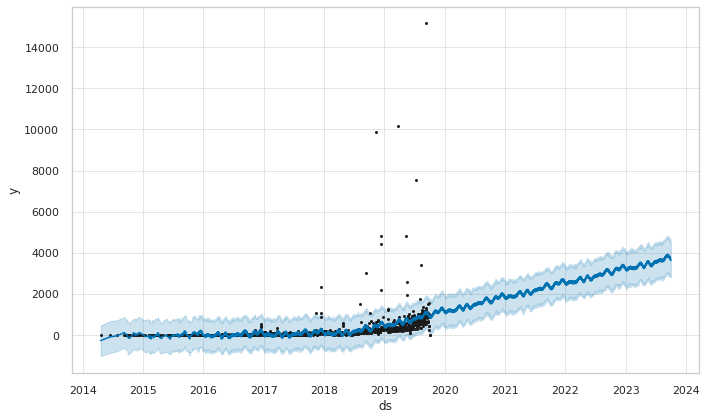

In [ ]:
# Python
fig2 = m.plot(forecast2)

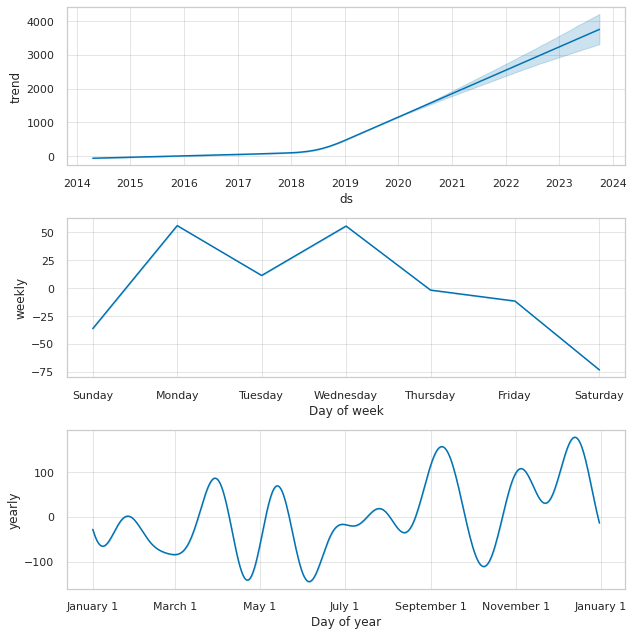

In [ ]:
# Python
fig3 = m.plot_components(forecast2)

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast2)

In [ ]:
#Python
plot_components_plotly(m, forecast2)

# **Data Focus 2 - PyCaret**

## **PyCaret**

In [ ]:
focus

ds    y
0    2014-04-19   16
1    2014-06-16    4
2    2014-07-24    4
3    2014-09-09    1
4    2014-09-12    4
...         ...  ...
1487 2019-09-28  428
1488 2019-09-29  452
1489 2019-09-30  271
1490 2019-10-01   27
1491 2019-10-02    4

[1492 rows x 2 columns]

In [ ]:
# data yang di gunakan hanya tahun 2017 - 2019
focus = focus[focus['ds'] >= '2017-01-01']
focus

ds    y
488  2017-01-01   45
489  2017-01-02  125
490  2017-01-03  173
491  2017-01-04   79
492  2017-01-05   54
...         ...  ...
1487 2019-09-28  428
1488 2019-09-29  452
1489 2019-09-30  271
1490 2019-10-01   27
1491 2019-10-02    4

[1004 rows x 2 columns]

In [ ]:
focus=focus.sort_values(by='ds',ascending=True)

In [ ]:
# extract month, year, day from ds
focus['Month'] = [i.month for i in focus['ds']]
focus['Year'] = [i.year for i in focus['ds']]
focus['Day'] = [i.day for i in focus['ds']]

In [ ]:
focus = focus.sort_values(by=["Year","Month","Day"],ascending=True)

### *Data Bulanan*

In [ ]:
# group per bulan
df_focus = focus.groupby(['Year', 'Month']).agg({"y":"sum"}).reset_index()
df_focus

Year  Month      y
0   2017      1   2038
1   2017      2   1529
2   2017      3   2105
3   2017      4   1099
4   2017      5   1398
5   2017      6   1403
6   2017      7   1865
7   2017      8   1602
8   2017      9   1377
9   2017     10   1973
10  2017     11   3731
11  2017     12   7742
12  2018      1   3469
13  2018      2   2662
14  2018      3   2776
15  2018      4   3743
16  2018      5   2809
17  2018      6   2335
18  2018      7   3911
19  2018      8   8010
20  2018      9  10335
21  2018     10   8777
22  2018     11  18288
23  2018     12  19808
24  2019      1  12564
25  2019      2   9295
26  2019      3  20873
27  2019      4  12798
28  2019      5  23205
29  2019      6  15444
30  2019      7  27729
31  2019      8  28657
32  2019      9  40391
33  2019     10     31

In [ ]:
df_focus['Date'] = pd.date_range(start='2017-01-01', end = '2019-10-01',freq = 'MS')

In [ ]:
df_focus

Year  Month      y       Date
0   2017      1   2038 2017-01-01
1   2017      2   1529 2017-02-01
2   2017      3   2105 2017-03-01
3   2017      4   1099 2017-04-01
4   2017      5   1398 2017-05-01
5   2017      6   1403 2017-06-01
6   2017      7   1865 2017-07-01
7   2017      8   1602 2017-08-01
8   2017      9   1377 2017-09-01
9   2017     10   1973 2017-10-01
10  2017     11   3731 2017-11-01
11  2017     12   7742 2017-12-01
12  2018      1   3469 2018-01-01
13  2018      2   2662 2018-02-01
14  2018      3   2776 2018-03-01
15  2018      4   3743 2018-04-01
16  2018      5   2809 2018-05-01
17  2018      6   2335 2018-06-01
18  2018      7   3911 2018-07-01
19  2018      8   8010 2018-08-01
20  2018      9  10335 2018-09-01
21  2018     10   8777 2018-10-01
22  2018     11  18288 2018-11-01
23  2018     12  19808 2018-12-01
24  2019      1  12564 2019-01-01
25  2019      2   9295 2019-02-01
26  2019      3  20873 2019-03-01
27  2019      4  12798 2019-04-01
28  2019      5  23205 2019-05-01
29  2019      6  15444 2019-06-01
30  2019      7  27729 2019-07-01
31  2019      8  28657 2019-08-01
32  2019      9  40391 2019-09-01
33  2019     10     31 2019-10-01

In [ ]:
df_focus.head()

Year  Month     y       Date
0  2017      1  2038 2017-01-01
1  2017      2  1529 2017-02-01
2  2017      3  2105 2017-03-01
3  2017      4  1099 2017-04-01
4  2017      5  1398 2017-05-01

In [ ]:
# create 12 month moving average
df_focus['MA12'] = df_focus['y'].rolling(12).mean()

# plot the data and MA
import plotly.express as px
fig = px.line(df_focus, x="Date", y=["y", "MA12"], template = 'plotly_dark')
fig.show()

In [ ]:
# create a sequence of numbers
df_focus['Series'] = np.arange(1,len(df_focus)+1)

# drop unnecessary columns and re-arrange
df_focus = df_focus[['Series', 'Year', 'Month', 'y']]

# check the head of the dataset**
df_focus.head()

Series  Year  Month     y
0       1  2017      1  2038
1       2  2017      2  1529
2       3  2017      3  2105
3       4  2017      4  1099
4       5  2017      5  1398

In [ ]:
# split data into train-test set
train = df_focus[(df_focus['Year'] <= 2019) & (df_focus['Month']<=6)] #2019 awal
test = df_focus[(df_focus['Year'] == 2019) & (df_focus['Month']>=6)] #2019 akhir

# check shape
train.shape, test.shape

((18, 4), (5, 4))

In [ ]:
# import the regression module**
from pycaret.regression import *

# initialize setup**
s = setup(data = train, test_data = test, target = 'y', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, session_id = 123)

In [ ]:
best = compare_models(sort = 'MAE')

Initiated  . . . . . . . . . . . . . . . . . .           06:02:44
Status     . . . . . . . . . . . . . . . . . .    Fitting 3 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Linear Regression

Empty DataFrame
Columns: [Model, MAE, MSE, RMSE, R2, RMSLE, MAPE, TT (Sec)]
Index: []

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

In [ ]:
df_focus.head()

In [ ]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta


# generate predictions on the original dataset**
predictions = predict_model(best, data=df_focus)

# add a date column in the dataset**
predictions['Date'] = pd.date_range(start='2017-01-01', end = pd.to_datetime('2017-01-01') + relativedelta(months=+33),freq = 'MS')

# line plot**
fig = px.line(predictions, x='Date', y=["y", "prediction_label"], template = 'plotly_dark')

# add a vertical rectange for test-set separation**
fig.add_vrect(x0="2019-01-01", x1="2019-12-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [ ]:
predictions

In [ ]:
final_best = finalize_model(best)

In [ ]:
future_dates = pd.date_range(start = '2019-11-01', end = '2020-11-01', freq = 'MS')

future_df = pd.DataFrame()
future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]


In [ ]:
len(future_dates)

In [ ]:
(np.arange(len(future_dates))+145)

In [ ]:
future_df['Series'] = (np.arange(len(future_dates))+145)
future_df.head()

In [ ]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

In [ ]:
len(df_focus)

In [ ]:
len(predictions_future)

In [ ]:
concat_df = pd.concat([df_focus,predictions_future], axis=0)

In [ ]:
concat_df_i = pd.date_range(start='2017-01-01', end = '2020-11-01', freq = 'MS')

In [ ]:
concat_df

In [ ]:
len(concat_df)

In [ ]:
len(concat_df_i)

In [ ]:
concat_df_i

In [ ]:
concat_df.set_index(concat_df_i, inplace=True)

In [ ]:
fig = px.line(concat_df, x=concat_df.index, y=["y", "prediction_label"], template = 'plotly_dark')
fig.show()

In [ ]:
concat_df

In [ ]:
concat_df

In [ ]:
concat_df.to_csv('concat.csv')

In [ ]:
concat_df.describe()